
# **DDDM MINI PROJECT REPORT - GROUP4**
---
Team members:


*   Đặng Thị Ngọc Huyền
*   Lê Minh Tâm

*   Lê Tố Uyên
*   Phan Ngọc Thuỳ Linh






# **PART 1: INTRODUCTION**

The hospitality industry relies heavily on understanding customer behavior and demand patterns to optimize revenue management and enhance the guest experience. This analysis focuses on the Hotel Booking Demand Dataset, which provides comprehensive information on hotel bookings from both city hotels and resort hotels. The dataset includes 31 variables that capture key details such as booking lead time, average daily rate (ADR), market segment, and cancellation rates. By analyzing this dataset, we aim to uncover insights into customer booking behaviors, identify trends across different market segments, and propose strategies to improve hotel operations.

This project will leverage descriptive analytics to summarize booking patterns, segment-based linear regression models to explore relationships between ADR and lead time, and time series analysis to examine seasonal trends. The goal is to generate actionable business insights that will inform pricing strategies, promotional efforts, and cancellation mitigation approaches, ultimately guiding data-driven decisions for hotel management. The findings will be presented through a detailed report and a concise presentation, emphasizing how these insights can enhance hotel operations and profitability.

# **PART 2: DATA OVERVIEW**

The Hotel Booking Demand Dataset provides a rich collection of booking data, capturing reservations, cancellations, customer demographics, and other crucial booking information. This dataset encompasses bookings from two types of hotels: a city hotel and a resort hotel, with data spanning various market segments such as direct bookings, corporate clients, and travel agents. Key variables include the Average Daily Rate (ADR), which represents the average income per occupied room, and Lead Time, measuring the number of days between the booking date and the check-in date. Another essential variable is IsCanceled, a binary indicator of whether a booking was canceled.

Both datasets cover bookings scheduled to arrive between July 1, 2015, and August 31, 2017. This specific time frame allows for the analysis of booking trends and patterns over a significant period, providing insights into customer behavior and market fluctuations. The dataset's richness and variety make it particularly valuable for understanding booking behaviors and trends, as it includes diverse features that enable in-depth segmentation, predictive modeling, and trend analysis.

Through these techniques, we will analyze customer behavior across market segments, explore the relationship between lead time and ADR, and identify seasonal booking trends. This data-driven approach will yield strategic insights to optimize pricing, reduce cancellations, and implement effective promotional strategies

# **PART 3: DATA ANALYSIS**

## **I. Data Inspecting**

## Loading necessary libraries and datasets

In [ ]:
import os
import pandas as pd # for loading csv file (export from excel) into Python
import numpy as np

import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns

# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# from sklearn.linear_model import LogisticRegression

import missingno as msno

## Reading data
Reading in the dataset hotel_bookings.csv

In [ ]:
# Load the dataset
df = pd.read_csv('/content/hotel_bookings.csv')

print('Data shape (#row x #columns): ', df.shape)

# Display the first few rows of the dataset
df.head()

Data shape (#row x #columns):  (119390, 32)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

## **II. Data Cleansing**

Data cleansing is the process of identifying and correcting errors, inconsistencies, and inaccuracies in datasets. The goal of this technique is to improve the quality and reliability of our data, making it more accurate and useful for analysis. The reason why data cleaning plays a significant role in business research is that inaccurate or inconsistent data can lead to faulty and misleading insights. By cleaning and preparing the data, we can ensure that our findings are based on accurate and trustworthy information.

## Detecing Missing Values

The very first step of out data cleaning process involves figuring out what's wrong with our data, in this report, we will identify any possible missing values in our dateset using both numerical and visual techniques.

## Detecting missing values numerically

**Step 1: Calculate the total missing values**
>To better identify missing data and choose how to handle it, we effectively calculate the total amount of missing (NaN) values for each column in the DataFrame in this step. The missing values in each column are counted using sum ( ) after the insull ( ) functions identifies the missing data points.

In [ ]:
def count_missing_values(df):
    # Check for the total mising values of each column
    return df.isnull().sum()

# Show the result
missing_counts = count_missing_values(df)
print("Missing Values Count:\n", missing_counts)

Missing Values Count:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                             

**Step 2: Calculate the percentage of missing values**
>Here, the function estimates the proportion of these missing values to provide a more meaningful context rather than raw counts by  helping us evaluate the significance and severity of missing values, making it easier to determine how to address the issue in relation to the size of the dataset as a whole.

In [ ]:
# Calculate the percentage of missing values
def calculate_missing_percent(df):
    return 100 * df.isnull().sum() / len(df)
# Print the result
missing_percent = calculate_missing_percent(df)
print("Percentage of Missing Values:\n", missing_percent)

Percentage of Missing Values:
 hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
d

**Step 3: Create a table with the results**
>The function concatenates the total missing values and their corresponding percentages into a single table, serving as a succinct summary of the missing data across all columns.

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 32 columns.
There are 4 columns that have missing values.


Missing Values  % of Total Values
company           112593               94.3
agent              16340               13.7
country              488                0.4
children               4                0.0

## Detecting missing data visually using Missingno library
> It is crucial to use the Missingno library to visually detect missing data because it is capable of displaying not only the existence of missing values but also their patterns and relationships. This is essential for us to decide later on how to deal with the missing data, including whether to eliminate columns, impute values, or use specific algorithms that can deal with missingness.

<Axes: >

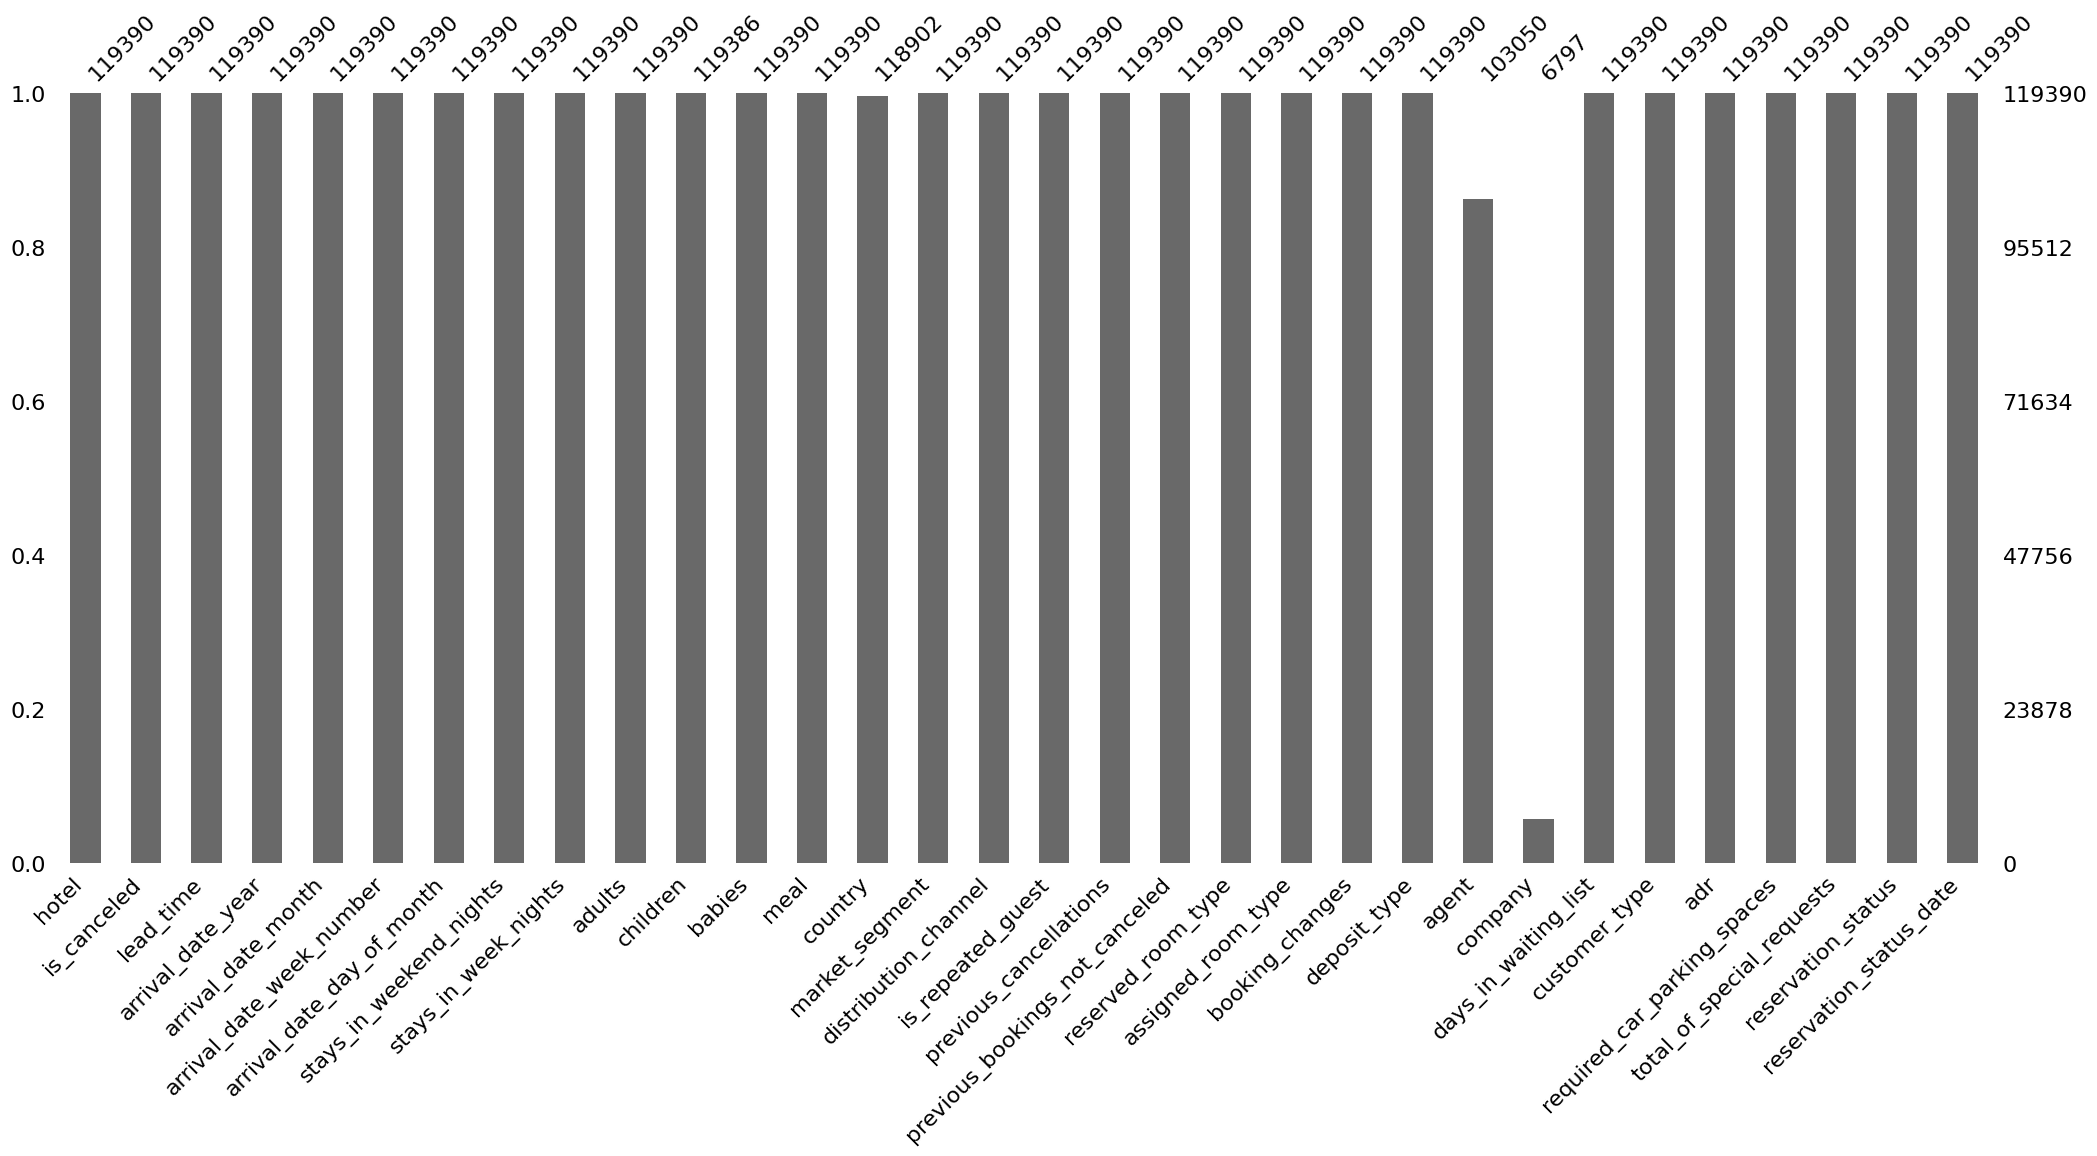

In [ ]:
#Visualize missing values
msno.bar(df)

## Visualizing the locations of the missing data
>This visualization allows for quick identification of where missing values are located, making it easier to spot patterns in the data.

<Axes: >

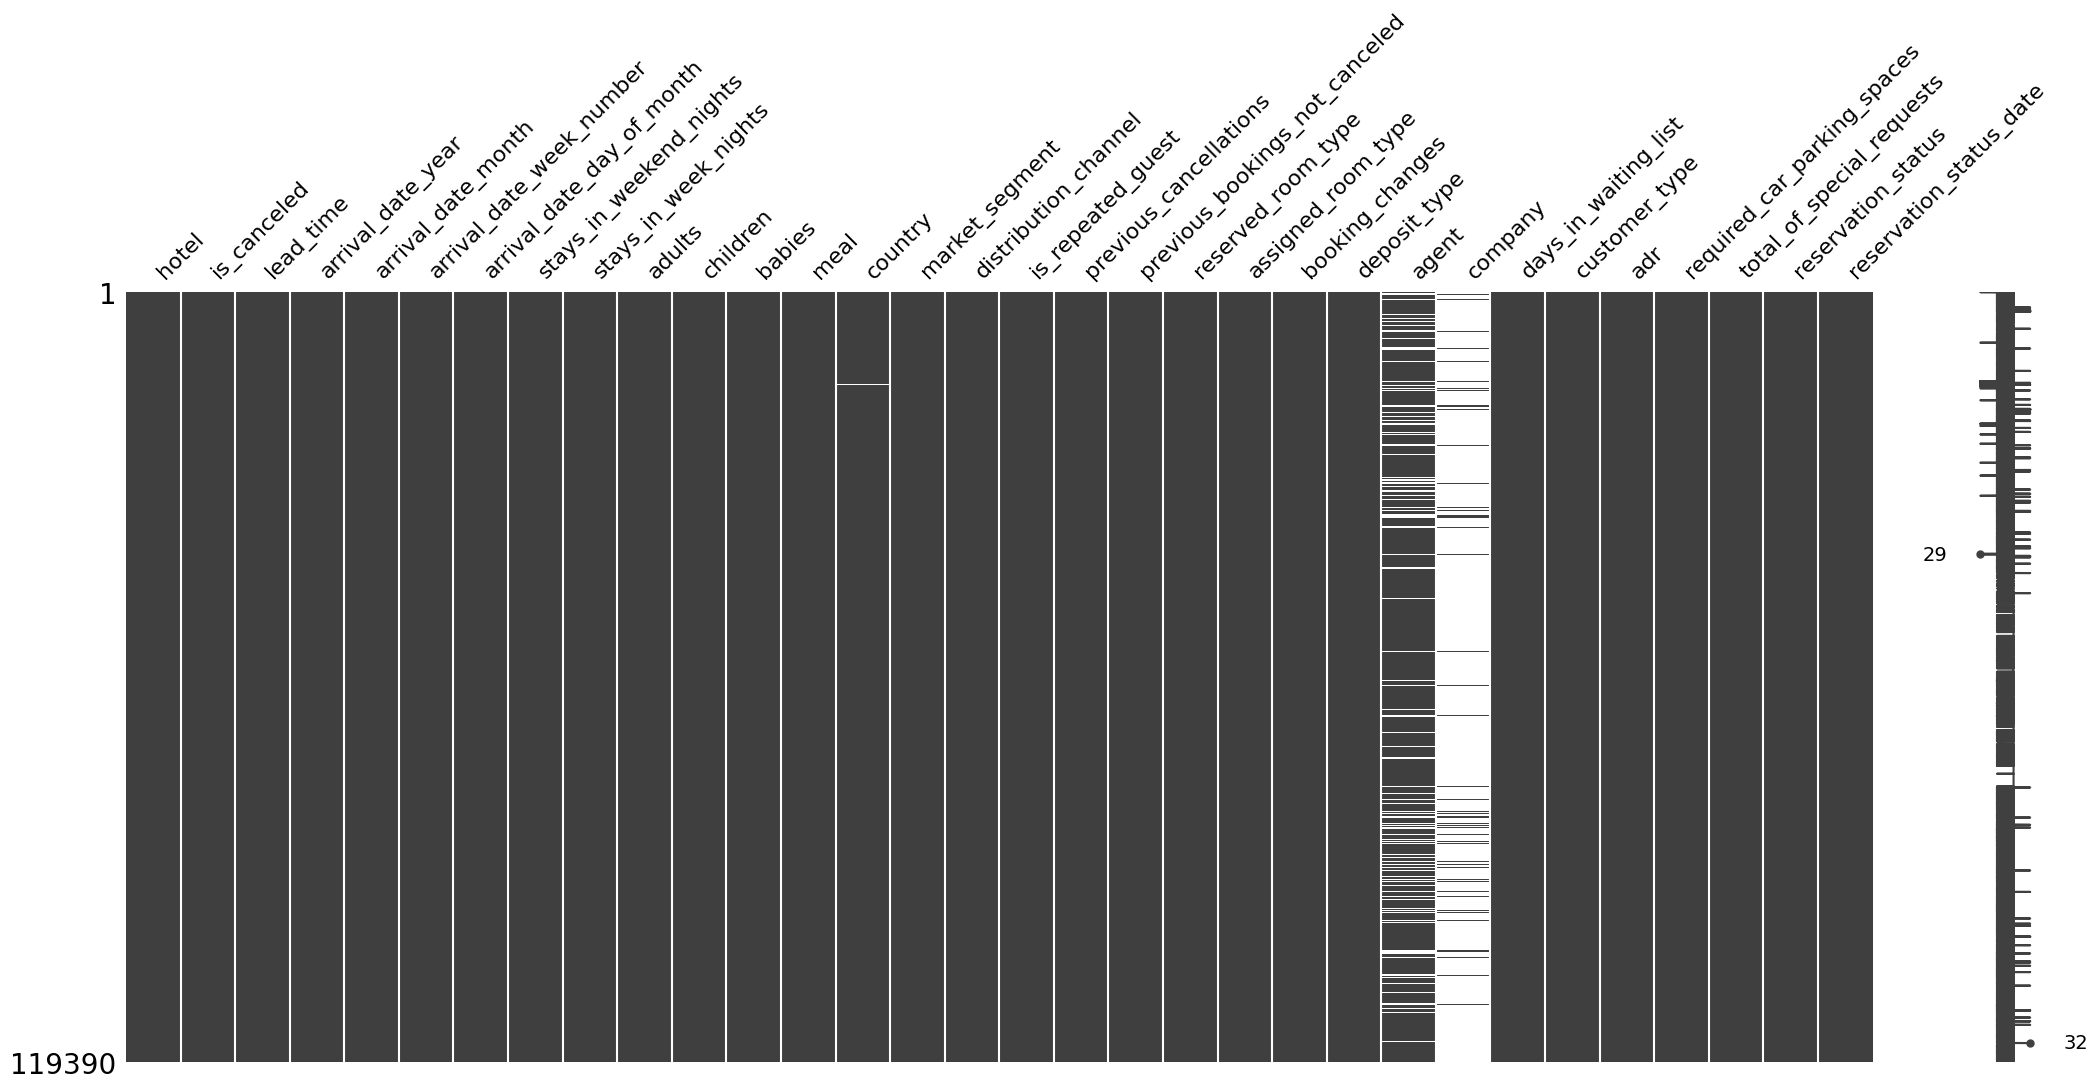

In [ ]:
# A white line in this matrix indicates a missing value, whereas a colored line represents non-missing data.
msno.matrix(df)

## Finding reasons for missing data using a Heatmap

<Axes: >

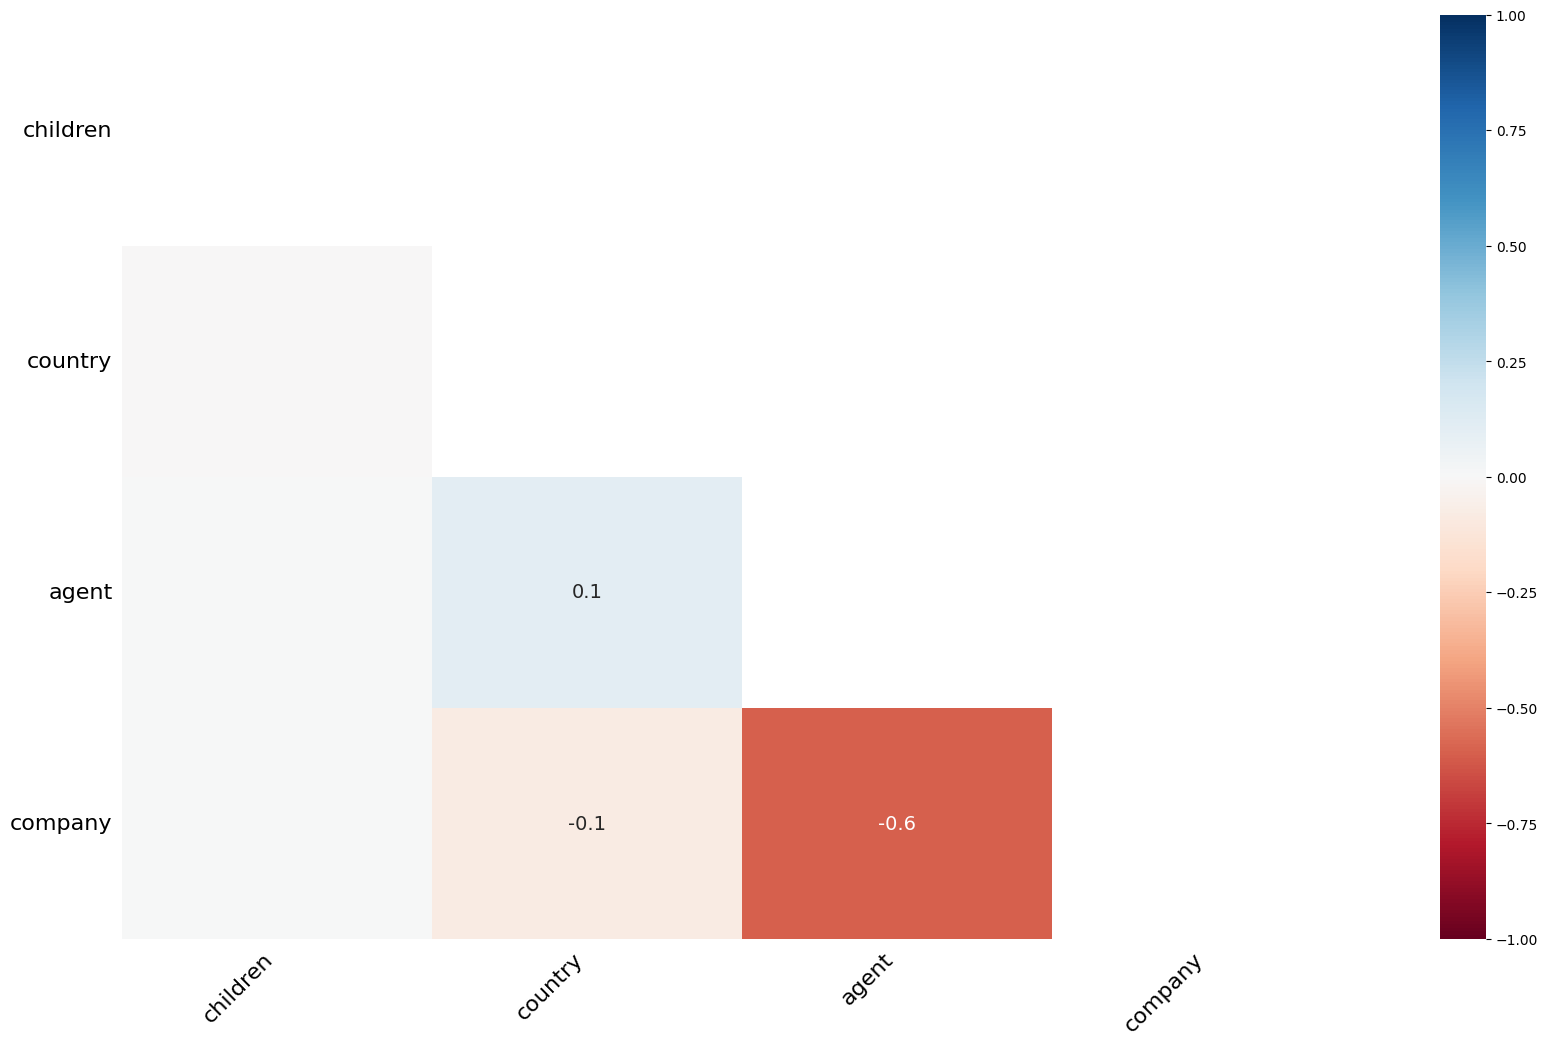

In [ ]:
msno.heatmap(df)

**Key patterns learned in this Heatmap:**
>The most significant takeaway is the negative correlation  (-0.6) between "agent" and "company", which may suggest that in this dataset, when data for "agent" is missing, "company" tends to have data, and vice versa.

## Treating mising values

In [ ]:
# Make another copy of the data so as not to mess up the original by accident
df_cp = df.copy()

**Step 1: Handling missing values in "Company" columns**
> Overview: The "Company" column exhibits a high percentage of missing data, with 94.3% of its values absent. While our initial consideration might suggest dropping this column due to the extent of missing data, the heatmap analysis reveals a significant pattern: "Company" frequently contains data when the "Agent" column is missing.

> --> What we will do: Therefore, instead of dropping it, we will retain the "Company" column and impute the missing values with the placeholder "No Company." This approach will allow us to maintain the integrity of the dataset and acknowledge this relationship.

In [ ]:
# Converts the "company" column to the object type, allowing to fill in string values
df_cp['company'] = df_cp['company'].astype(object)

# Assign the missing values in the "Company" column with "No company"
df_cp['company'] = df_cp['company'].fillna('No company')

# To see if missing values in "Company" are handled
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
agent              16340               13.7
country              488                0.4
children               4                0.0


**Step 2: Handling missing values in the "agent" column**
>Overview: The "agent" column contains 13.7% missing values. Our initial approach would be to fill these missing values with the placeholder "Unknown agent," similar to what we did with the "company" column.

> --> What we will do: However, given the observed pattern that "company" typically contains data when "agent" is missing, we can leverage this insight for more informed imputation. Inparticular, for rows where the "company" has data and the "agent" is missing, we will fill in the "agent" column with "Company agent." For any remaining missing values in the "agent" column, we will use the placeholder "Unknown agent."

In [ ]:
# Ensure the "agent" column is of the correct type (object)
df_cp['agent'] = df_cp['agent'].astype(object)

# Fill "agent" column with "Company agent" where "company" column has data
df_cp.loc[(df_cp['company'].notnull()) & (df_cp['agent'].isnull()), 'agent'] = 'Company agent'

# Fill the remaining missing values in "agent" column with "Unknown agent"
df_cp['agent'] = df_cp['agent'].fillna('Unknown agent')

# Check the results to confirm changes
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 2 columns that have missing values.
          Missing Values  % of Total Values
country              488                0.4
children               4                0.0


**Step 3: Handling missing values in the "children" column**
> Overview: There are very few missing entries in the "children" column—only 4 rows are missing throughout the whole dataset.

> --> What we will do: Given that no significant patterns have been identified between the "children" column and other columns with missing values, we will presume that a lack of data suggests there were no children engaged in those bookings. Consequently, we will fill the missing values with "No children."

In [ ]:
# Assume that if there’s no data, there were no children involved in those bookings
df_cp['children'] = df_cp['children'].fillna(0)

# Check the results to confirm
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 1 columns that have missing values.
         Missing Values  % of Total Values
country             488                0.4


**Step 4: Handling missing values in the "country" column**
> Overview: The "country" column has only 0.4% missing values, which is relatively small. This minor percentage suggests that the absence of data is not expected to have a major impact on the analysis as a whole.  . Furthermore, no patterns exist that connect this column to other ones that have missing values.

> --> What we will do: We will fill the missing values in the "country" column with the most frequently occurring country (the mode) in order to maintain the integrity of the dataset without introducing bias.

In [ ]:
# Ensure 'country' column is of the correct type (object)
df_cp['country'] = df_cp['country'].astype(object)

# Fill missing values in 'country' with the mode (most frequent value)
df_cp['country'] = df_cp['country'].fillna(df_cp['country'].mode()[0])

# Check the results to confirm
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


## Outliers identification and handling

In this analysis, we chose to handle outliers in our dataset to provide more precise and trustworthy insights. Outliers, particularly in key variables such as Average Daily Rate (ADR) and Lead Time, can dramatically skew statistical metrics like the mean and standard deviation, leading to biased interpretations of the data. By addressing these extreme values, we enhance the clarity of our visualizations, making trends and patterns more evident.

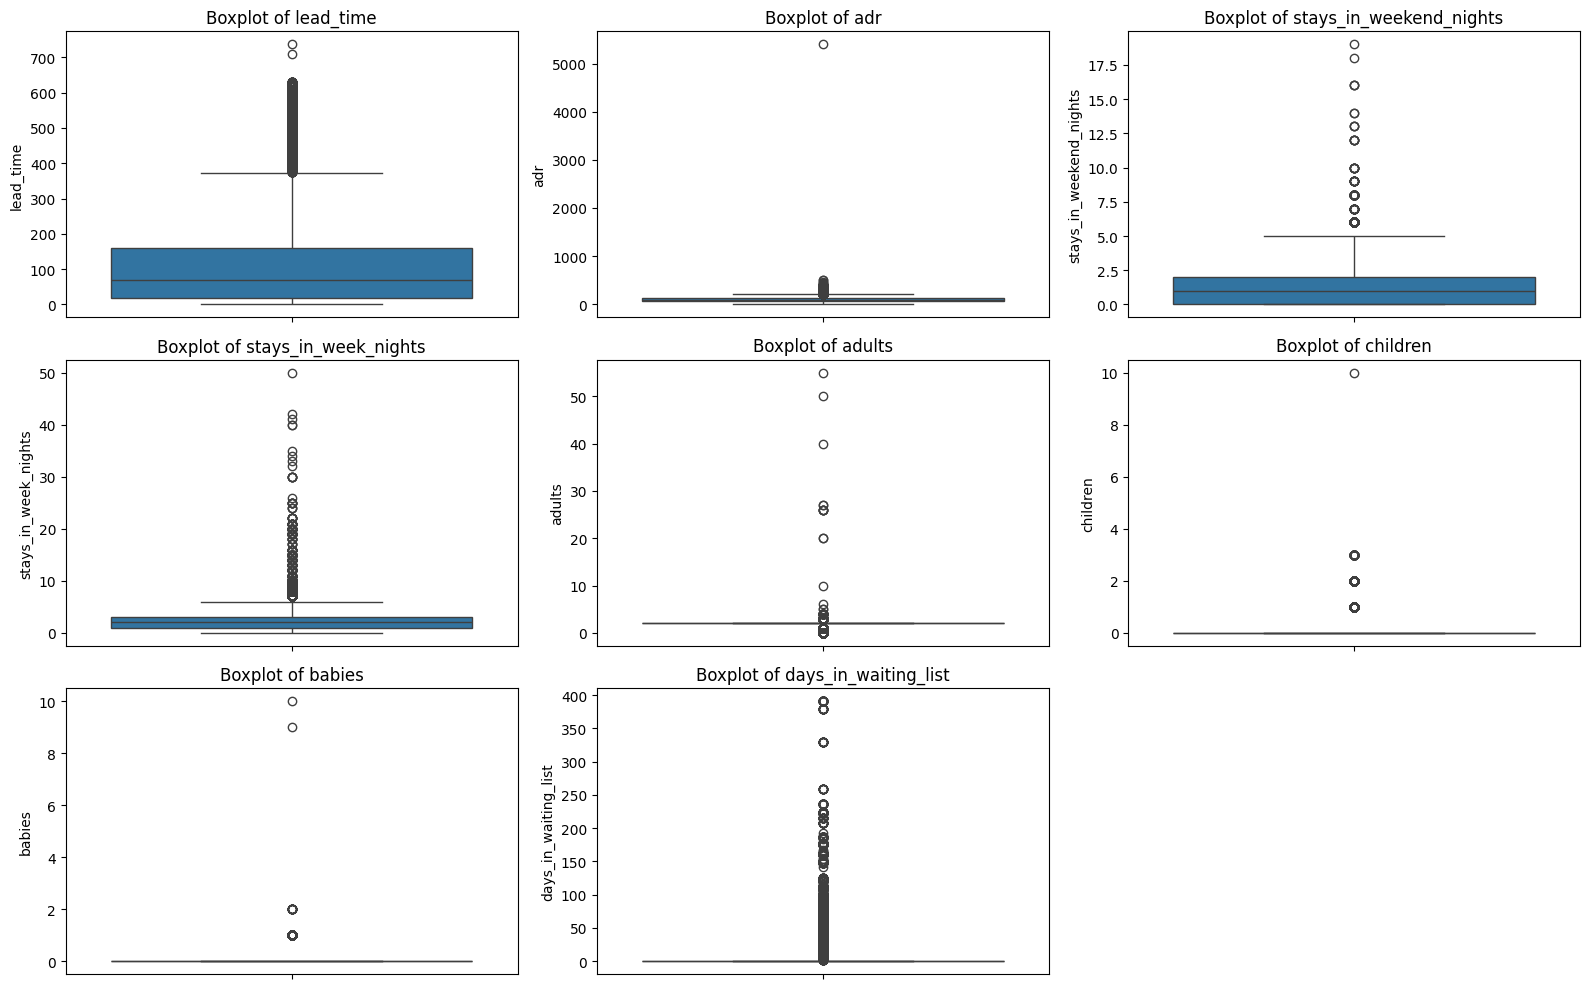

In [ ]:
# List of numerical columns to check for outliers
num_cols = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'days_in_waiting_list']

# Plot boxplots to visualize outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_cp, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

> In this box plots, we have identified and visualized all potential outliers in the numerical columns. By using this plot, we highlight values beyond the interquartile range (IQR), a common method for identifying outliers. However, in this project, we will only address the outliers that could interfere with our specific analyses.

In [ ]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Clean outliers directly in df_cp for both 'adr' and 'lead_time'
df_cp = remove_outliers_iqr(df_cp, 'adr')
df_cp = remove_outliers_iqr(df_cp, 'lead_time')


> After removing outliers using IQR method, we will now visualize the 2 variables ADR and Lead time (lead_time) using Boxplot and Histogram to spot the differences in the dataframe both before and after handling outliers.

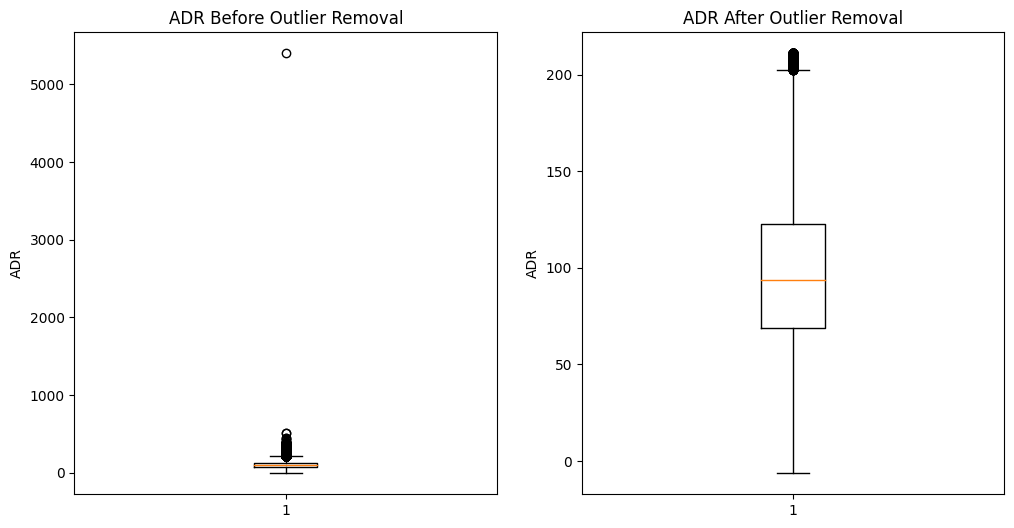

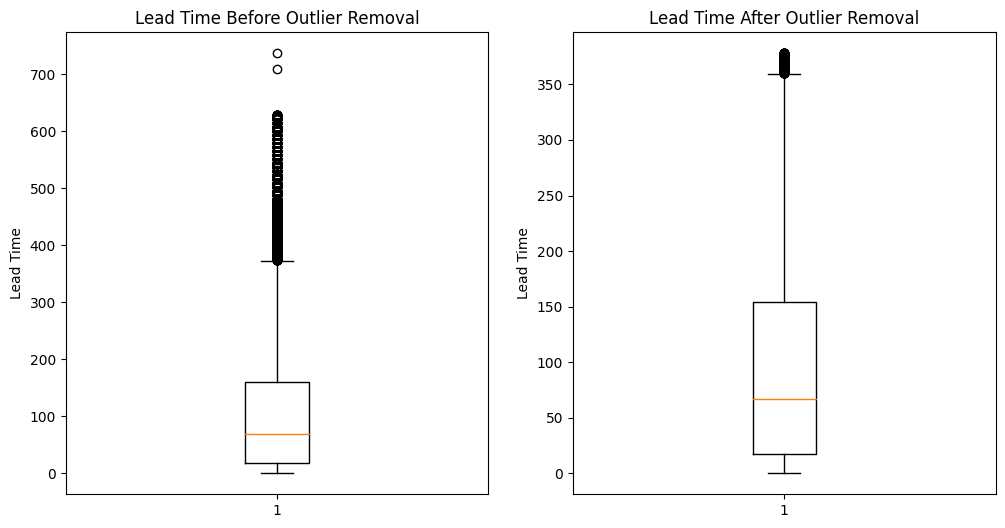

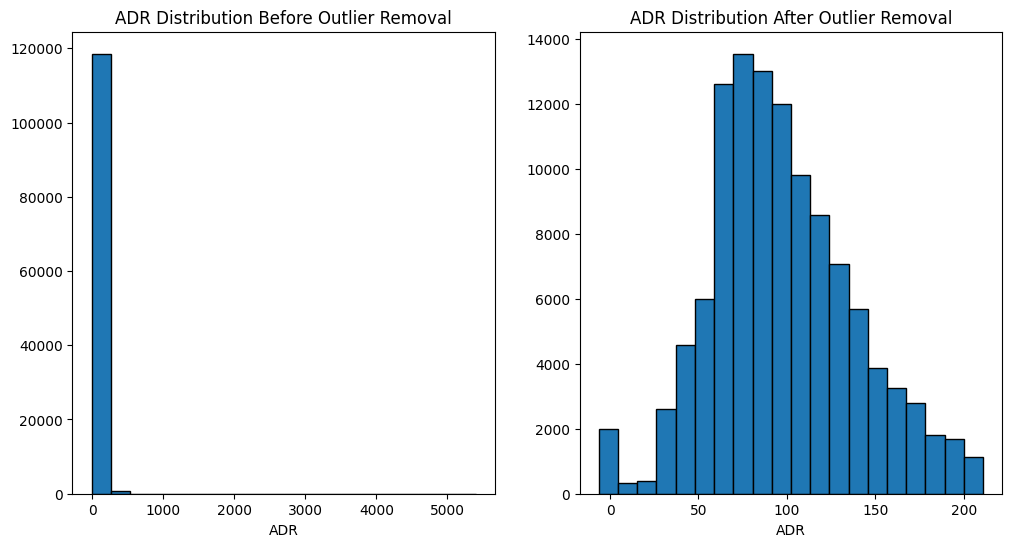

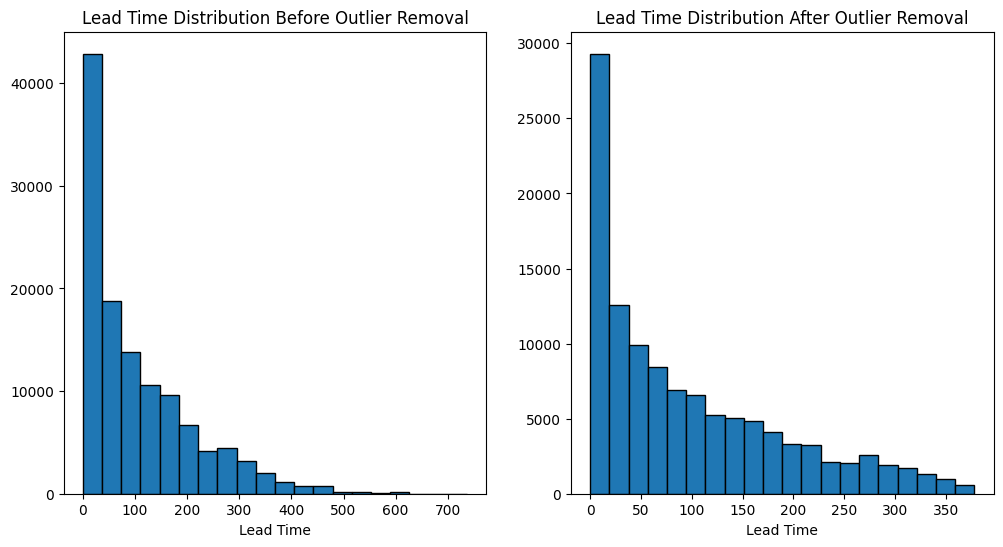

In [ ]:
# Boxplot for ADR
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['adr'])
plt.title('ADR Before Outlier Removal')
plt.ylabel('ADR')

plt.subplot(1, 2, 2)
plt.boxplot(df_cp['adr'])  # Use df_cp here
plt.title('ADR After Outlier Removal')
plt.ylabel('ADR')

plt.show()

# Boxplot for Lead Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['lead_time'])
plt.title('Lead Time Before Outlier Removal')
plt.ylabel('Lead Time')

plt.subplot(1, 2, 2)
plt.boxplot(df_cp['lead_time'])  # Use df_cp here
plt.title('Lead Time After Outlier Removal')
plt.ylabel('Lead Time')

plt.show()

# Histogram for ADR
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['adr'], bins=20, edgecolor='black')
plt.title('ADR Distribution Before Outlier Removal')
plt.xlabel('ADR')

plt.subplot(1, 2, 2)
plt.hist(df_cp['adr'], bins=20, edgecolor='black')  # Use df_cp here
plt.title('ADR Distribution After Outlier Removal')
plt.xlabel('ADR')

plt.show()

# Histogram for Lead Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['lead_time'], bins=20, edgecolor='black')
plt.title('Lead Time Distribution Before Outlier Removal')
plt.xlabel('Lead Time')

plt.subplot(1, 2, 2)
plt.hist(df_cp['lead_time'], bins=20, edgecolor='black')  # Use df_cp here
plt.title('Lead Time Distribution After Outlier Removal')
plt.xlabel('Lead Time')

plt.show()

# **1. Descriptive Analytics for Segments**

## **Summary statistics across Market Segment**
> For the summary statistics acroess Market Segment, first, we will start by looking up the unique values in the "market_segment" column in our dataset to get a basic understanding of it.

In [ ]:
# Check the unique values in the 'market_segment' column
unique_segments = df['market_segment'].unique()
unique_segments

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

> Then launch a function to calculate all the mode, mean, median and standard deviation for key variables, naming ADR, lead time (lead_time) and cancellation (is_canceled).

In [ ]:
# Define a function to calculate mode since the agg() function does not directly support mode
def calculate_mode(column):
    return column.mode()[0]

# Group data by market_segment
grouped = df_cp.groupby('market_segment')

# Calculate mean, median, std, and mode for adr, lead_time, and is_canceled
segment_summary_stats = grouped.agg({
    'adr': ['mean', 'median', 'std', calculate_mode], # Statistics for ADR
    'lead_time': ['mean', 'median', 'std', calculate_mode], # Statistics for lead_time
    'is_canceled': ['mean', 'median', 'std', calculate_mode] # Statistics for is_canceled
})

# Rename the columns for clarity
segment_summary_stats.columns = segment_summary_stats.columns.set_levels(['mean', 'median', 'std', 'mode'], level=1)

# Display the final result
segment_summary_stats


adr                             lead_time         \
                      mean  median        std   mode        mean median   
market_segment                                                            
Aviation        100.142110   95.00  21.796583   95.0    4.443038    3.0   
Complementary     2.886213    0.00  14.046426    0.0   12.784367    3.0   
Corporate        69.104112   65.00  30.687371   65.0   22.144262    7.0   
Direct          105.153624  100.00  46.695205   75.0   48.524249   14.0   
Groups           79.631824   73.33  30.778558   62.0  157.866633  142.0   
Offline TA/TO    86.005565   85.00  32.340926   75.0  123.967053  105.0   
Online TA       110.818471  107.55  40.055712  126.0   83.317794   59.0   
Undefined        15.000000   15.00   4.242641   12.0    1.500000    1.5   

                                is_canceled                        
                       std mode        mean median       std mode  
market_segment                                                     
Aviation          4.607695    0    0.219409    0.0  0.414722    0  
Complementary    28.738654    0    0.130728    0.0  0.337330    0  
Corporate        37.451580    0    0.187181    0.0  0.390094    0  
Direct           69.387299    0    0.149505    0.0  0.356601    0  
Groups          107.205390  277    0.591954    1.0  0.491486    1  
Offline TA/TO    97.726098    0    0.340712    0.0  0.473959    0  
Online TA        79.307990    0    0.362646    0.0  0.480768    0  
Undefined         0.707107    1    1.000000    1.0  0.000000    1

## **Visualization**

In [ ]:
# Global figure counter for tracking all plots
figure_counter = 1

def set_main_figure_title(main_title):
    """
    Function to set a main title for the entire figure with dynamic figure numbering.

    Parameters:
    main_title: The title of the figure.
    """
    global figure_counter
    title = f"Figure {figure_counter}: {main_title}"
    plt.suptitle(title)
    figure_counter += 1  # Increment the figure counter for the next title


**1. Average ADR by Market Segment**
> ADR stands for average daily rate. It represents the average revenue earned per occupied room on a given day. Put simply, ADR tells us the average price guests are paying for their rooms over a specific period.

**Method:**
> For Average Daily Rate (ADR) Visualization, we will extract the mean ADR from our summary statistics to deliver a clear picture of what customers are generally paying for a room. And since most prices vary greatly and there is no repeating value, we have no need to take into consideration the middle value (median) or the most frequent value (mode) in this case.

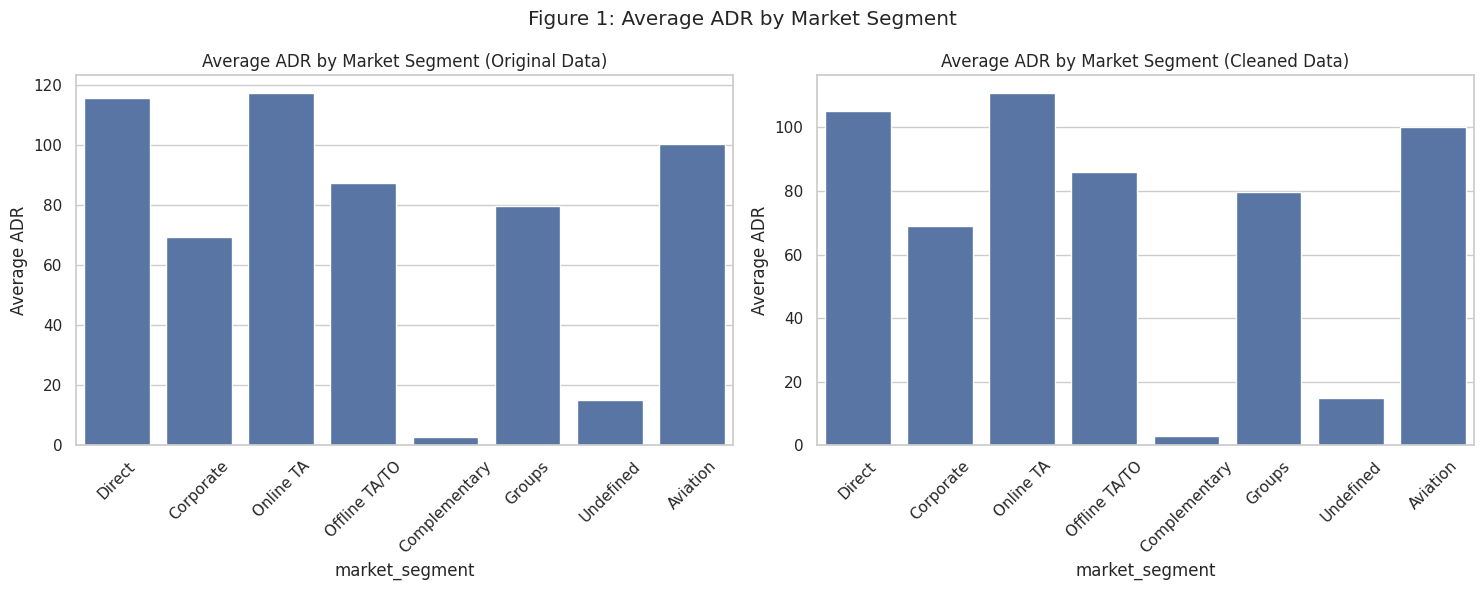

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot for Original Data (df)
plt.subplot(1, 2, 1)
sns.barplot(x='market_segment', y='adr', data=df, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Market Segment (Original Data)')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)

# Subplot for Cleaned Data (df_cp)
plt.subplot(1, 2, 2)
sns.barplot(x='market_segment', y='adr', data=df_cp, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Market Segment (Cleaned Data)')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Average ADR by Market Segment")
plt.tight_layout()
plt.show()

**ADR trends analysis**
> The chart reveals key insights into market segment performance. Direct, Online TA, and Aviation segments have the highest ADR, indicating they are high-revenue sources worth prioritizing for marketing and revenue optimization.

> In contrast, Complementary bookings generate minimal revenue, thus their volume should be carefully monitored to ensure they align with business objectives.

The aforementioned chart provides a static view of ADR performance by market segment, but it misses a critical factor: how ADR fluctuates over time. Thereby, we want to dive deeper into the seasonal trends of these ADR patterns, addressing the second chart showing monthly ADR patterns across our years ranging from July of 2015 and August 2017.

**Monthly ADR Trends by Year (Using Time-series chart)**
> This visualization will aid us in better plotting ADR by month to detect seasonal fluctuations, knowing not just which segments are profitable, but when they are most profitable.

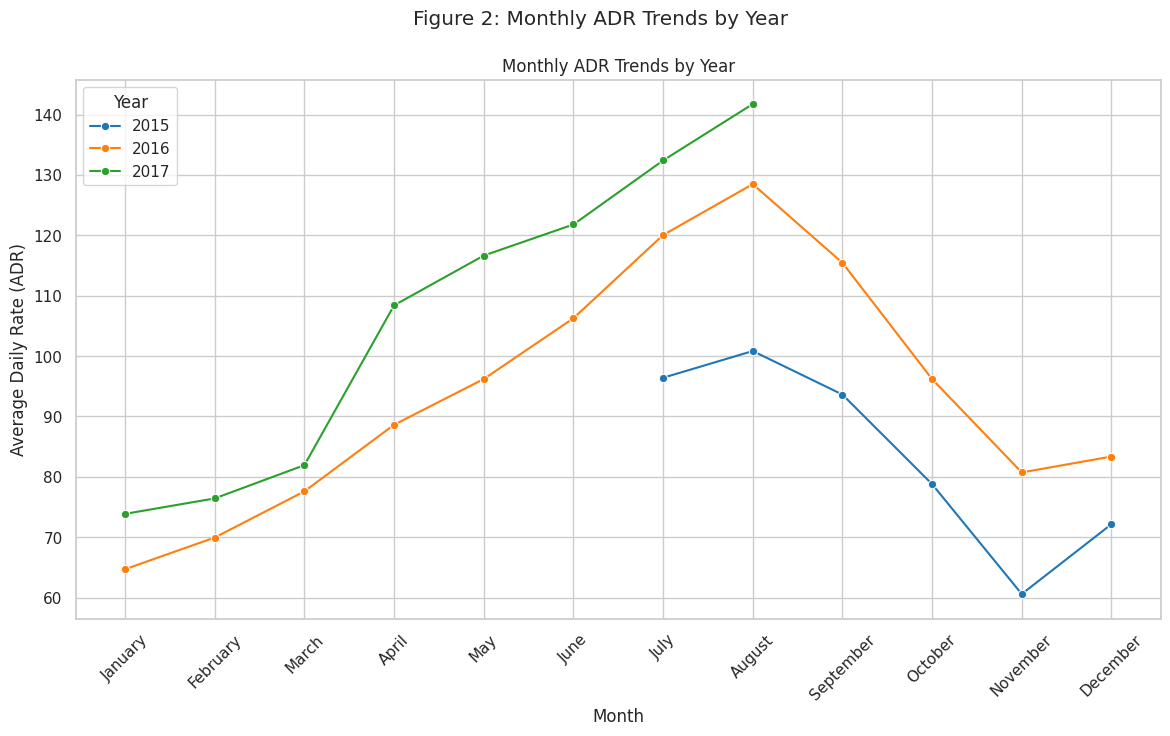

In [ ]:
# Group data by both year and month to calculate the average ADR
monthly_adr = df_cp.groupby(['arrival_date_year', 'arrival_date_month']).agg({'adr': 'mean'}).reset_index()

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Ensure 'arrival_date_month' is ordered correctly as a categorical variable
monthly_adr['arrival_date_month'] = pd.Categorical(
    monthly_adr['arrival_date_month'], categories=month_order, ordered=True
)

# Plot the monthly ADR trends with one line per year
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_adr, x='arrival_date_month', y='adr', hue='arrival_date_year', marker='o', palette='tab10')

# Customize plot
plt.title('Monthly ADR Trends by Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.legend(title='Year', loc='upper left')

# Show the plot
set_main_figure_title("Monthly ADR Trends by Year")
plt.show()


**Monthly ADR trends by Year:**
> The time-series chart illustrates monthly ADR trends for the years 2015, 2016, and 2017, revealing clear seasonal patterns. For all three years, ADR tends to rise steadily from January through the summer, peaking around July and August, particularly in 2016 and 2017. This implies a strong demand during the middle of the year, likely in line with the vacation or travel seasons in Algarve, Portugal.

> After August, ADR drops sharply for all years, showing a notable decline in the fall, especially in September and October. This suggests off-peak periods where demand lowers.

Once we have a more comprehensive understanding of how ADR varies over time, we would like to zoom in and use the heat map to extract some information regarding the performance of specific market segments through months.

**ADR Trends by Segment and Month (Using heatmap)**
> We will generate a heat map of ADR across both month (arrival_date_month) and market segment (market_segment) to better understand which market segments have greater ADR during particular months with the goal to reveal seasonal behavior within distinct segments.

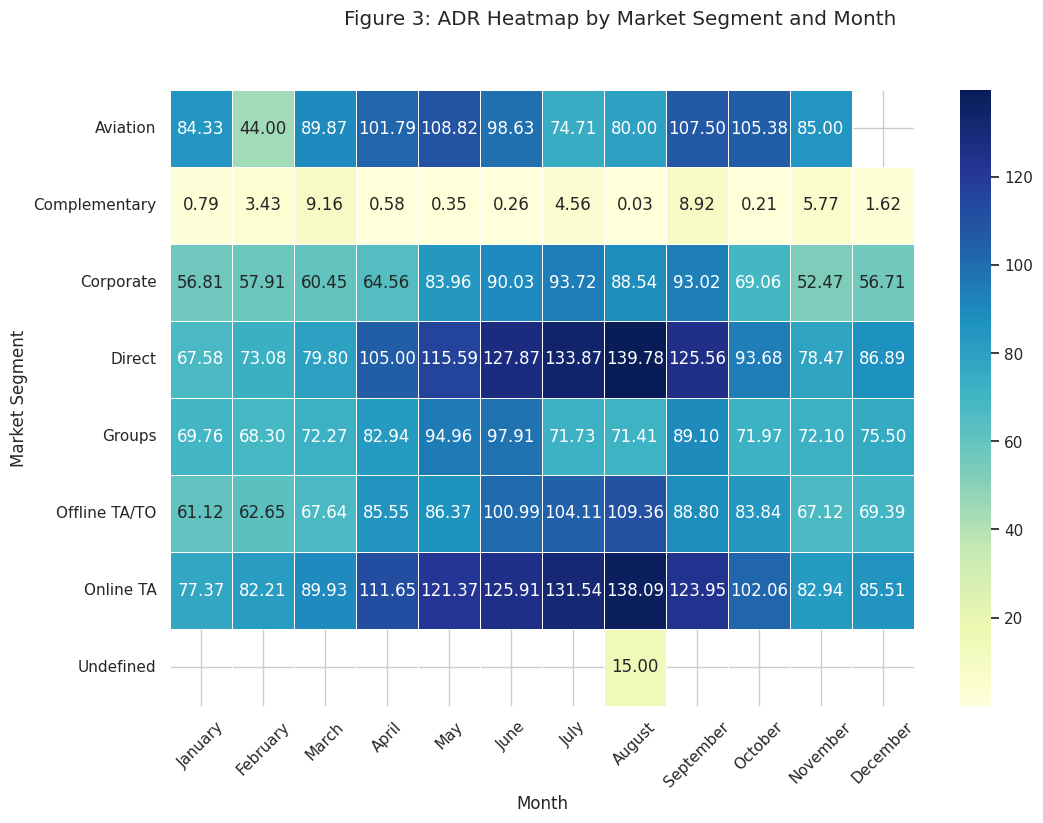

In [ ]:
# Ensure 'arrival_date_month' is in the correct order
segment_month_adr = df_cp.groupby(['market_segment', 'arrival_date_month'])['adr'].mean().reset_index()

# Define the chronological order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with the defined order
segment_month_adr['arrival_date_month'] = pd.Categorical(
    segment_month_adr['arrival_date_month'], categories=month_order, ordered=True)

# Sort the data by 'arrival_date_month' to ensure correct order
segment_month_adr = segment_month_adr.sort_values(by=['arrival_date_month'])

# Pivot the data for the heatmap
heatmap_data = segment_month_adr.pivot_table(
    index='market_segment',
    columns='arrival_date_month',
    values='adr',
    aggfunc='mean',
    observed=False
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
set_main_figure_title("ADR Heatmap by Market Segment and Month")
plt.xlabel('Month')
plt.ylabel('Market Segment')
plt.xticks(rotation=45)
plt.show()


**ADR Heatmap by Market Segment and Month Analysis:**
> Focusing on detecting the seasonal trends for our top three highest ADR, Direct, Online TA and Aviation segments. On the whole, the months of July and August have seen the highest ADR for both Direct and Online TA, which adds the most value during the travel season. This further indicate that during the peak season in Portugal, these are the top three market segments to book.

> In the meantime, Aviation peak points extend from September to October.

**2. Cancellation Rate by Market Segment**

**Method:**
>The same goes for Cancellations section. By using the mean cancellations, we are presenting the average percentage or number of cancellations, giving us an overview of how frequently people cancel.

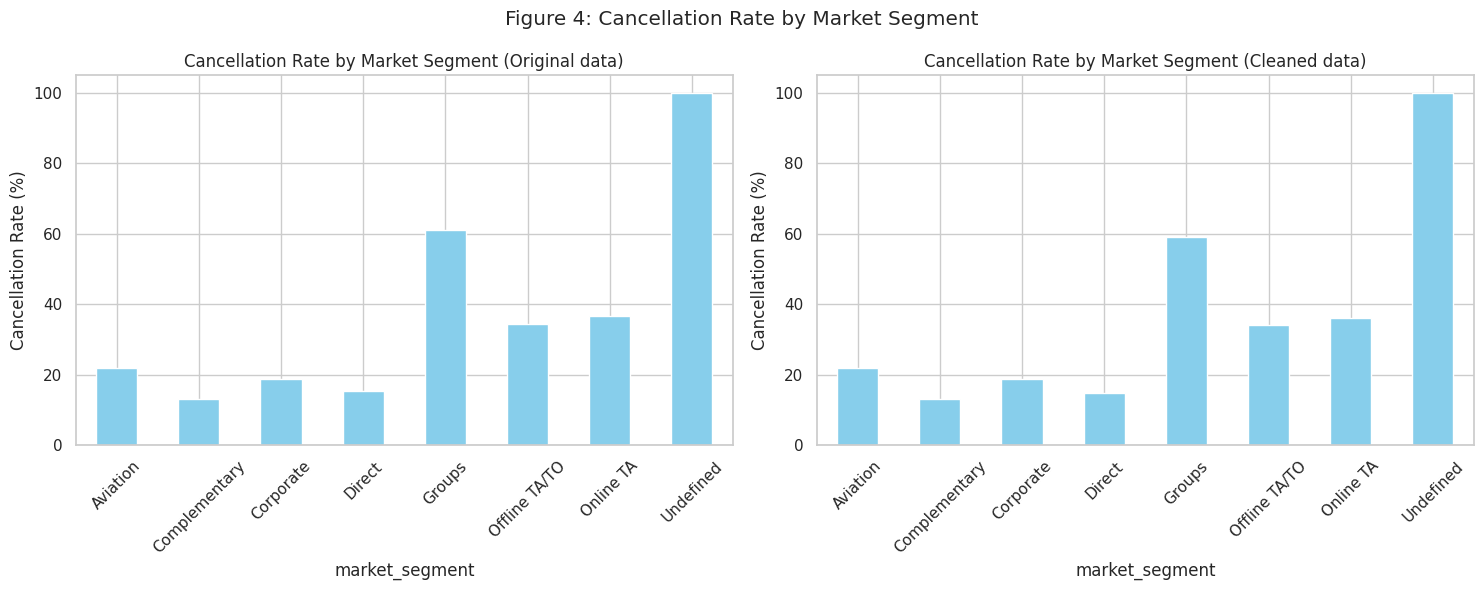

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot for Original Data (df)
plt.subplot(1, 2, 1)
cancellation_rate = df.groupby('market_segment')['is_canceled'].mean() * 100
cancellation_rate.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Market Segment (Original data)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)

# Subplot for Cleaned Data (df_cp)
plt.subplot(1, 2, 2)
cancellation_rate = df_cp.groupby('market_segment')['is_canceled'].mean() * 100
cancellation_rate.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Market Segment (Cleaned data)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Cancellation Rate by Market Segment")
plt.tight_layout()
plt.show()

**Cancellation Rate by Market Segment Analysis:**
> In this chart, the "Undefined" segment shows the highest cancellation rate, near 100%. However, since we have little information about how this "Undefined" segment is defined or handled, there fails to be much we can do to address it.

> The "Groups" sector has the second-highest cancellation rate, around 60-70%, indicating a consistently higher likelihood of cancellations in group bookings.

> In comparison to the two mentioned groups, the "Compylementar," "Direct," "Corporate," and "Aviation" segments show comparatively low and stable cancellation rates.

In [ ]:
# Group by 'market_segment' and calculate the total cancellations and cancellation rate for each segment
cancellation_by_segment = df_cp.groupby('market_segment').agg(
    total_bookings=('is_canceled', 'size'),  # Total number of bookings in each segment
    total_cancellations=('is_canceled', 'sum')  # Total number of cancellations (where 'is_canceled' == 1)
)

# Calculate cancellation rate for each segment
cancellation_by_segment['cancellation_rate'] = cancellation_by_segment['total_cancellations'] / cancellation_by_segment['total_bookings'] * 100

# Display the cancellation rates by segment
print(cancellation_by_segment[['total_bookings', 'total_cancellations', 'cancellation_rate']])


                total_bookings  total_cancellations  cancellation_rate
market_segment                                                        
Aviation                   237                   52          21.940928
Complementary              742                   97          13.072776
Corporate                 5289                  990          18.718094
Direct                   11712                 1751          14.950478
Groups                   17748                10506          59.195402
Offline TA/TO            23219                 7911          34.071235
Online TA                53777                19502          36.264574
Undefined                    2                    2         100.000000


> "Groups" and "Online TA" are key areas of concern, with high cancellation rates. This could suggest that over half of the bookings in these two segments get canceled, reflecting either a behavioral pattern or an operational issue that requires additional investigation.

**3. Lead time by Market Segment**

In [ ]:
lead_time_summary = df['lead_time'].describe()

# Print the summary statistics
print(lead_time_summary)

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [ ]:
# Extract lead time statistics
lead_time_summary = segment_summary_stats['lead_time'].reset_index()

# Rename columns for clarity
lead_time_summary.columns = ['market_segment', 'mean', 'median', 'std', 'mode']

To better analyze and visualize "How many days in advance people book", regarding Lead Time, we will present two following key statistics using mean and mode.

***a) Mean lead time***
> The average number of days from the reservation date to the check-in date is known as the "mean lead time". This gives us an overall sense of how far in advance bookings are typically made.

> A high mean suggests that bookings are often made well in advance, whereas a low mean might indicate more last-minute bookings.

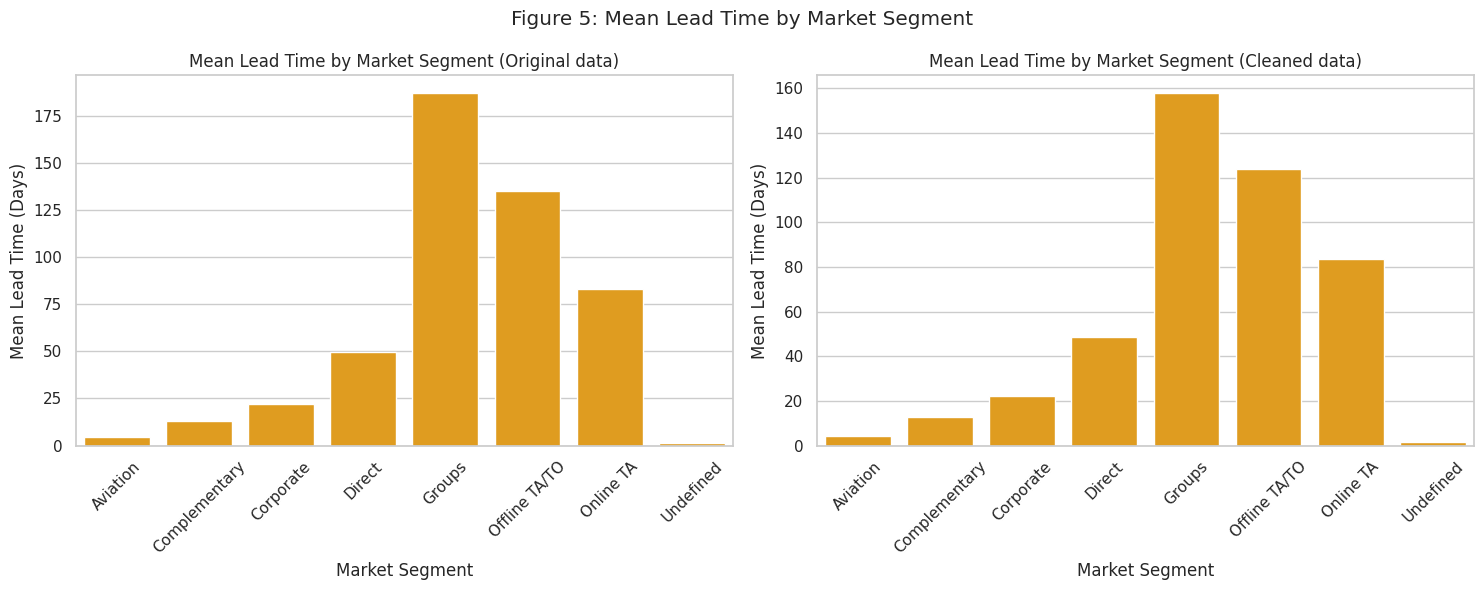

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot for Original Data (df)
plt.subplot(1, 2, 1)
lead_time_df = df.groupby('market_segment')['lead_time'].mean().reset_index()
sns.barplot(data=lead_time_df, x='market_segment', y='lead_time', color='orange')
plt.xlabel('Market Segment')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Mean Lead Time by Market Segment (Original data)')


# Subplot for Cleaned Data (df_cp)
plt.subplot(1, 2, 2)
lead_time_df = df_cp.groupby('market_segment')['lead_time'].mean().reset_index()
sns.barplot(data=lead_time_df, x='market_segment', y='lead_time',color='orange')
plt.title('Mean Lead Time by Market Segment (Cleaned data)')
plt.xlabel('Market Segment')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Mean Lead Time by Market Segment")
plt.tight_layout()
plt.show()

**Mean Lead Time Analysis:**
> The mean lead time for "Groups" is the largest, indicating that reservations for groups are frequently booked long in advance. Direct bookings likewise have a large lead time, suggesting that direct bookers typically have a long planning period.

> Low lead periods in the "Corporate" and "Aviation" segments imply that these reservations may be more spontaneous or reactive.

***b) Mode lead time***

> The mode lead time shows the most frequent booking pattern.  

> If the mode is a short lead time, it suggests that many guests tend to book close to their stay date. If it's a long lead time, it suggests more advance planning.

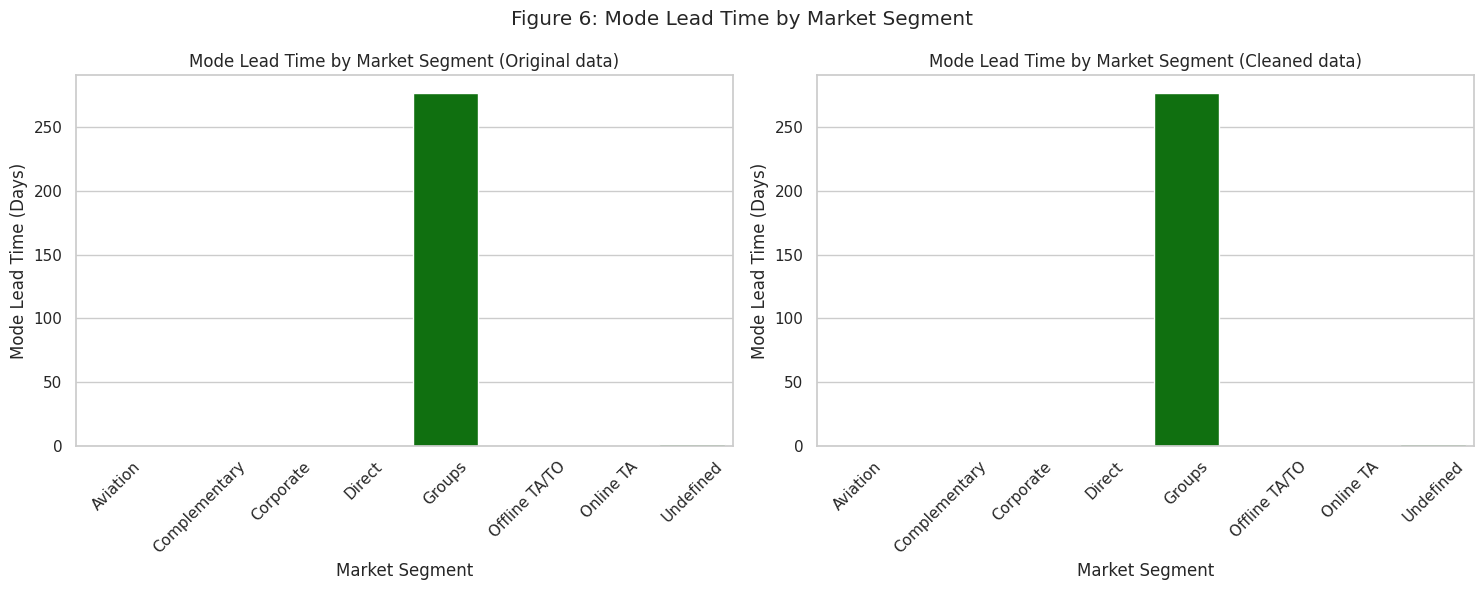

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot for Original Data (Mode Lead Time)
plt.subplot(1, 2, 1)
mode_lead_time_df = df.groupby('market_segment')['lead_time'].agg(lambda x: x.mode()[0]).reset_index()
sns.barplot(data=mode_lead_time_df, x='market_segment', y='lead_time', color='green')
plt.xlabel('Market Segment')
plt.ylabel('Mode Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Mode Lead Time by Market Segment (Original data)')

# Subplot for Cleaned Data (Mode Lead Time)
plt.subplot(1, 2, 2)
mode_lead_time_df = df_cp.groupby('market_segment')['lead_time'].agg(lambda x: x.mode()[0]).reset_index()
sns.barplot(data=mode_lead_time_df, x='market_segment', y='lead_time', color='green')
plt.title('Mode Lead Time by Market Segment (Cleaned data)')
plt.xlabel('Market Segment')
plt.ylabel('Mode Lead Time (Days)')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Mode Lead Time by Market Segment")
plt.tight_layout()
plt.show()

**Mode lead time analysis:**
> The mode lead time provides valuable insights into booking behaviors and patterns within different market segments. This chart indicates that "Group" reservations tend to be planned and booked far in advance, whereas bookings from other market segments (like "Direct" or "Corporate") are typically made with little to no lead time.

## **Summary statistics across Distribution Channel**
> First, we will start by looking up the unique values in the "distribution_channel" column in our dataset to get a basic understanding of it.

In [ ]:
unique_segments = df['distribution_channel'].unique()
unique_segments

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
# Define a function to calculate mode since the agg() function does not directly support mode
def calculate_mode(column):
    return column.mode()[0]

# Group data by distribution_channel
grouped = df_cp.groupby('distribution_channel')

# Calculate mean, median, std, and mode for adr, lead_time, and is_canceled
segment_summary_stats = grouped.agg({
    'adr': ['mean', 'median', 'std', calculate_mode], # Statistics for ADR
    'lead_time': ['mean', 'median', 'std', calculate_mode], # Statistics for lead_time
    'is_canceled': ['mean', 'median', 'std', calculate_mode] # Statistics for is_canceled
})

# Rename the columns for clarity
segment_summary_stats.columns = segment_summary_stats.columns.set_levels(['mean', 'median', 'std', 'mode'], level=1)

# Display the final result
segment_summary_stats

adr                           lead_time         \
                            mean median        std  mode        mean median   
distribution_channel                                                          
Corporate              69.324380   65.0  32.702953  65.0   40.959357    9.0   
Direct                 96.761213   92.5  49.514941   0.0   56.649419   17.0   
GDS                   119.533927  114.3  41.701538  96.0   20.005236   10.0   
TA/TO                  99.601521   95.0  39.142523  62.0  106.312120   80.0   
Undefined              46.240000   18.0  46.029480  12.0   23.000000    2.0   

                                     is_canceled                        
                            std mode        mean median       std mode  
distribution_channel                                                    
Corporate             74.951590    0    0.221413    0.0  0.415230    0  
Direct                78.254268    0    0.171965    0.0  0.377364    0  
GDS                   27.396599    0    0.183246    0.0  0.387885    0  
TA/TO                 93.842936    0    0.400627    0.0  0.490028    0  
Undefined             44.816292    1    0.800000    1.0  0.447214    1

## **Visualization**

**1. Average ADR for Distribution Channel**

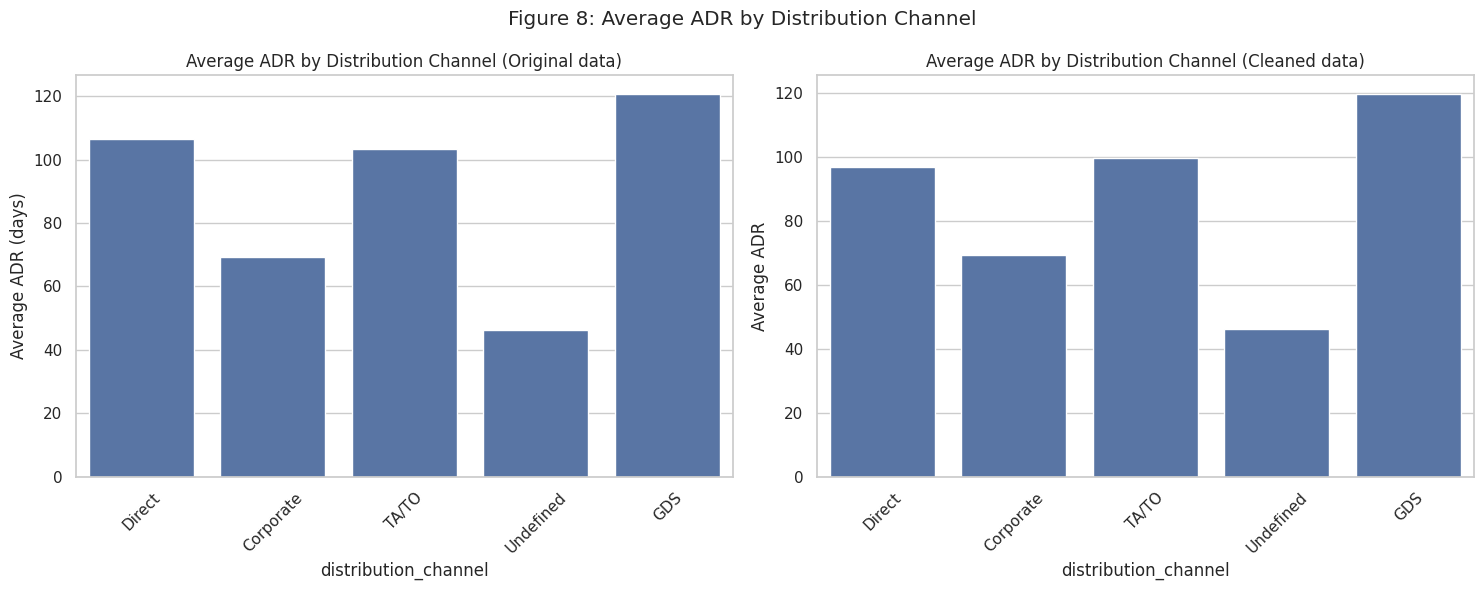

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='distribution_channel', y='adr', data=df, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Distribution Channel (Original data)')
plt.ylabel('Average ADR (days)')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.barplot(x='distribution_channel', y='adr', data=df_cp, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Distribution Channel (Cleaned data)')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Average ADR by Distribution Channel")
plt.tight_layout()
plt.show()

**Average ADR by Distribution Channel Analysis:**
> According to this figure, hotels generate the most revenue per room via the GDS channel, with direct and TATO bookings coming in second and third.  In contrast, bookings through Corporate and Undefined channels result in lower revenue.

**2. Cancellation Rate by Distribution Channel**

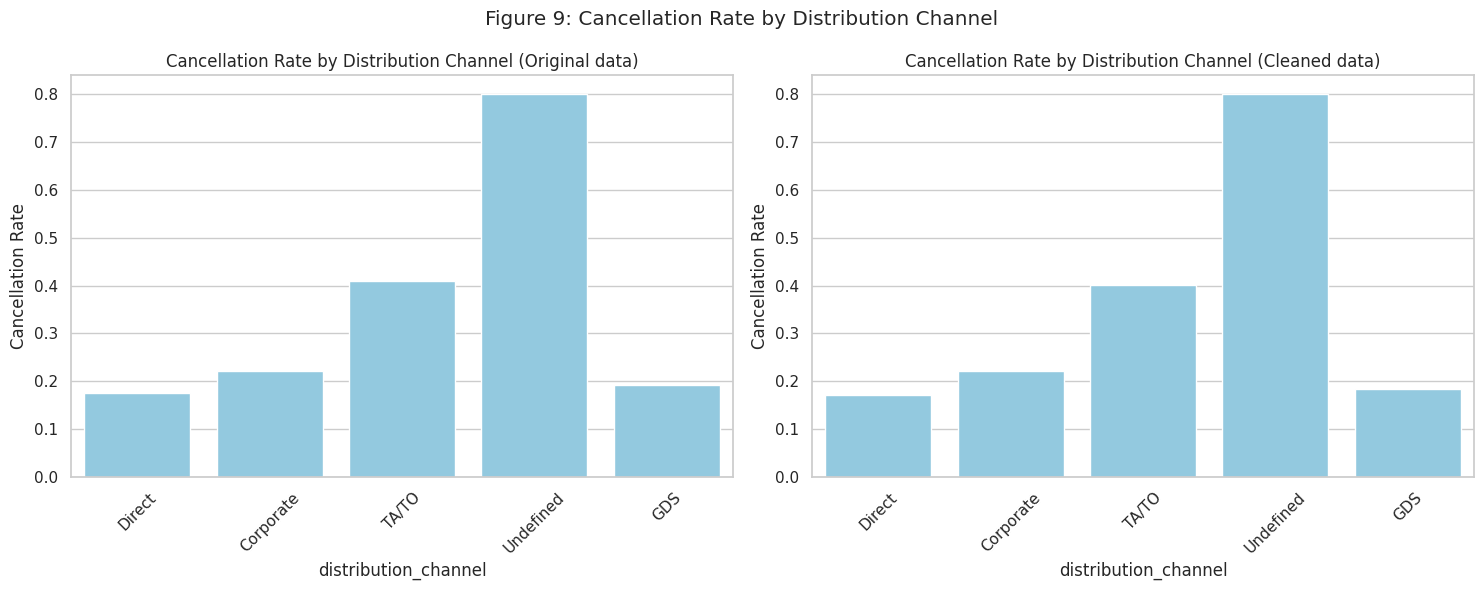

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot for Original Data
plt.subplot(1, 2, 1)
sns.barplot(x='distribution_channel', y='is_canceled', data=df, estimator=np.mean, color='skyblue', errorbar=None)
plt.title('Cancellation Rate by Distribution Channel (Original data)')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

# Subplot for Cleaned Data
plt.subplot(1, 2, 2)
sns.barplot(x='distribution_channel', y='is_canceled', data=df_cp, estimator=np.mean, color='skyblue', errorbar=None)
plt.title('Cancellation Rate by Distribution Channel (Cleaned data)')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Cancellation Rate by Distribution Channel")
plt.tight_layout()
plt.show()

**Cancellation rate by Distribution channel analysis:**
> The chart provides insights into the cancellation rates of hotel bookings across different distribution channels. The channel labeled as "Undefined" consistently shows the highest cancellation rate, hinting potential issues or unreliability with bookings coming from this source. The TATO channel also has a relatively high cancellation rate, recommending that more work may be necessary to lower cancellations.

> Conversely, the Direct and GDS channels exhibit the lowest cancellation rates, making them the most reliable sources for bookings.

> This means that in order to maximize booking reliability, hotel management should continue to promote stable channels like Direct and GDS while concentrating on addressing the high cancellation rates in the Undefined and TATO channels.

**3. Lead Time by Distribution Channel**

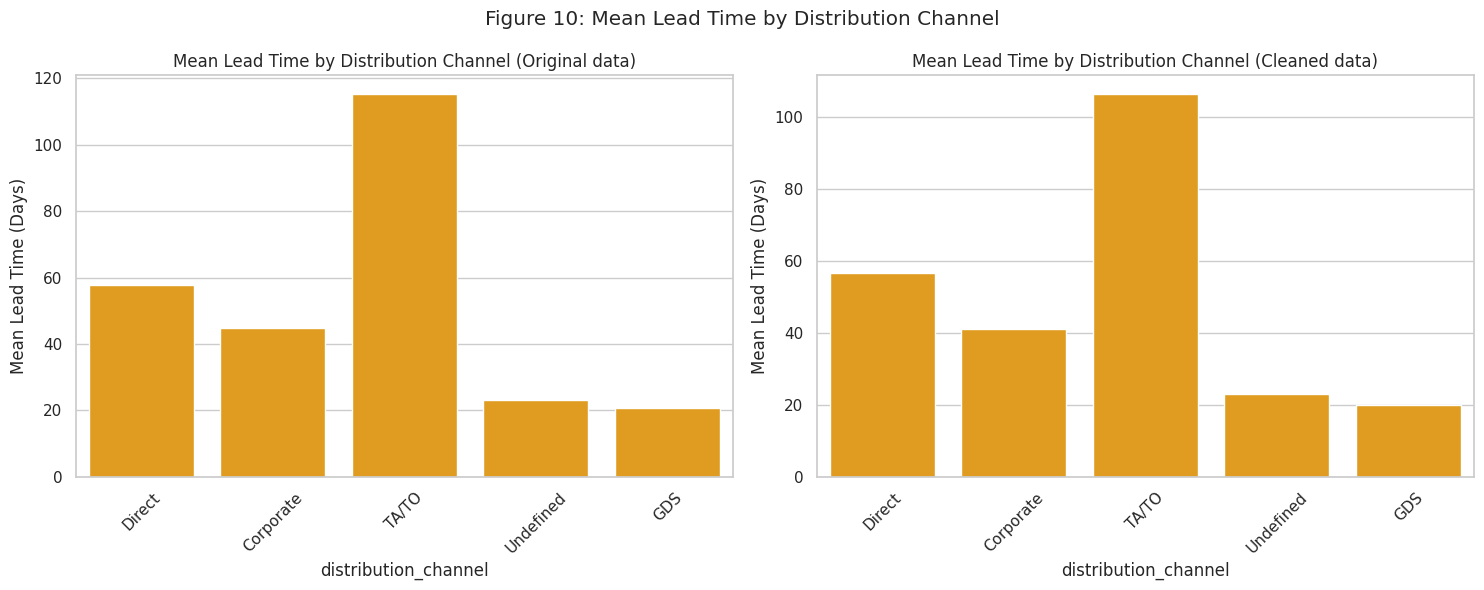

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot for Mean Lead Time (Original Data)
plt.subplot(1, 2, 1)
sns.barplot(x='distribution_channel', y='lead_time', data=df, estimator=np.mean, color='orange', errorbar=None)
plt.title('Mean Lead Time by Distribution Channel (Original data)')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)

# Subplot for Mean Lead Time (Cleaned Data)
plt.subplot(1, 2, 2)
sns.barplot(x='distribution_channel', y='lead_time', data=df_cp, estimator=np.mean, color='orange', errorbar=None)
plt.title('Mean Lead Time by Distribution Channel (Cleaned data)')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)

# Show both plots in the same figure
set_main_figure_title("Mean Lead Time by Distribution Channel")
plt.tight_layout()
plt.show()

**Mean lead time by Distribution channel analysis:**
> The chart illustrates the mean lead time (in days) for hotel bookings across different distribution channels. Customers that book through the TATO distribution channel typically plan their stays well in advance, as evidenced by the channel's significantly longer mean lead time.

> The GDS and Undefined channels have much shorter lead times,  indicating that customers using these channels tend to book closer to their actual stay dates.

In [ ]:
# Create a pivot table with counts of bookings
pivot = df_cp.pivot_table(
    index='market_segment',  # Use the correct column name
    columns='distribution_channel',  # Use the correct column name
    aggfunc='size',
    fill_value=0
)

print(pivot)  # Check the structure of the pivot table


distribution_channel  Corporate  Direct  GDS  TA/TO  Undefined
market_segment                                                
Aviation                    227       0    0     10          0
Complementary                89     576    0     77          0
Corporate                  4783     171    0    335          0
Direct                       90   11398    1    221          2
Groups                     1150    1396    0  15202          0
Offline TA/TO               212      16   44  22947          0
Online TA                    43     126  146  53461          1
Undefined                     0       0    0      0          2


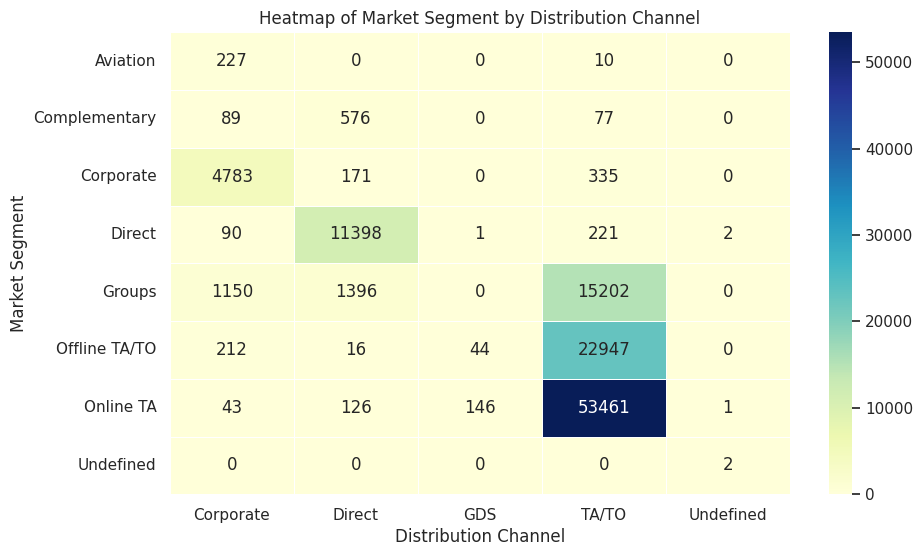

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Market Segment by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Market Segment')

# Show the plot
plt.show()


**Heatmap of Market Segments by Distribution Channels Analysis:**
> For the "Direct" market segment, customers are most likely to book through direct, corporate


# **2. Segment-Based Linear Regression Models**

In [ ]:
# First we import Linear Regression and r2_score from sklearn library to
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Relationship Between Lead Time and ADR for [Market Segment]

In the hotel industry, lead time and average daily rate (ADR) are two crucial metrics in the hotel industry that can significantly impact revenue management and pricing strategies.

Understanding the correlation between lead time and ADR enables hotels to develop more effective pricing and promotional strategies. It allows for better forecasting, maximizes revenue, and offers customized experiences to different market segments. By investigating how lead time impacts ADR in various customer segments, hotels can gain deeper insights into consumer behavior, leading to more profitable decision-making.

**1. A look into the slope of the regression line**

In [ ]:
def perform_regression_and_plot(data, market_segment, ax, dataset_label):
    segment_data = data[data['market_segment'] == market_segment]
    X = segment_data[['lead_time']]
    y = segment_data['adr']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    ax.scatter(X, y, label=f'{market_segment} ({dataset_label})', alpha=0.5)
    ax.plot(X, y_pred, color='red', label=f'Regression line ({dataset_label})')
    ax.set_title(f'Regression for {market_segment} - {dataset_label}')
    ax.set_xlabel('Lead Time')
    ax.set_ylabel('ADR')

    # Set legend location to upper right to avoid the "best" issue
    ax.legend(loc='upper right')

    r2 = r2_score(y, y_pred)
    return r2


**a) For "Direct" market segment:**

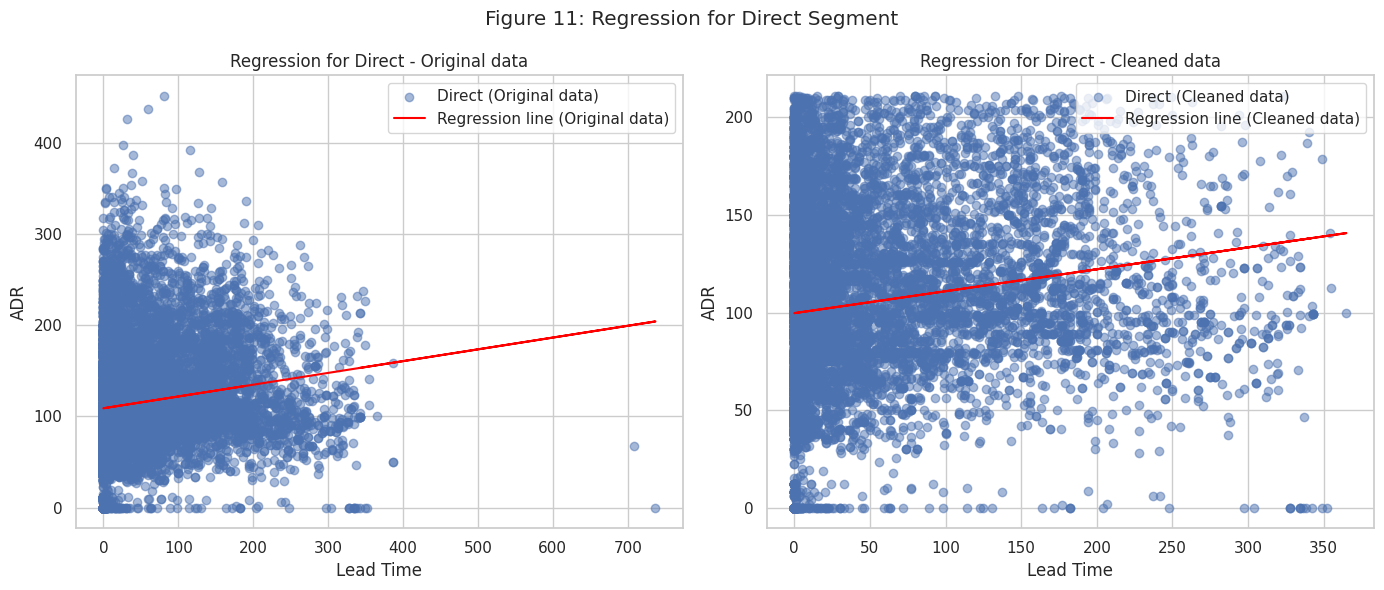

In [ ]:
# For 'Direct' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Direct', axes[0], 'Original data')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Direct', axes[1], 'Cleaned data')

set_main_figure_title("Regression for Direct Segment")
plt.tight_layout()
plt.show()


**Slope Line Analysis for "Direct" segment:**

> The slope of the regression line for the Direct segment shows how ADR changes as lead time increases. In this case, the slope is positive, it means that even a small increase in lead time leads to a higher ADR.  

> This is one of the key insight since according to the summary statistics, the majority of "Direct" clients make last-minute reservations, but their average daily rate is still usually high.

> If the hotel offer some kind of benefit or incentive for booking even slightly in advance (such as better room selection or perks), we can increase the ADR for this group slightly higher.

**b) For "Corporate" market segment:**

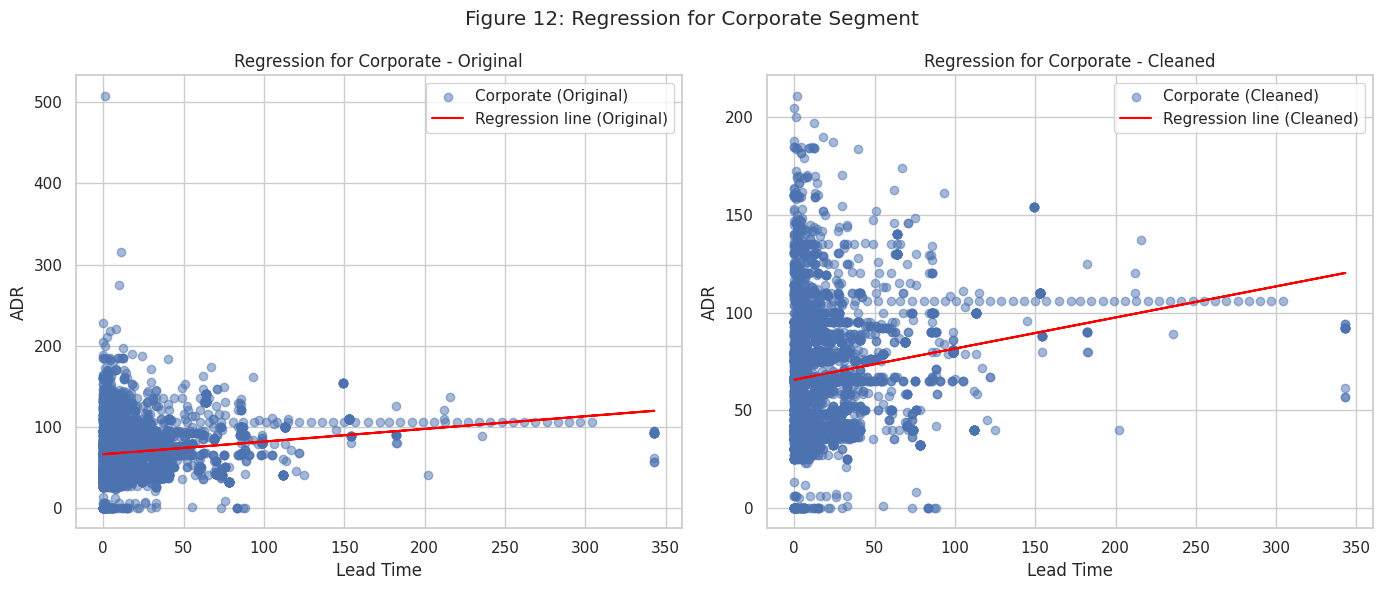

In [ ]:
# For 'Corporate' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Corporate', axes[0], 'Original')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Corporate', axes[1], 'Cleaned')

set_main_figure_title("Regression for Corporate Segment")
plt.tight_layout()
plt.show()


**Slope Line Analysis for "Corporate" Segment:**
> The positive slope means that encouraging earlier bookings from corporate clients could slightly increase ADR.

> Even though, the "Corporate" segment had shorter lead times and moderate ADR, but it is generally a stable segment due to fewer cancellations, making corporate bookings are typically more predictable and consistent for the hotel to secure even higher revenue from this reliable segment.

**c) For "Groups" market segment:**

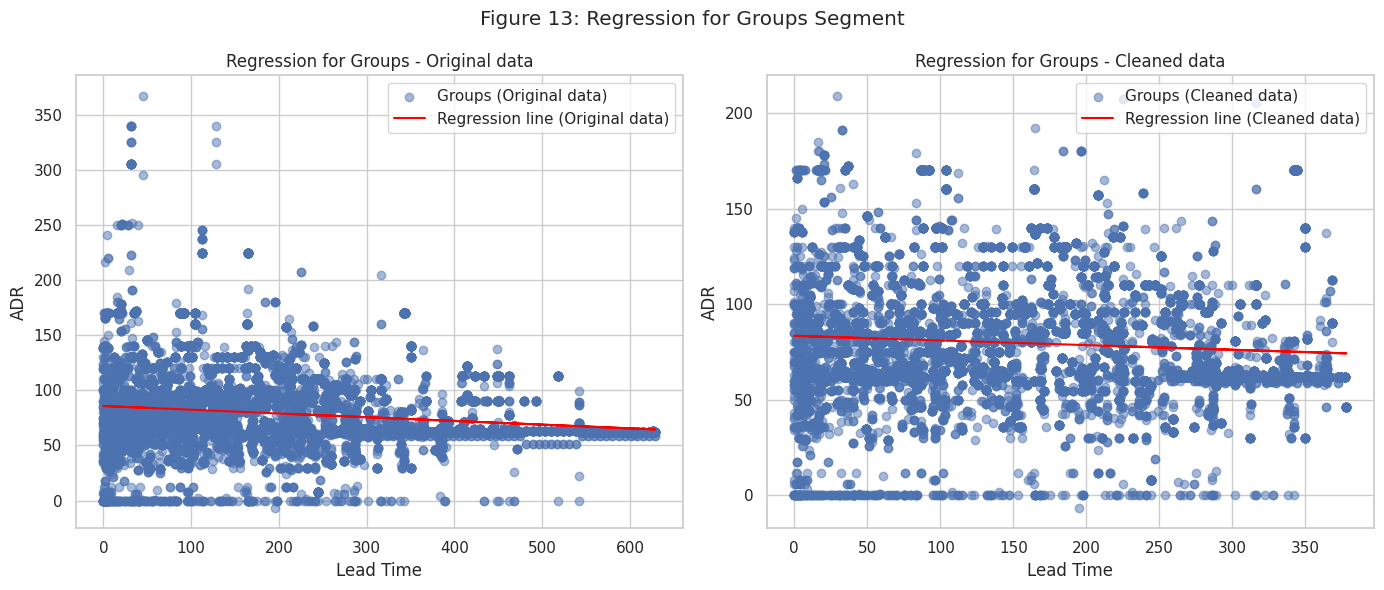

In [ ]:
# For 'Groups' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Groups', axes[0], 'Original data')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Groups', axes[1], 'Cleaned data')

set_main_figure_title("Regression for Groups Segment")
plt.tight_layout()
plt.show()

**Slope Line Analysis for "Groups" Market Segment:**

> The negative slope  indicates that as lead time increases, ADR decreases. This means that group bookings made further in advance tend to have lower prices due to discounted rate.

> However, the "Groups" segment has a long lead time but also the highest cancellation rate. This suggests that while groups book early, they often cancel or negotiate lower prices for early bookings.

> Ultimately, this signals that group bookings are unreliable and bring lower revenue, especially when booked early.

**d) For "Online TA" market segment:**

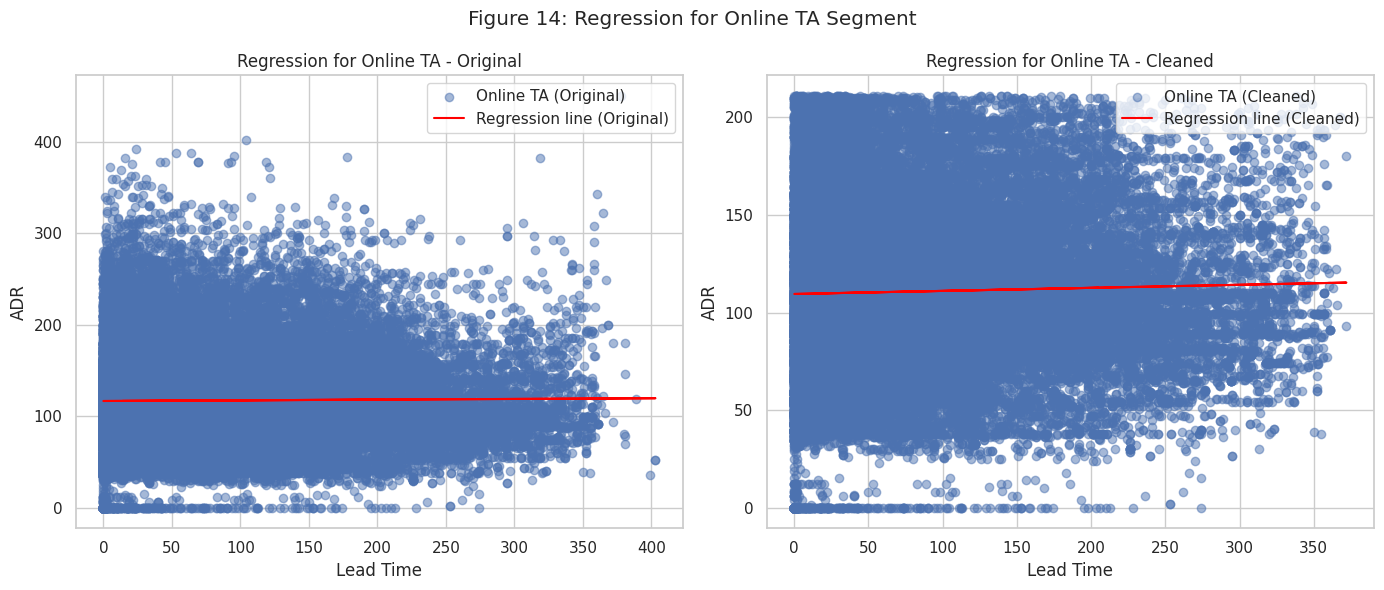

In [ ]:

# For 'Online TA' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Online TA', axes[0], 'Original')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Online TA', axes[1], 'Cleaned')

set_main_figure_title("Regression for Online TA Segment")
plt.tight_layout()
plt.show()


**Slope Line Analysis for "Online TA" Segment:**
> The slight increase in ADR as lead time increases suggests that early bookings don’t affect the price much, but seasonality and demand likely play a bigger role in the high ADR for Online TA.

> This means the hotel could focus more on optimizing seasonal pricing rather than pushing for early bookings in this segment.

**e) For "Offline TA/TO" market segment:**

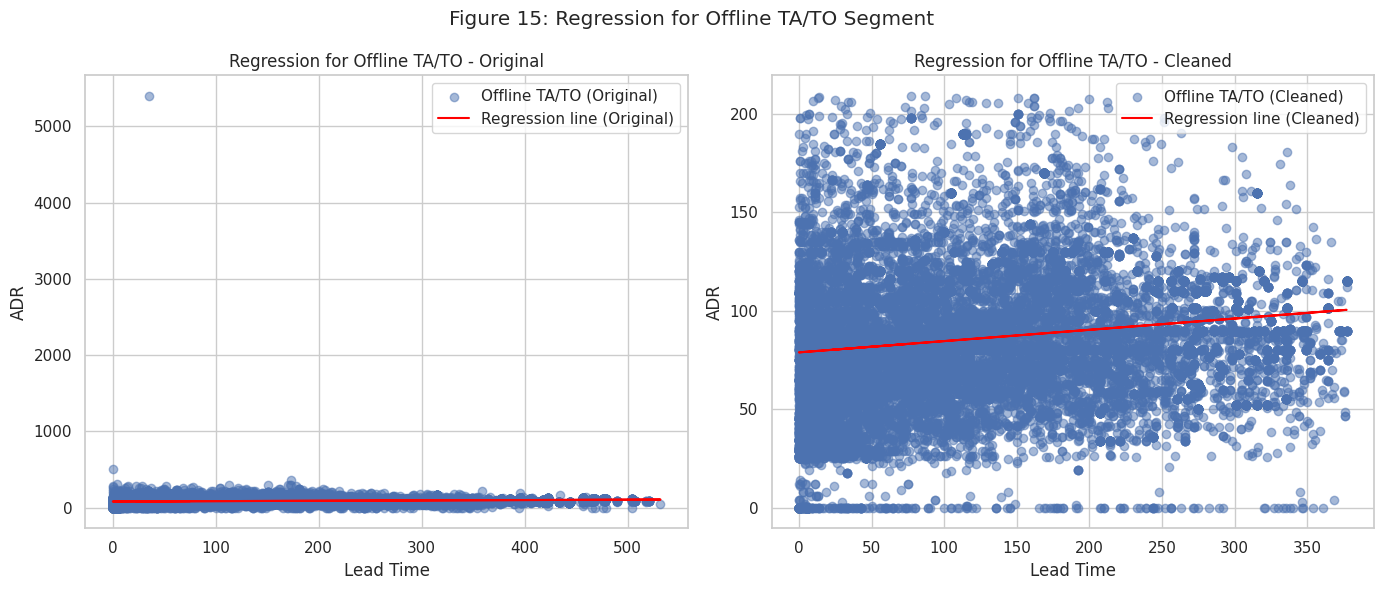

In [ ]:
# For 'Offline TA/TO' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Offline TA/TO', axes[0], 'Original')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Offline TA/TO', axes[1], 'Cleaned')

set_main_figure_title("Regression for Offline TA/TO Segment")
plt.tight_layout()
plt.show()


**Slope Line Analysis for "Offline TA/TO" Segment:**
> The positive relationship between lead time and ADR suggests that early Offline TA/TO bookings bring in higher revenue.

> This could be because customers booking through traditional agencies may prefer planning in advance, which leads to higher prices.

**f) For "Complementary" market segment:**

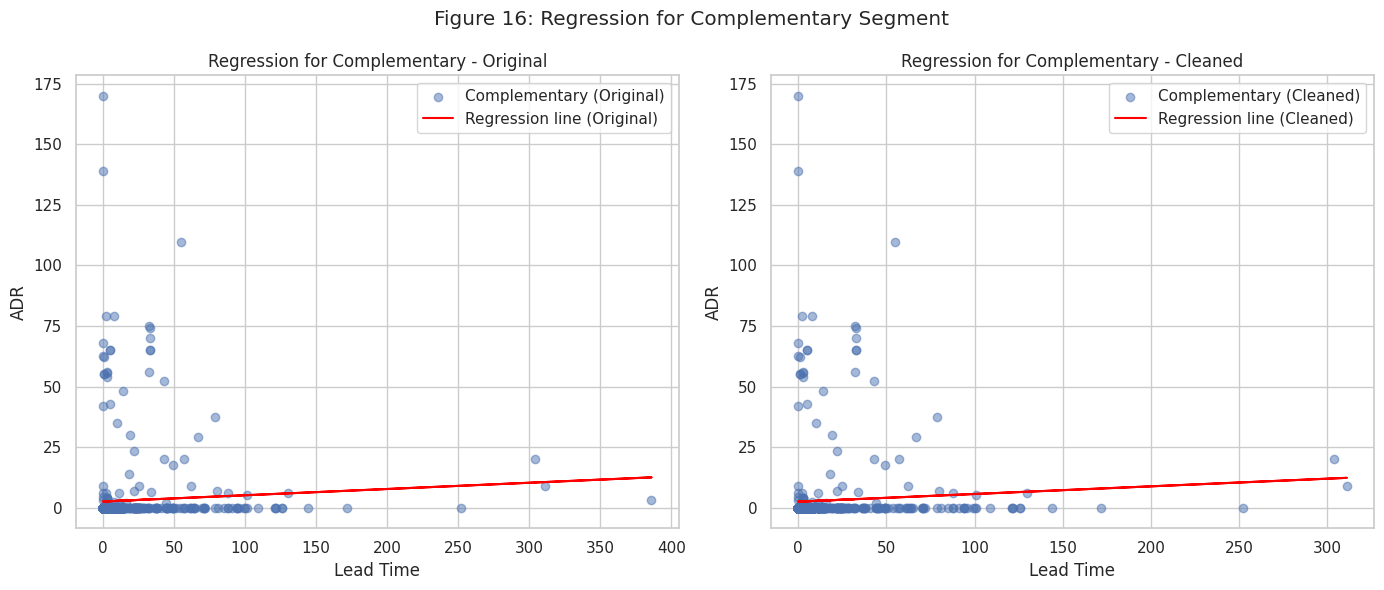

In [ ]:
# For 'Complementary' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Complementary', axes[0], 'Original')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Complementary', axes[1], 'Cleaned')

set_main_figure_title("Regression for Complementary Segment")
plt.tight_layout()
plt.show()

**Slope Line Analysis for "Complementary" Segment:**

> The "Complementary" segment has the lowest ADR, as these bookings often come from promotions or loyalty programs. However, it is still beneficial to know that longer lead times tend to bring slightly higher ADR.

> The positive slope shows that early bookings, even in the "Complementary" segment, can bring higher prices, suggesting that some guests may still pay for additional services. Therefore,  this segment could be leveraged to fill rooms during low-demand periods.


**g) For "Aviation" market segment:**

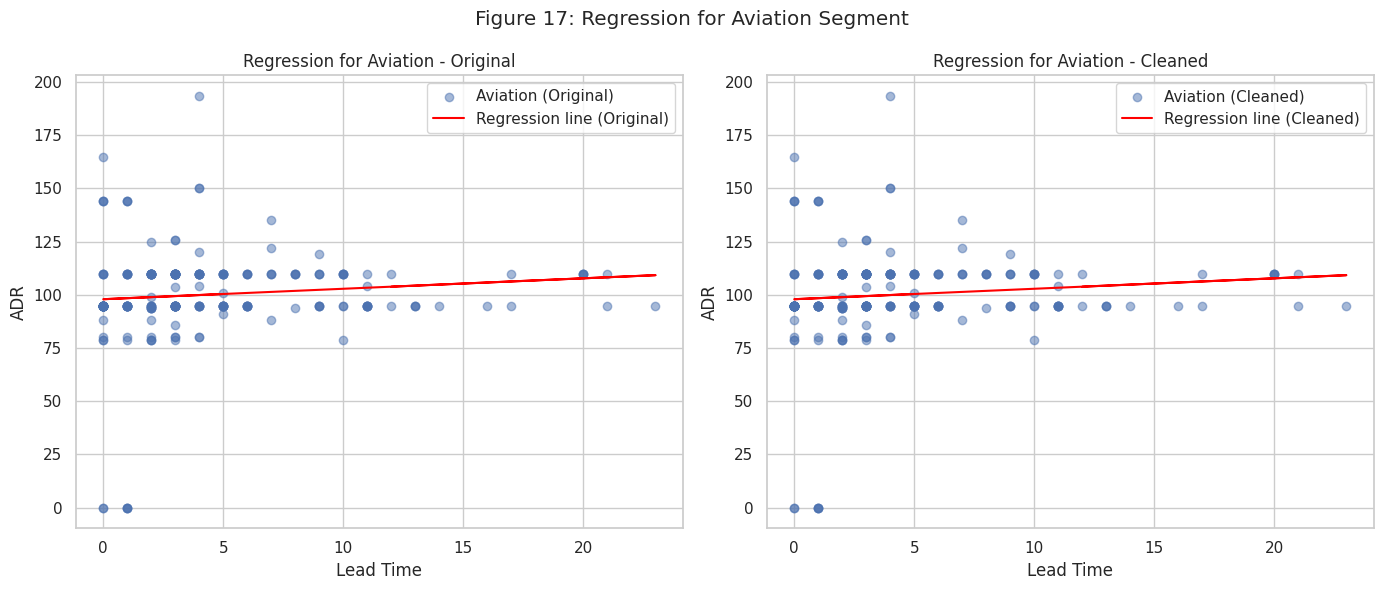

In [ ]:
# For 'Aviation' market segment

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Perform regression and plot for the original dataset
perform_regression_and_plot(df, 'Aviation', axes[0], 'Original')

# Perform regression and plot for the cleaned dataset
perform_regression_and_plot(df_cp, 'Aviation', axes[1], 'Cleaned')

set_main_figure_title("Regression for Aviation Segment")
plt.tight_layout()
plt.show()


**Slope Line Analysis for "Aviation" Segment:**
> The slight increase in ADR with lead time suggests that earlier bookings from the Aviation segment are slightly more profitable, but the nature of corporate or airline agreements likely means ADR remains relatively stable.

> In this case, the most effective ways to increase ADR is by upselling services like transportation.

### R-squared Comparison

**a) "Direct" Segment:**

In [ ]:
# Filter data for the Direct segment
direct_data = df_cp[df_cp['market_segment'] == 'Direct']

# Prepare independent and dependent variables
X_direct = direct_data[['lead_time']]
y_direct = direct_data['adr']

# Run linear regression
model_direct = LinearRegression().fit(X_direct, y_direct)
y_pred_direct = model_direct.predict(X_direct)

# Calculate R-squared
r_squared_direct = r2_score(y_direct, y_pred_direct)
print(f"R-squared for Direct: {r_squared_direct:.4f}")


R-squared for Direct: 0.0279


**b) "Online TA" Segment:**

In [ ]:
# Filter data for the Online TA segment
online_ta_data = df_cp[df_cp['market_segment'] == 'Online TA']

# Prepare independent and dependent variables
X_online_ta = online_ta_data[['lead_time']]
y_online_ta = online_ta_data['adr']

# Run linear regression
model_online_ta = LinearRegression().fit(X_online_ta, y_online_ta)
y_pred_online_ta = model_online_ta.predict(X_online_ta)

# Calculate R-squared
r_squared_online_ta = r2_score(y_online_ta, y_pred_online_ta)
print(f"R-squared for Online TA: {r_squared_online_ta:.4f}")

R-squared for Online TA: 0.0010


**c) "Groups" Segment:**

In [ ]:
# Filter data for the Groups segment
groups_data = df_cp[df_cp['market_segment'] == 'Groups']

# Prepare independent and dependent variables
X_groups = groups_data[['lead_time']]
y_groups = groups_data['adr']

# Run linear regression
model_groups = LinearRegression().fit(X_groups, y_groups)
y_pred_groups = model_groups.predict(X_groups)

# Calculate R-squared
r_squared_groups = r2_score(y_groups, y_pred_groups)
print(f"R-squared for Groups: {r_squared_groups:.4f}")


R-squared for Groups: 0.0071


**d) "Corporate" Segment:**

In [ ]:
# Filter data for the Corporate segment
corporate_data = df_cp[df_cp['market_segment'] == 'Corporate']

# Prepare independent and dependent variables
X_corporate = corporate_data[['lead_time']]
y_corporate = corporate_data['adr']

# Run linear regression
model_corporate = LinearRegression().fit(X_corporate, y_corporate)
y_pred_corporate = model_corporate.predict(X_corporate)

# Calculate R-squared
r_squared_corporate = r2_score(y_corporate, y_pred_corporate)
print(f"R-squared for Corporate: {r_squared_corporate:.4f}")


R-squared for Corporate: 0.0379


**e) "Complementary" Segment:**

In [ ]:
# Filter data for the Complementary segment
complementary_data = df_cp[df_cp['market_segment'] == 'Complementary']

# Prepare independent and dependent variables
X_complementary = complementary_data[['lead_time']]
y_complementary = complementary_data['adr']

# Run linear regression
model_complementary = LinearRegression().fit(X_complementary, y_complementary)
y_pred_complementary = model_complementary.predict(X_complementary)

# Calculate R-squared
r_squared_complementary = r2_score(y_complementary, y_pred_complementary)
print(f"R-squared for Complementary: {r_squared_complementary:.4f}")


R-squared for Complementary: 0.0042


**f) "Aviation" Segment:**

In [ ]:
# Filter data for the Aviation segment
aviation_data = df_cp[df_cp['market_segment'] == 'Aviation']

# Prepare independent and dependent variables
X_aviation = aviation_data[['lead_time']]
y_aviation = aviation_data['adr']

# Run linear regression
model_aviation = LinearRegression().fit(X_aviation, y_aviation)
y_pred_aviation = model_aviation.predict(X_aviation)

# Calculate R-squared
r_squared_aviation = r2_score(y_aviation, y_pred_aviation)
print(f"R-squared for Aviation: {r_squared_aviation:.4f}")


R-squared for Aviation: 0.0108


**g) "Offline TA/TO" Segment:**

In [ ]:
# Filter data for the Offline TA/TO segment
offline_ta_to_data = df_cp[df_cp['market_segment'] == 'Offline TA/TO']

# Prepare independent and dependent variables
X_offline_ta_to = offline_ta_to_data[['lead_time']]
y_offline_ta_to = offline_ta_to_data['adr']

# Run linear regression
model_offline_ta_to = LinearRegression().fit(X_offline_ta_to, y_offline_ta_to)
y_pred_offline_ta_to = model_offline_ta_to.predict(X_offline_ta_to)

# Calculate R-squared
r_squared_offline_ta_to = r2_score(y_offline_ta_to, y_pred_offline_ta_to)
print(f"R-squared for Offline TA/TO: {r_squared_offline_ta_to:.4f}")


R-squared for Offline TA/TO: 0.0300


In [ ]:
# Collect R-squared values
r_squared_values = {
    'Direct': r_squared_direct,
    'Online TA': r_squared_online_ta,
    'Groups': r_squared_groups,
    'Corporate': r_squared_corporate,
    'Complementary': r_squared_complementary,
    'Aviation': r_squared_aviation,
    'Offline TA/TO': r_squared_offline_ta_to
}

# Sort R-squared values for comparison
sorted_r_squared = sorted(r_squared_values.items(), key=lambda item: item[1], reverse=True)

# Display R-squared values in descending order
print("R-squared values comparison across segments:")
for segment, r2 in sorted_r_squared:
    print(f"Segment: {segment}, R-squared: {r2:.4f}")


R-squared values comparison across segments:
Segment: Corporate, R-squared: 0.0379
Segment: Offline TA/TO, R-squared: 0.0300
Segment: Direct, R-squared: 0.0279
Segment: Aviation, R-squared: 0.0108
Segment: Groups, R-squared: 0.0071
Segment: Complementary, R-squared: 0.0042
Segment: Online TA, R-squared: 0.0010


**R-Squared Values Analysis:**

> "Corporate" and "Offline TA/TO" segments have the highest R-squared values, indicating a weak but slightly more predictable relationship between Lead Time and ADR. For these segments, early-booking incentives may still be beneficial.

> The "Direct" and "Aviation" segments show even lower R-squared values, meaning Lead Time has very little influence on ADR, so the hotel should focus on last-minute deals for "Direct" bookings and upselling services for "Aviation".

> "Groups" have a very low R-squared value, highlighting their unpredictability due to cancellations, suggesting the need for non-refundable rates. "Complementary" and "Online TA" segments have the lowest R-squared values, meaning that Lead Time has virtually no effect on ADR, and pricing adjustments should instead focus on seasonal promotions and offers.

# **3. Trendline and Time Series Analysis**


This part aims to analyze hotel booking demand in Portugal between 2015 and 2017 using data from two distinct hotel types—city hotels and resort hotels. The dataset includes 40,060 observations for a resort hotel and 79,330 observations for a city hotel, covering variables such as booking volumes, cancellation rates, and booking behavior. Understanding booking trends and cancellation behavior is critical for the tourism industry to optimize revenue management and tailor marketing strategies.




## **Booking Volumes and Cancellation Rates Over Time**

First, we begin analyzing booking volumes and cancellation rates over time. This step is crucial for understanding how these two metrics interact and whether there are specific months where cancellations spike relative to bookings. Analyzing bookings and cancellations on the same graph allows us to spot correlations and identify periods where cancellation rates might be problematic.

For our analysis, we will focus on examining the results from the cleaned data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to create monthly booking volumes and cancellation rates for both datasets
def plot_booking_volumes_and_cancellation_rates(df, df_cp):
    # Create 'year_month' column for original and cleaned datasets
    df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']
    df_cp['year_month'] = df_cp['arrival_date_year'].astype(str) + '-' + df_cp['arrival_date_month']

    # Aggregate the number of bookings and cancellations per month for original data
    monthly_data_original = df.groupby('year_month').agg(
        bookings=('hotel', 'size'),
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Calculate cancellation rate for original data
    monthly_data_original['cancellation_rate'] = monthly_data_original['cancellations'] / monthly_data_original['bookings']
    monthly_data_original['year_month'] = pd.to_datetime(monthly_data_original['year_month'], format='%Y-%B')
    monthly_data_original = monthly_data_original.sort_values('year_month')

    # Aggregate the number of bookings and cancellations per month for cleaned data
    monthly_data_cleaned = df_cp.groupby('year_month').agg(
        bookings=('hotel', 'size'),
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Calculate cancellation rate for cleaned data
    monthly_data_cleaned['cancellation_rate'] = monthly_data_cleaned['cancellations'] / monthly_data_cleaned['bookings']
    monthly_data_cleaned['year_month'] = pd.to_datetime(monthly_data_cleaned['year_month'], format='%Y-%B')
    monthly_data_cleaned = monthly_data_cleaned.sort_values('year_month')

    # Create plots
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Subplot 1: Original Data
    ax1.set_xlabel('Year-Month')
    ax1.set_ylabel('Bookings (Original Data)', color='tab:blue')
    ax1.plot(monthly_data_original['year_month'], monthly_data_original['bookings'], color='tab:blue', label='Bookings')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for cancellation rates
    ax2 = ax1.twinx()
    ax2.set_ylabel('Cancellation Rate (Original Data)', color='tab:red')
    ax2.plot(monthly_data_original['year_month'], monthly_data_original['cancellation_rate'], color='tab:red', label='Cancellation Rate')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add trendlines for both bookings and cancellation rates (Original Data)
    z1 = np.polyfit(np.arange(len(monthly_data_original)), monthly_data_original['bookings'], 1)
    p1 = np.poly1d(z1)
    ax1.plot(monthly_data_original['year_month'], p1(np.arange(len(monthly_data_original))), "b--", label='Booking Trendline')

    z2 = np.polyfit(np.arange(len(monthly_data_original)), monthly_data_original['cancellation_rate'], 1)
    p2 = np.poly1d(z2)
    ax2.plot(monthly_data_original['year_month'], p2(np.arange(len(monthly_data_original))), "r--", label='Cancellation Trendline')

    plt.title('Booking Volumes and Cancellation Rates Over Time (Original data)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # Create a new figure for the cleaned data
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Subplot 2: Cleaned Data
    ax1.set_xlabel('Year - Month')
    ax1.set_ylabel('Bookings (Cleaned Data)', color='tab:blue')
    ax1.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['bookings'], color='tab:blue', label='Bookings')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for cancellation rates
    ax2 = ax1.twinx()
    ax2.set_ylabel('Cancellation Rate (Cleaned data)', color='tab:red')
    ax2.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['cancellation_rate'], color='tab:red', label='Cancellation Rate')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add trendlines for both bookings and cancellation rates (Cleaned Data)
    z1 = np.polyfit(np.arange(len(monthly_data_cleaned)), monthly_data_cleaned['bookings'], 1)
    p1 = np.poly1d(z1)
    ax1.plot(monthly_data_cleaned['year_month'], p1(np.arange(len(monthly_data_cleaned))), "b--", label='Booking Trendline')

    z2 = np.polyfit(np.arange(len(monthly_data_cleaned)), monthly_data_cleaned['cancellation_rate'], 1)
    p2 = np.poly1d(z2)
    ax2.plot(monthly_data_cleaned['year_month'], p2(np.arange(len(monthly_data_cleaned))), "r--", label='Cancellation Trendline')

    plt.title('Booking Volumes and Cancellation Rates Over Time (Cleaned data)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


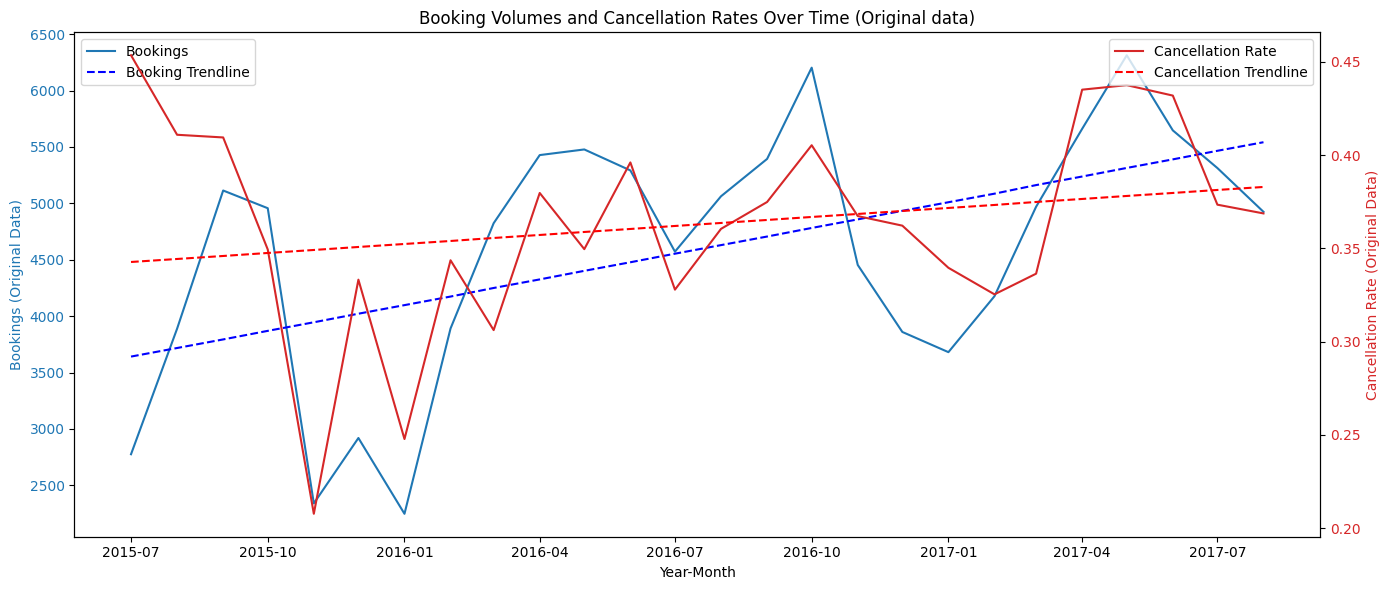

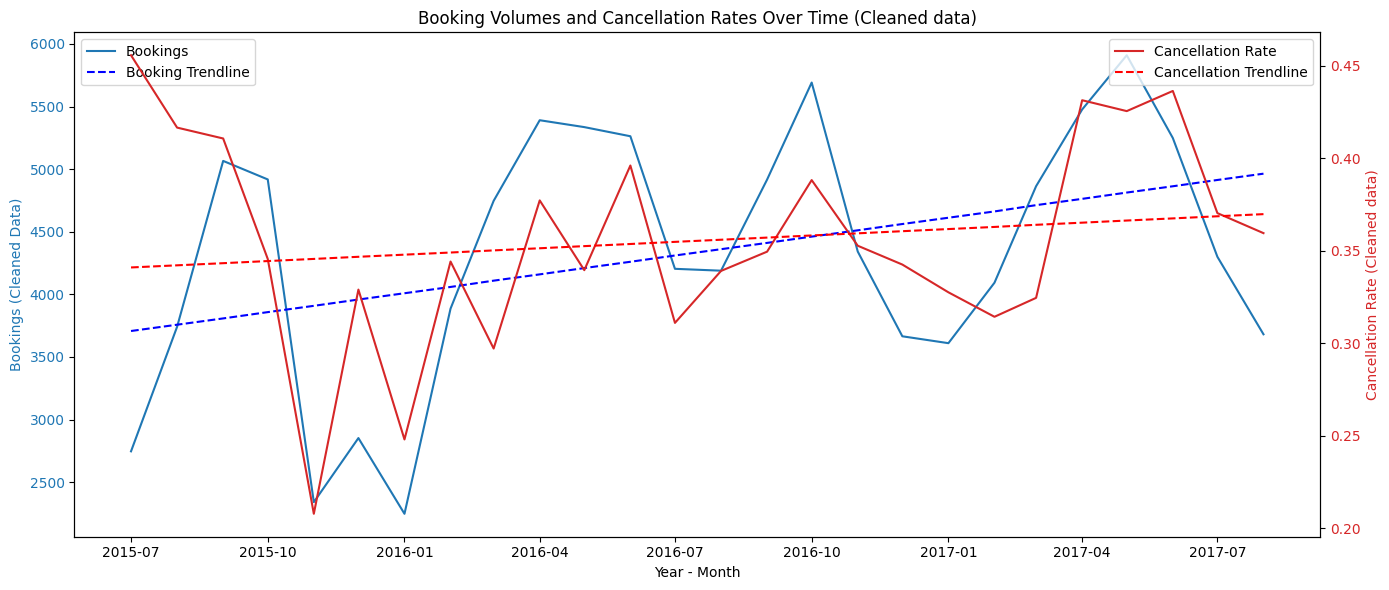

In [ ]:
plot_booking_volumes_and_cancellation_rates(df, df_cp)

**Booking Volumes and Cancellation Rates Over Time Analysis:**
> The chart illustrates the monthly booking volumes (blue line) alongside cancellation rates (red line) from July 2015 to August 2017. On the x-axis, we have the timeline, while the y-axes represent the number of bookings and the  cancellation rates.

> Looking at the booking volumes, it is clear that demand significantly increases during the summer months, particularly in July and August, which aligns with the busy vacation season in the tourism industry. In contrast, the winter months, such as January and February, see a noticeable drop in bookings, reflecting the off-peak period when demand is lower.

> Interestingly, cancellation rates tend to spike during these same high-demand periods, especially in the summer. This suggests that while many customers make early reservations, a significant number of them cancel closer to their travel dates, likely due to changes in their plans or finding better deals elsewhere.

**Booking Volumes Over Time (With Trendline)**


By separating booking volumes and cancellation rates, we can clearly see how each behaves independently and understand potential driving factors behind fluctuations.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to plot booking volumes for both datasets (df and df_cp)
def plot_booking_volumes(df, df_cp):
    # Create 'year_month' column for original and cleaned datasets
    df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']
    df_cp['year_month'] = df_cp['arrival_date_year'].astype(str) + '-' + df_cp['arrival_date_month']

    # Aggregate the number of bookings per month for original data
    monthly_data_original = df.groupby('year_month').agg(
        bookings=('hotel', 'size')
    ).reset_index()

    # Convert 'year_month' to datetime for sorting
    monthly_data_original['year_month'] = pd.to_datetime(monthly_data_original['year_month'], format='%Y-%B', errors='coerce')
    monthly_data_original = monthly_data_original.dropna(subset=['year_month']).sort_values('year_month')

    # Aggregate the number of bookings per month for cleaned data
    monthly_data_cleaned = df_cp.groupby('year_month').agg(
        bookings=('hotel', 'size')
    ).reset_index()

    # Convert 'year_month' to datetime for sorting
    monthly_data_cleaned['year_month'] = pd.to_datetime(monthly_data_cleaned['year_month'], format='%Y-%B', errors='coerce')
    monthly_data_cleaned = monthly_data_cleaned.dropna(subset=['year_month']).sort_values('year_month')

    # Plotting Booking Volumes Over Time for Original and Cleaned data
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))

    # Plot for Original Data
    axs[0].plot(monthly_data_original['year_month'], monthly_data_original['bookings'], label='Bookings')
    # Add trendline
    z = np.polyfit(monthly_data_original['year_month'].astype(int), monthly_data_original['bookings'], 1)
    p = np.poly1d(z)
    axs[0].plot(monthly_data_original['year_month'], p(monthly_data_original['year_month'].astype(int)), "b--", label='Trendline')
    axs[0].set_title('Booking Volumes Over Time (Original Data)')
    axs[0].set_xlabel('Year-Month')
    axs[0].set_ylabel('Bookings')
    axs[0].legend()

    # Plot for Cleaned Data
    axs[1].plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['bookings'], label='Bookings')
    # Add trendline
    z_cleaned = np.polyfit(monthly_data_cleaned['year_month'].astype(int), monthly_data_cleaned['bookings'], 1)
    p_cleaned = np.poly1d(z_cleaned)
    axs[1].plot(monthly_data_cleaned['year_month'], p_cleaned(monthly_data_cleaned['year_month'].astype(int)), "b--", label='Trendline')
    axs[1].set_title('Booking Volumes Over Time (Cleaned Data)')
    axs[1].set_xlabel('Year-Month')
    axs[1].set_ylabel('Bookings')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


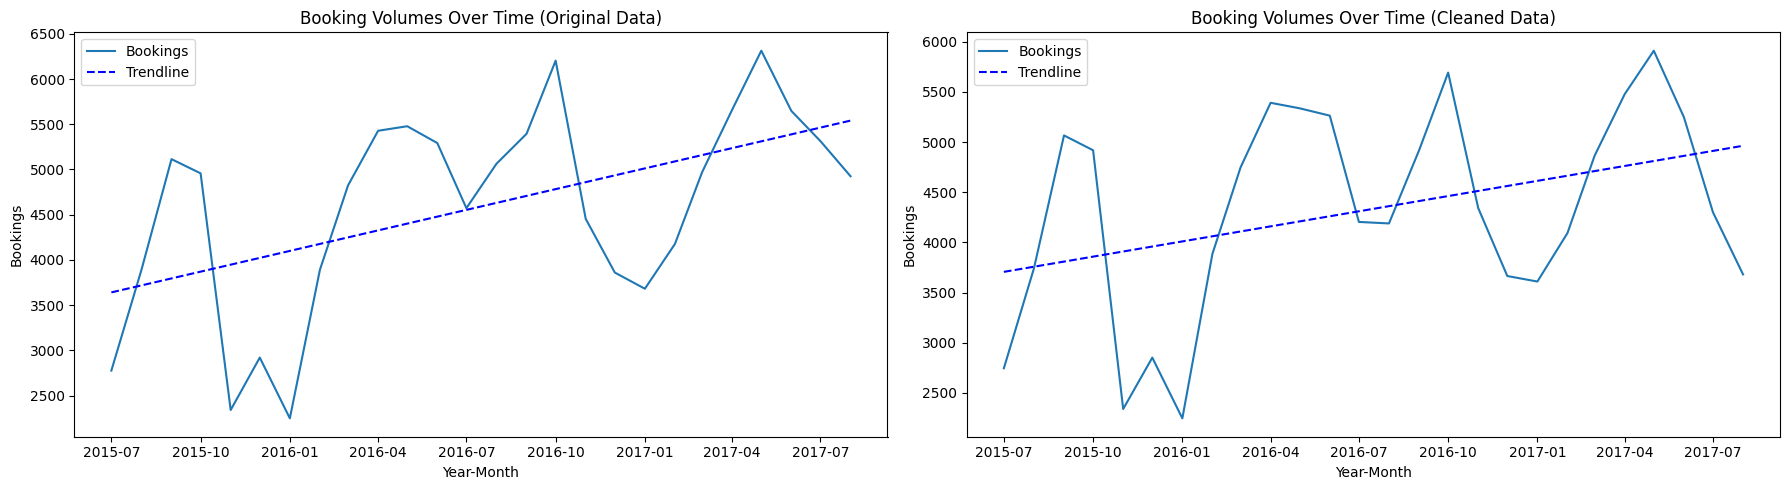

In [ ]:
plot_booking_volumes(df, df_cp)

 The number of bookings peaks significantly during summer months and shows a steady rise over the years. This separation reinforces the seasonality of hotel demand, with summer vacations driving up bookings.

**Cancellation Rates Over Time (Using trendline)**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to plot cancellation rates for both datasets (df and df_cp)
def plot_cancellation_rates(df, df_cp):
    # Create 'year_month' column for original and cleaned datasets
    df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B', errors='coerce')
    df_cp['year_month'] = pd.to_datetime(df_cp['arrival_date_year'].astype(str) + '-' + df_cp['arrival_date_month'], format='%Y-%B', errors='coerce')

    # Aggregate the cancellation rate per month for original data
    monthly_data_original = df.groupby('year_month').agg(
        cancellation_rate=('is_canceled', 'mean')
    ).reset_index()

    # Aggregate the cancellation rate per month for cleaned data
    monthly_data_cleaned = df_cp.groupby('year_month').agg(
        cancellation_rate=('is_canceled', 'mean')
    ).reset_index()

    # Sort the data by year_month to maintain chronological order
    monthly_data_original.sort_values('year_month', inplace=True)
    monthly_data_cleaned.sort_values('year_month', inplace=True)

    # Set up the plot for cancellation rates
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Plot for Original Data
    ax1 = axs[0]
    ax1.set_xlabel('Year-Month')
    ax1.set_ylabel('Cancellation Rate')
    ax1.plot(monthly_data_original['year_month'], monthly_data_original['cancellation_rate'], color='orange', label='Cancellation Rate')  # Set plot line to orange
    ax1.tick_params(axis='y')

    # Trendline for Original Data
    z1 = np.polyfit(np.arange(len(monthly_data_original)), monthly_data_original['cancellation_rate'], 1)
    p1 = np.poly1d(z1)
    ax1.plot(monthly_data_original['year_month'], p1(np.arange(len(monthly_data_original))), "orange", linestyle='--', label='Cancellation Trendline')  # Trendline

    # Title and legend for Original Data
    ax1.set_title('Cancellation Rates Over Time (Original Data)')
    ax1.legend(loc='upper right')
    ax1.grid()

    # Plot for Cleaned Data
    ax2 = axs[1]
    ax2.set_xlabel('Year-Month')
    ax2.set_ylabel('Cancellation Rate')
    ax2.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['cancellation_rate'], label='Cancellation Rate')
    ax2.tick_params(axis='y')

    # Trendline for Cleaned Data
    z2 = np.polyfit(np.arange(len(monthly_data_cleaned)), monthly_data_cleaned['cancellation_rate'], 1)
    p2 = np.poly1d(z2)
    ax2.plot(monthly_data_cleaned['year_month'], p2(np.arange(len(monthly_data_cleaned))), "blue", linestyle='--', label='Cancellation Trendline')  # Trendline

    # Title and legend for Cleaned Data
    ax2.set_title('Cancellation Rates Over Time (Cleaned Data)')
    ax2.legend(loc='upper right')
    ax2.grid()

    plt.tight_layout()
    plt.show()

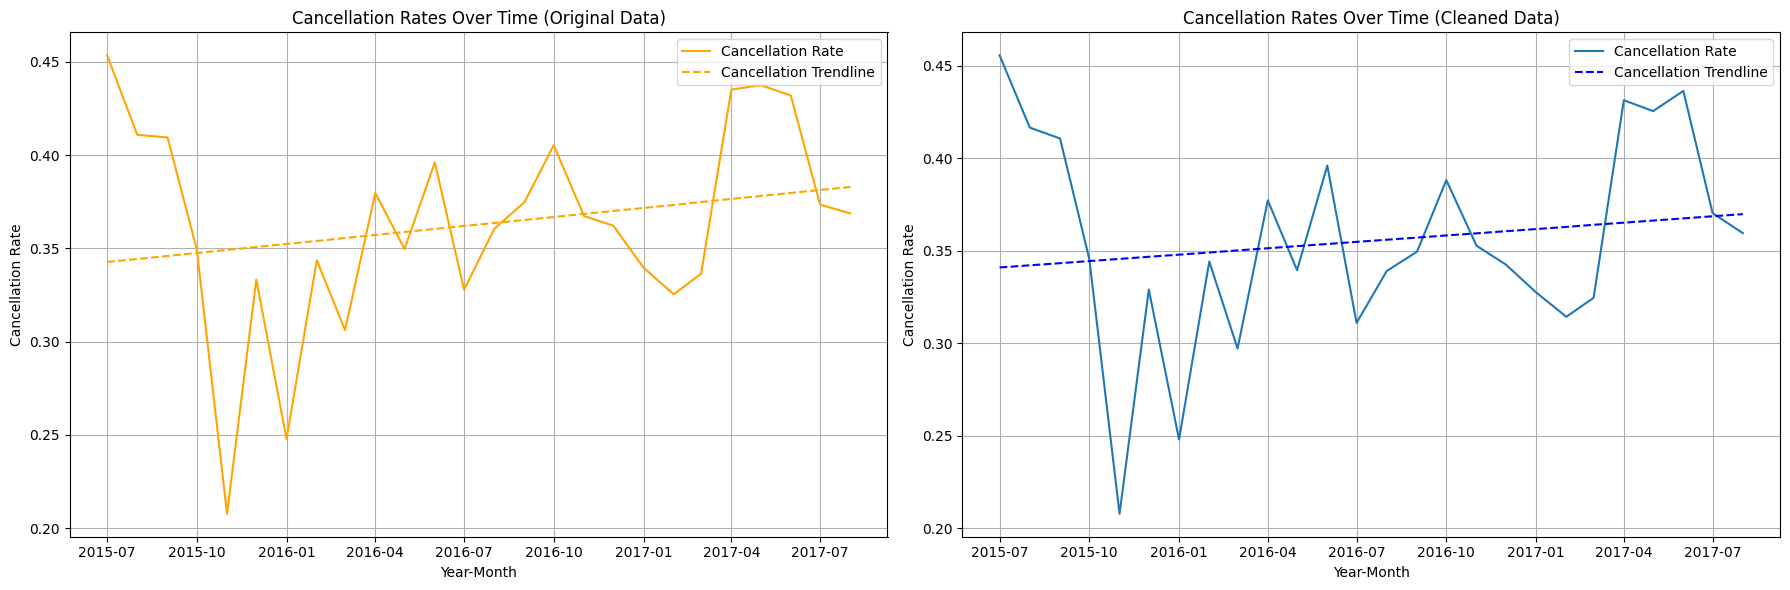

In [ ]:
plot_cancellation_rates(df, df_cp)

 The cancellation rate is more stable but displays spikes during off-peak seasons, particularly winter months. Cancellation spikes in winter may reflect uncertainty in travel plans due to weather conditions or personal circumstances.

**Booking Volumes Across Hotel Segment**

Next, we narrow down our focus again, this time to look at City Hotels vs. Resort Hotels. The goal here is to understand which hotel type sees more bookings over time and how each type performs in terms of attracting customers. By comparing these two segments, we can tailor marketing strategies or operations to the type of hotel that needs it most.


In [ ]:
# Function to aggregate bookings per hotel segment
def aggregate_booking_data(df):
    # Create 'year_month' column
    df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B', errors='coerce')

    # Aggregate the number of bookings per hotel segment
    booking_data = df.groupby(['year_month', 'hotel']).agg(
        bookings=('hotel', 'size')
    ).reset_index()

    # Sort data by 'year_month'
    booking_data = booking_data.sort_values('year_month')

    return booking_data

# Aggregate for original dataset (df)
booking_data_df = aggregate_booking_data(df)

# Aggregate for cleaned dataset (df_cp)
booking_data_cp = aggregate_booking_data(df_cp)


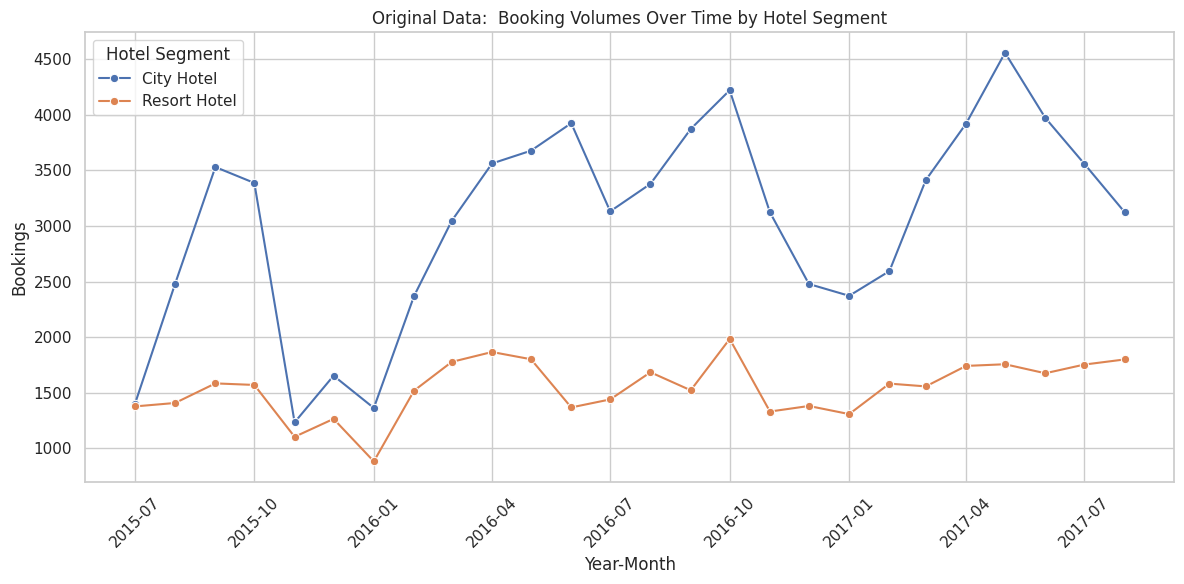

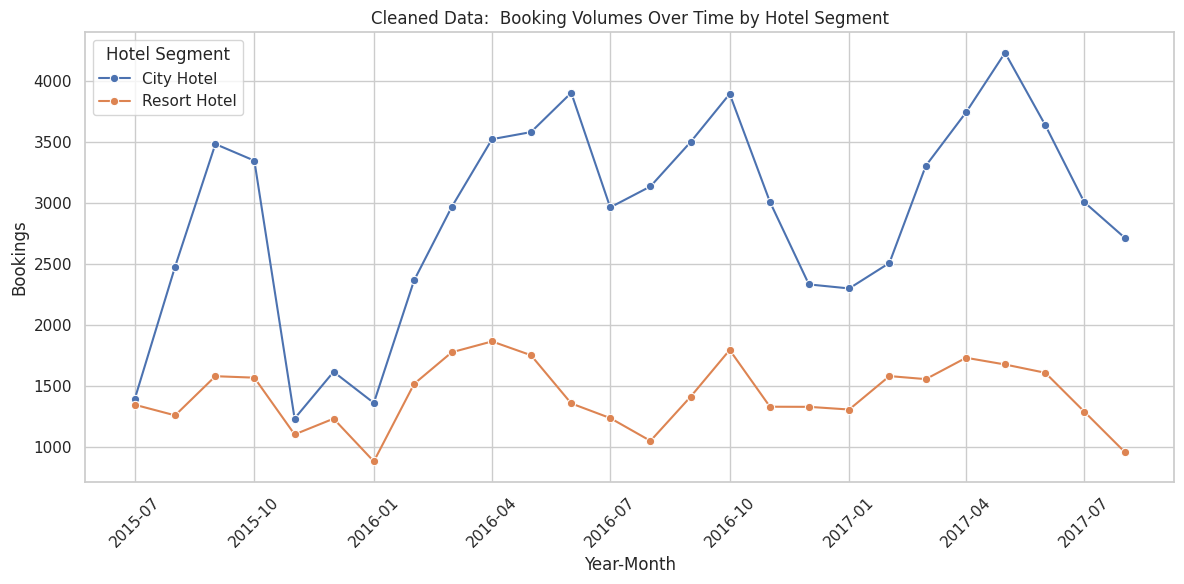

In [ ]:
# Set style for seaborn
sns.set(style='whitegrid')

# Function to plot booking volumes by hotel segment
def plot_booking_volumes(booking_data, title_prefix):
    # Plot booking volumes over time by hotel segment
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=booking_data, x='year_month', y='bookings', hue='hotel', marker='o')
    plt.title(f'{title_prefix} Booking Volumes Over Time by Hotel Segment')
    plt.xlabel('Year-Month')
    plt.ylabel('Bookings')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Segment')
    plt.tight_layout()
    plt.show()

# Plot for original dataset (df)
plot_booking_volumes(booking_data_df, title_prefix='Original Data: ')

# Plot for cleaned dataset (df_cp)
plot_booking_volumes(booking_data_cp, title_prefix='Cleaned Data: ')


**Booking Volumes Across Hotel Segment Analysis:**
>   City Hotel bookings show significant fluctuations, with peaks in July 2016 and April 2017, where bookings reach over 4000 units. There are also sharp declines, especially in January 2016 and July 2017, where bookings drop to around 2000 units. Overall, the City Hotel segment shows a high degree of volatility. On the other hand, Resort Hotel bookings remain much more stable, fluctuating between 1000 and 2000 units without major spikes or drops. The trend for Resort Hotels is generally flat, indicating that bookings for this segment remain consistent over time.

Following the booking volume analysis, it’s equally important to examine cancellation rates for each hotel type. This step helps us identify whether City Hotels or Resort Hotels experience higher cancellation rates, which can inform operational decisions and customer retention strategies.


In [ ]:
# Function to aggregate cancellations per hotel segment
def aggregate_cancellation_data(df):
    # Create 'year_month' column
    df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B', errors='coerce')

    # Aggregate the number of cancellations and calculate cancellation rates
    cancellation_data = df.groupby(['year_month', 'hotel']).agg(
        bookings=('hotel', 'size'),
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Calculate cancellation rate
    cancellation_data['cancellation_rate'] = cancellation_data['cancellations'] / cancellation_data['bookings']

    # Sort data by 'year_month'
    cancellation_data = cancellation_data.sort_values('year_month')

    return cancellation_data

# Aggregate for original dataset (df)
cancellation_data_df = aggregate_cancellation_data(df)

# Aggregate for cleaned dataset (df_cp)
cancellation_data_cp = aggregate_cancellation_data(df_cp)


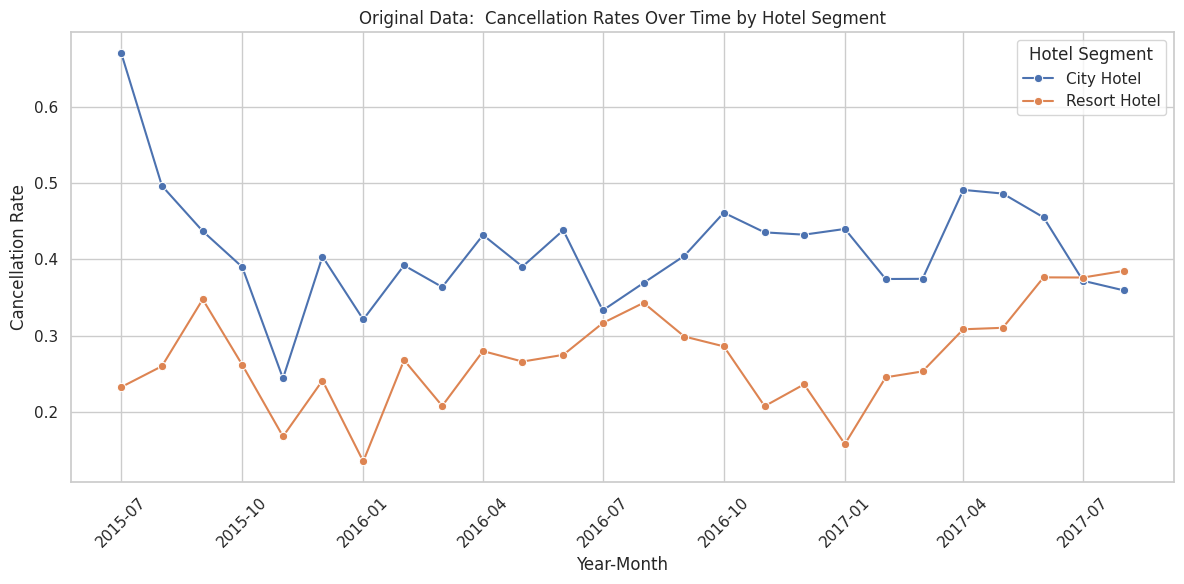

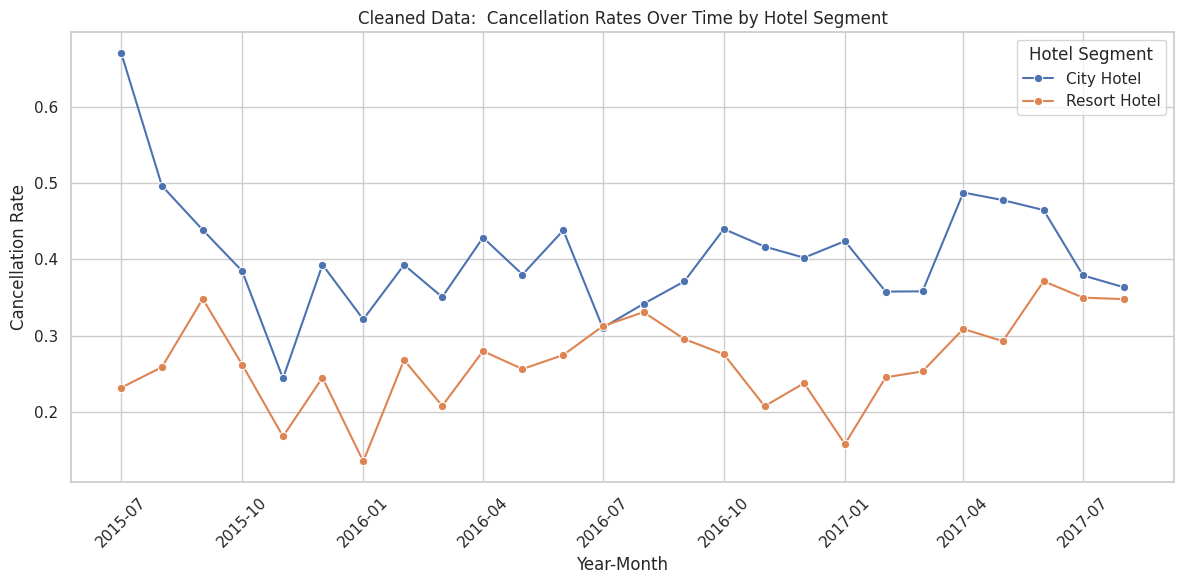

In [ ]:
# Function to plot cancellation rates by hotel segment
def plot_cancellation_rates(cancellation_data, title_prefix):
    # Plot cancellation rates over time by hotel segment
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=cancellation_data, x='year_month', y='cancellation_rate', hue='hotel', marker='o')
    plt.title(f'{title_prefix} Cancellation Rates Over Time by Hotel Segment')
    plt.xlabel('Year-Month')
    plt.ylabel('Cancellation Rate')
    plt.xticks(rotation=45)
    plt.legend(title='Hotel Segment')
    plt.tight_layout()
    plt.show()

# Plot for original dataset (df)
plot_cancellation_rates(cancellation_data_df, title_prefix='Original Data: ')

# Plot for cleaned dataset (df_cp)
plot_cancellation_rates(cancellation_data_cp, title_prefix='Cleaned Data: ')



**Cancellation Rates Across Hotel Segment Analysis:**
>  City Hotel cancellation rates start high, around 0.6 in July 2015, indicating that around 60% of bookings were canceled during this period. The cancellation rates then drop significantly and stabilize around 0.3 to 0.4, showing moderate fluctuations until July 2017. Resort Hotel cancellation rates, on the other hand, are consistently lower, starting at 0.3 and stabilizing around 0.2 to 0.3. The gap between the two hotel segments suggests that City Hotels experience higher cancellation rates than Resort Hotels over the entire period.




To further refine our analysis, it is crucial to understand the seasonal booking patterns for each hotel type, specifically City Hotels and Resort Hotels. By examining the total bookings across each month, we can identify which periods of the year experience the highest demand for each type of hotel.

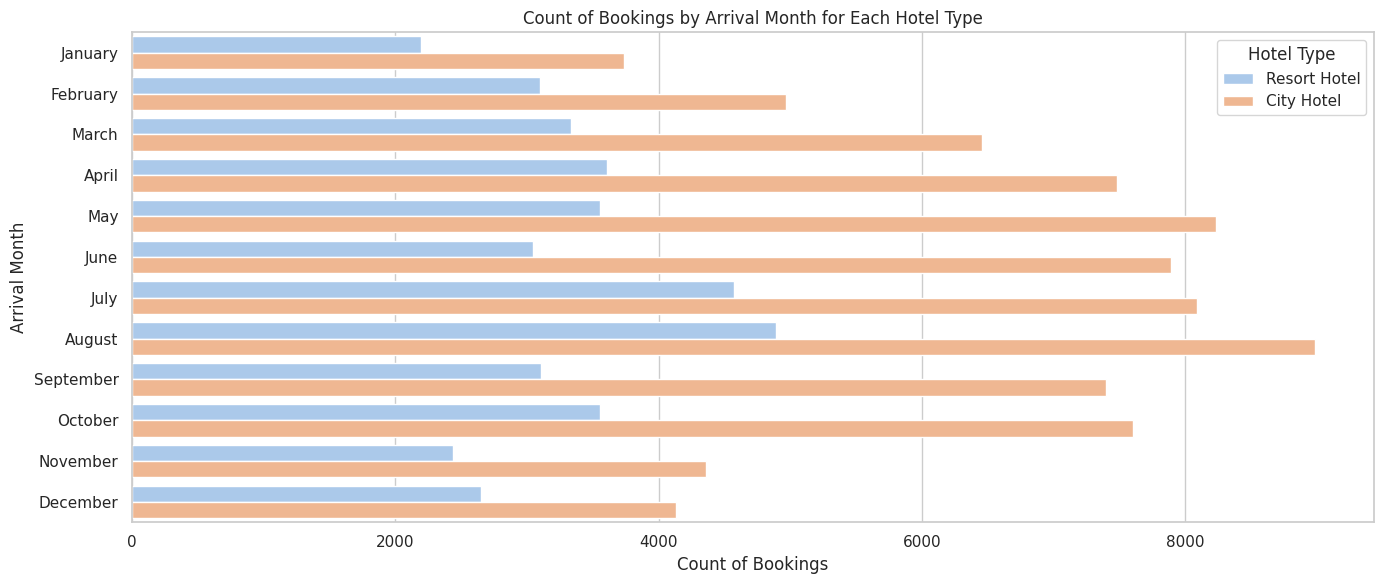

In [ ]:
# Define the ordered list of months
month_sorted = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Set up the figure size
plt.figure(figsize=(14, 6))

# Create a count plot for arrival dates with month on the y-axis and hue for hotel type
sns.countplot(data=df, y='arrival_date_month', hue='hotel',
              palette='pastel', order=month_sorted)

# Set the title and labels
plt.title('Count of Bookings by Arrival Month for Each Hotel Type')
plt.xlabel('Count of Bookings')
plt.ylabel('Arrival Month')

# Show the plot with a legend
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()


**Total Bookings by Arrival Month for Each Hotel Analysis:**

> The booking trends reveal distinct customer preferences between City Hotels and Resort Hotels. City Hotels consistently attract more bookings year-round, especially in May, July, and September, likely driven by business travelers and city events. Their location near urban centers and event venues, like in Lisbon, makes them ideal for those seeking convenience and proximity to city amenities.

> In contrast, Resort Hotels experience a peak during the summer months, with high bookings in July and August, reflecting their appeal for leisure and vacation travelers. Located in destinations like Algarve, Resort Hotels cater to tourists seeking relaxation, beachside stays, and family-friendly vacations.

> In conclusion, City Hotels thrive on year-round demand from business and event-goers, while Resort Hotels see strong seasonal demand during summer vacations. Tailored strategies, such as event-based promotions for City Hotels and summer packages for Resort Hotels, can help maximize bookings during their respective peak periods.

Once we understand booking trends by segment and hotel type, the next step is to look at booking volumes and cancellation rates of bar chart to know deeply about whether seasonal patterns impact these metrics.

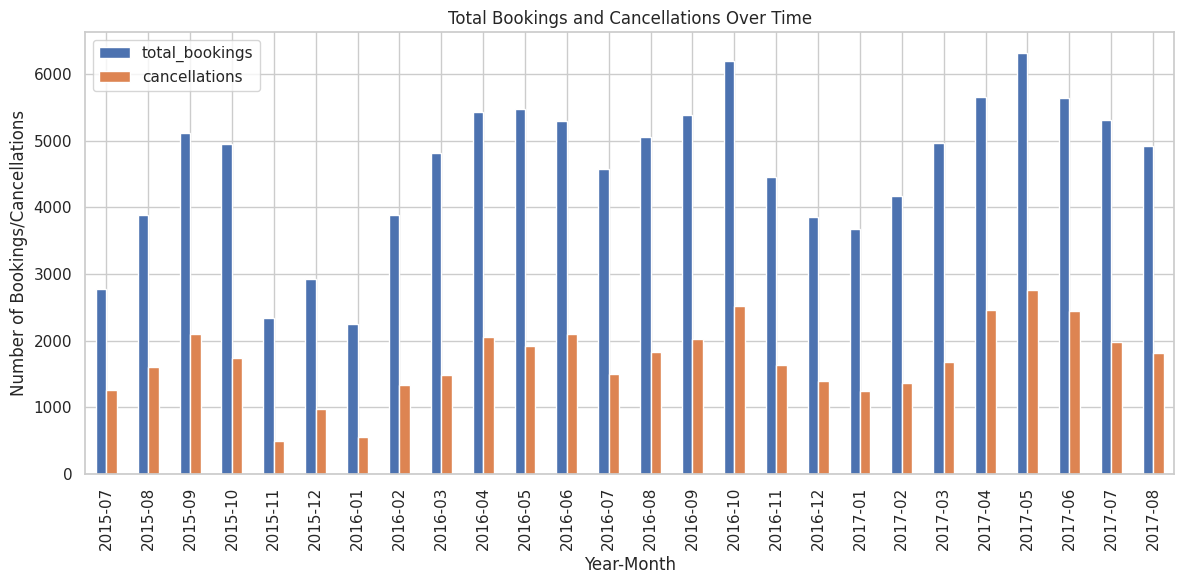

In [ ]:
# Formatting the 'year_month' column to show only 'Year-Month' in the desired format
data=df
# Convert the 'year_month' column to datetime, and then format it to 'Year-Month'
data['year_month'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'], format='%Y-%B')

# Format the 'year_month' to display only 'Year-Month' without the day part
data['year_month'] = data['year_month'].dt.strftime('%Y-%m')

# Display the first few rows to verify the formatting
data[['year_month']].head()

# Aggregating the data again for bookings and cancellations
monthly_data_sorted = df.groupby('year_month').agg(
    total_bookings=('is_canceled', 'size'),
    cancellations=('is_canceled', 'sum')
).reset_index()

# Sort the data by 'year_month'
monthly_data_sorted = monthly_data_sorted.sort_values('year_month')

# Plotting the bar plot for total bookings and cancellations, sorted by month
monthly_data_sorted.plot(
    x='year_month',
    y=['total_bookings', 'cancellations'],
    kind='bar',
    figsize=(12, 6),
    title='Total Bookings and Cancellations Over Time'
)

plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings/Cancellations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Total Bookings and Cancellations Over Time Analysis:**
> The bar chart shows clear seasonal patterns in bookings and cancellations from July 2015 to August 2017. Bookings peak in July, April, and September, coinciding with vacation seasons, with the highest point in July 2017 (over 5500 units). In contrast, winter months, especially January and February, see the lowest bookings (around 3000 to 3500 units). Cancellations remain steady throughout the year, though there is a slight increase during peak booking months like July and April, likely due to last-minute changes or flexible booking policies. Hotels should focus on maximizing revenue during these high-demand periods with dynamic pricing and stricter cancellation policies while offering targeted promotions during off-peak months to attract more customers.

The final step is to compare the proportion of bookings by market segment for each hotel type. This gives us insight into which customer segments prefer City Hotels versus Resort Hotels, helping hoteliers target their efforts more effectively.






## **Proportion of Bookings by Market Segment and Hotel Type**

In [ ]:
# Calculate total bookings per hotel and market segment
total_bookings_by_segment = df_cp.groupby(['hotel', 'market_segment']).size().reset_index(name='total_bookings')

# Calculate the total bookings for each hotel
total_bookings_per_hotel = df_cp.groupby('hotel').size().reset_index(name='hotel_total')

# Merge the two DataFrames to calculate the proportion
total_bookings_by_segment = pd.merge(total_bookings_by_segment, total_bookings_per_hotel, on='hotel')

# Calculate the proportion of total bookings by market segment
total_bookings_by_segment['proportion'] = total_bookings_by_segment['total_bookings'] / total_bookings_by_segment['hotel_total']

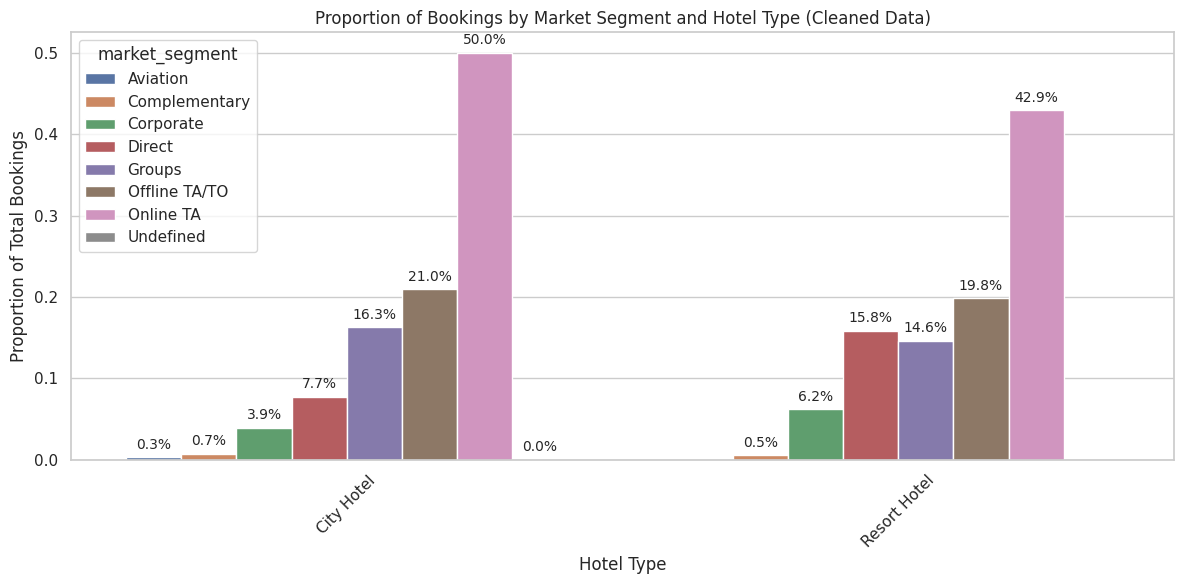

In [ ]:
# Set up the plot for the proportions using df_cp (cleaned data)
plt.figure(figsize=(12, 6))

# Plot the bar chart for total bookings proportions by market segment and hotel type from df_cp
barplot = sns.barplot(x='hotel', y='proportion', hue='market_segment', data=total_bookings_by_segment)

# Adding the text for each bar with proper alignment
for p in barplot.patches:
    if p.get_height() > 0:
        barplot.annotate(format(p.get_height(), '.1%'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 9), textcoords='offset points', fontsize=10)

# Formatting the plot
plt.title('Proportion of Bookings by Market Segment and Hotel Type (Cleaned Data)')
plt.xlabel('Hotel Type')
plt.ylabel('Proportion of Total Bookings')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**City Hotels Analysis**
> City Hotels rely heavily on "Online Travel Agencies" (TA), which account for 48.8% of their total bookings, indicating a strong preference for online booking platforms. Offline TA/TO follows with 21.1%, showing that traditional travel agents are still significant for city travelers, likely due to pre-arranged packages.

> The "Corporate" segment contributes 17.6%, highlighting City Hotels' appeal to business travelers due to their proximity to business centers and events. Other segments like "Groups", "Direct", and "Complementary" each make up a smaller portion of total bookings, below 8%.

**Resort Hotels Analysis**
>Resort Hotels also see a large share of bookings from "Online TA" at 44.3%, though this is slightly lower than City Hotels.

> The "Offline TA/TO" segment remains important, with 18.7% of bookings, as many leisure travelers still prefer traditional agents for vacation planning.

> "Direct" bookings are more common in Resort Hotels, making up 16.3%, possibly due to guests booking directly for personalized experiences. The "Groups" and "Corporate" segments are smaller, with 14.6% and 5.8% respectively, reflecting the leisure focus of Resort Hotels.

Finally, we analyze booking volumes and cancellation rates by different market segments because understanding customer behavior at a segment level is critical. This step allows us to see how specific segments such as Direct, Corporate, or Online TA perform in terms of bookings and cancellations. By isolating each segment, we gain insights into which segments are responsible for the most cancellations, and whether certain segments are more reliable than others.














**Booking volumes and Cancellation rate for a market segment**

In [ ]:
# Function to create monthly trends for a specific market segment without triggering SettingWithCopyWarning
def plot_monthly_trends_comparison(data_original, data_cleaned, market_segment):
    # Filter the data for the specified market segment
    segment_data_original = data_original.loc[data_original['market_segment'] == market_segment].copy()
    segment_data_cleaned = data_cleaned.loc[data_cleaned['market_segment'] == market_segment].copy()

    # Create a 'year_month' column to group by year and month for both datasets
    segment_data_original['year_month'] = pd.to_datetime(segment_data_original['arrival_date_year'].astype(str) + '-' + segment_data_original['arrival_date_month'], format='%Y-%B')
    segment_data_cleaned['year_month'] = pd.to_datetime(segment_data_cleaned['arrival_date_year'].astype(str) + '-' + segment_data_cleaned['arrival_date_month'], format='%Y-%B')

    # Group by 'year_month' to calculate booking volumes for both datasets
    monthly_data_original = segment_data_original.groupby('year_month').agg(
        total_bookings=('is_canceled', 'size')
    ).reset_index()

    monthly_data_cleaned = segment_data_cleaned.groupby('year_month').agg(
        total_bookings=('is_canceled', 'size')
    ).reset_index()

    # Sort the data by year_month for both datasets
    monthly_data_original = monthly_data_original.sort_values('year_month')
    monthly_data_cleaned = monthly_data_cleaned.sort_values('year_month')

    # Plotting side by side for comparison
    plt.figure(figsize=(16, 6))

    # Subplot for Original Data
    plt.subplot(1, 2, 1)
    plt.plot(monthly_data_original['year_month'], monthly_data_original['total_bookings'], label='Total Bookings', color='blue', marker='o')
    plt.title(f'Monthly Total Bookings for {market_segment} Segment (Original data)')
    plt.xlabel('Year Month')
    plt.ylabel('Total Bookings')
    plt.xticks(rotation=90)
    z1 = np.polyfit(range(len(monthly_data_original['year_month'])), monthly_data_original['total_bookings'], 1)
    p1 = np.poly1d(z1)
    plt.plot(monthly_data_original['year_month'], p1(range(len(monthly_data_original['year_month']))), "b--", label="Bookings Trend")
    plt.legend()
    plt.grid(True)

    # Subplot for Cleaned Data
    plt.subplot(1, 2, 2)
    plt.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['total_bookings'], label='Total Bookings', color='green', marker='o')
    plt.title(f'Monthly Total Bookings for {market_segment} Segment (Cleaned data)')
    plt.xlabel('Year Month')
    plt.ylabel('Total Bookings')
    plt.xticks(rotation=90)
    z2 = np.polyfit(range(len(monthly_data_cleaned['year_month'])), monthly_data_cleaned['total_bookings'], 1)
    p2 = np.poly1d(z2)
    plt.plot(monthly_data_cleaned['year_month'], p2(range(len(monthly_data_cleaned['year_month']))), "g--", label="Bookings Trend")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
# Function to create monthly trends for cancellations for a specific market segment, with sorted months
def plot_monthly_cancellations_comparison(df, df_cp, market_segment):
    # Filter the data for the specified market segment (Original and Cleaned datasets)
    segment_data_original = df[df['market_segment'] == market_segment].copy()
    segment_data_cleaned = df_cp[df_cp['market_segment'] == market_segment].copy()

    # Create a 'year_month' column to group by year and month for both datasets
    segment_data_original['year_month'] = pd.to_datetime(segment_data_original['arrival_date_year'].astype(str) + '-' + segment_data_original['arrival_date_month'], format='%Y-%B')
    segment_data_cleaned['year_month'] = pd.to_datetime(segment_data_cleaned['arrival_date_year'].astype(str) + '-' + segment_data_cleaned['arrival_date_month'], format='%Y-%B')

    # Group by 'year_month' to calculate cancellations for both datasets
    monthly_data_original = segment_data_original.groupby('year_month').agg(
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    monthly_data_cleaned = segment_data_cleaned.groupby('year_month').agg(
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Sort the data by 'year_month'
    monthly_data_original = monthly_data_original.sort_values('year_month')
    monthly_data_cleaned = monthly_data_cleaned.sort_values('year_month')

    # Create a figure with two subplots (side by side)
    plt.figure(figsize=(14, 6))

    # Subplot 1: Cancellations (Original Data) - Green
    plt.subplot(1, 2, 1)
    plt.plot(monthly_data_original['year_month'], monthly_data_original['cancellations'], label='Cancellations', color='green', marker='o')  # Line color green
    plt.title(f'Monthly Cancellations for {market_segment} Segment (Original data)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Cancellations')
    plt.xticks(rotation=90)

    # Add a trendline for cancellations (Original Data) with green color
    z1 = np.polyfit(range(len(monthly_data_original['year_month'])), monthly_data_original['cancellations'], 1)
    p1 = np.poly1d(z1)
    plt.plot(monthly_data_original['year_month'], p1(range(len(monthly_data_original['year_month']))), color='green', linestyle="--", label="Cancellations Trend")  # Trend line color green
    plt.legend()
    plt.grid(True)

    # Subplot 2: Cancellations (Cleaned Data) - Blue
    plt.subplot(1, 2, 2)
    plt.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['cancellations'], label='Cancellations', color='blue', marker='o')  # Line color blue
    plt.title(f'Monthly Cancellations for {market_segment} Segment (Cleaned data)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Cancellations')
    plt.xticks(rotation=90)

    # Add a trendline for cancellations (Cleaned Data) with blue color
    z2 = np.polyfit(range(len(monthly_data_cleaned['year_month'])), monthly_data_cleaned['cancellations'], 1)
    p2 = np.poly1d(z2)
    plt.plot(monthly_data_cleaned['year_month'], p2(range(len(monthly_data_cleaned['year_month']))), color='blue', linestyle="--", label="Cancellations Trend")  # Trend line color blue
    plt.legend()
    plt.grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


**a) About "Direct" segment**

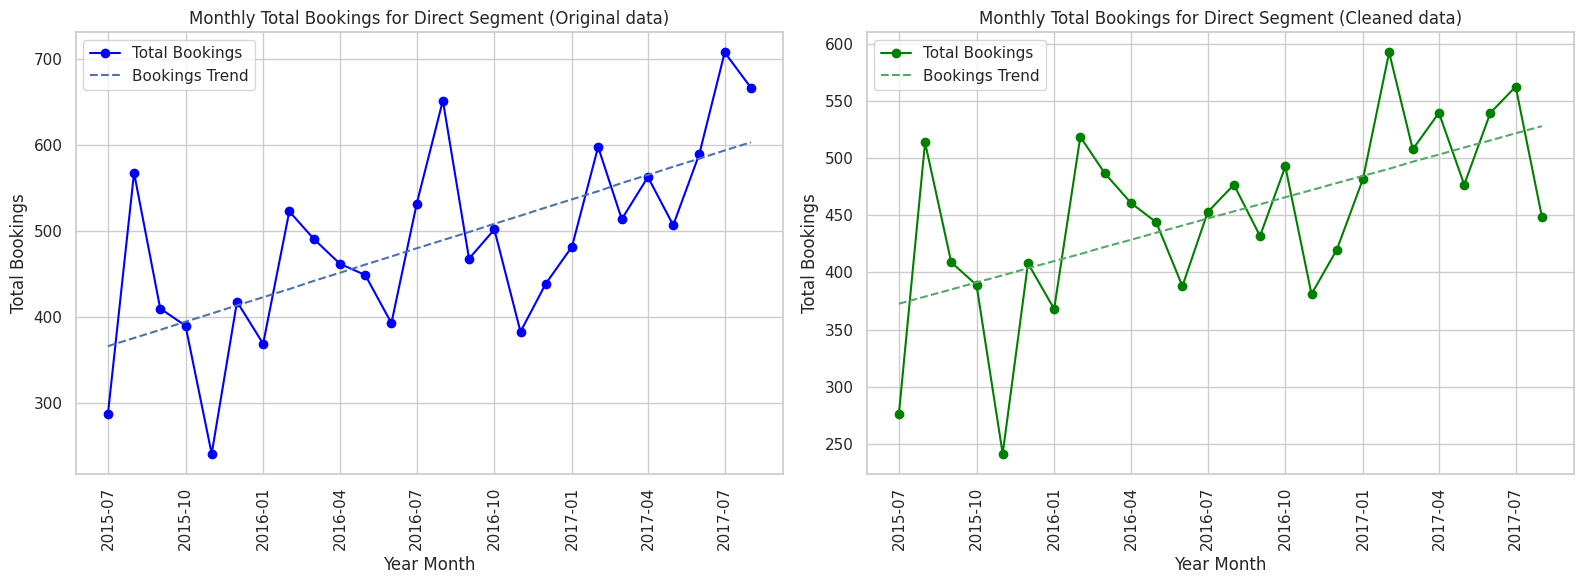

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Direct')

**Monthy Total Bookings for Direct Segment Analysis:**
> The cleaned data presents a steady upward trend, fluctuating between 300 and 700 units, however, with slightly lower peaks, stabilizing around 400-600 units. The trendline remains positive, showing a steady growth in direct bookings over time, despite some fluctuations.

> From this chart, we can see a consistent growth in bookings. Direct bookings are steadily increasing, with notable peaks in July and December, likely driven by holiday seasons.

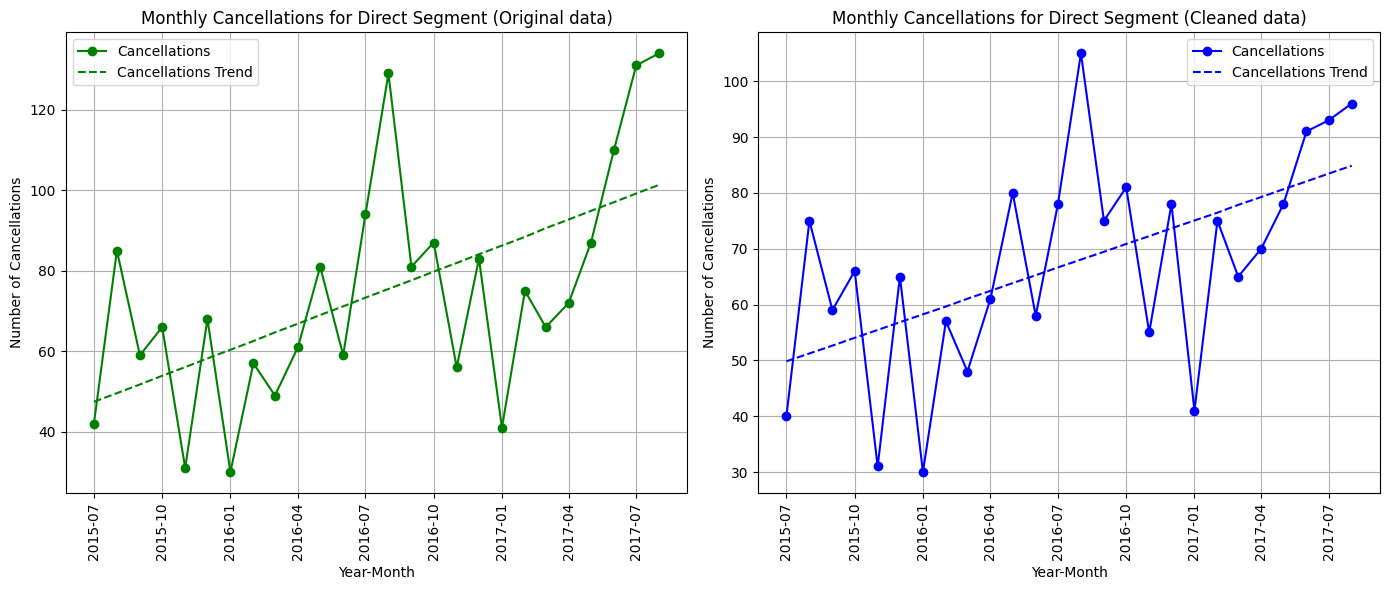

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Direct')

**Monthly Cancellations for Direct Segment:**
> The cleaned data also shows a rise in cancellations, with fewer extreme spikes. Cancellations range from 40 to 90 units, but the overall trend is still upward, indicating that as booking volumes increase, cancellations are also becoming more frequent.

> The figure indicates for rising cancellations.Alongside the increase in bookings, cancellations are also on the rise, especially in December 2016 and March 2017, highlighting potential challenges in retaining direct bookings.

**b) About "Corporate" segment**

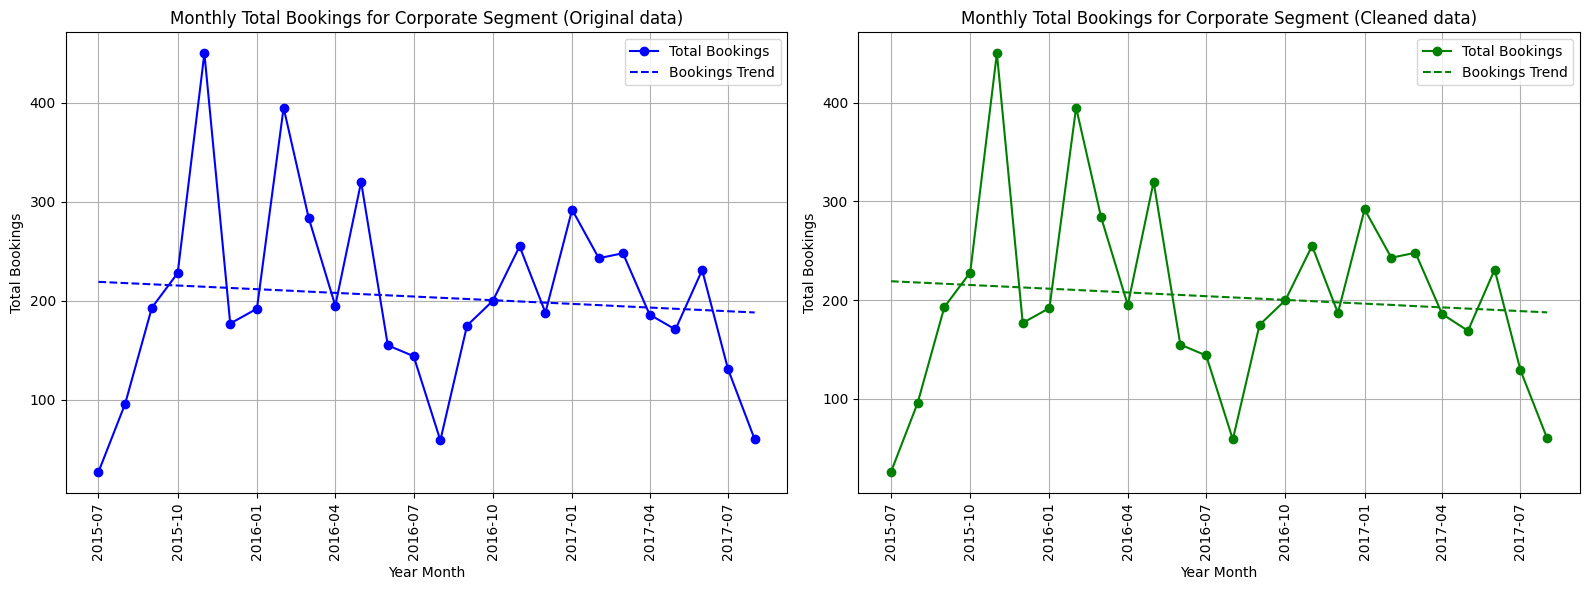

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Corporate')

**Monthy Total Bookings for Corporate Segment Analysis:**
> Corporate booking volumes show fluctuations, with notable peaks in December 2015 and January 2016, where bookings hit approximately 400 units. After these spikes, volumes decline and stabilize between 100 and 250 units for the rest of the period. Despite these ups and downs, the trendline remains fairly flat, indicating that corporate bookings are consistent, but there isn’t any significant growth over time.

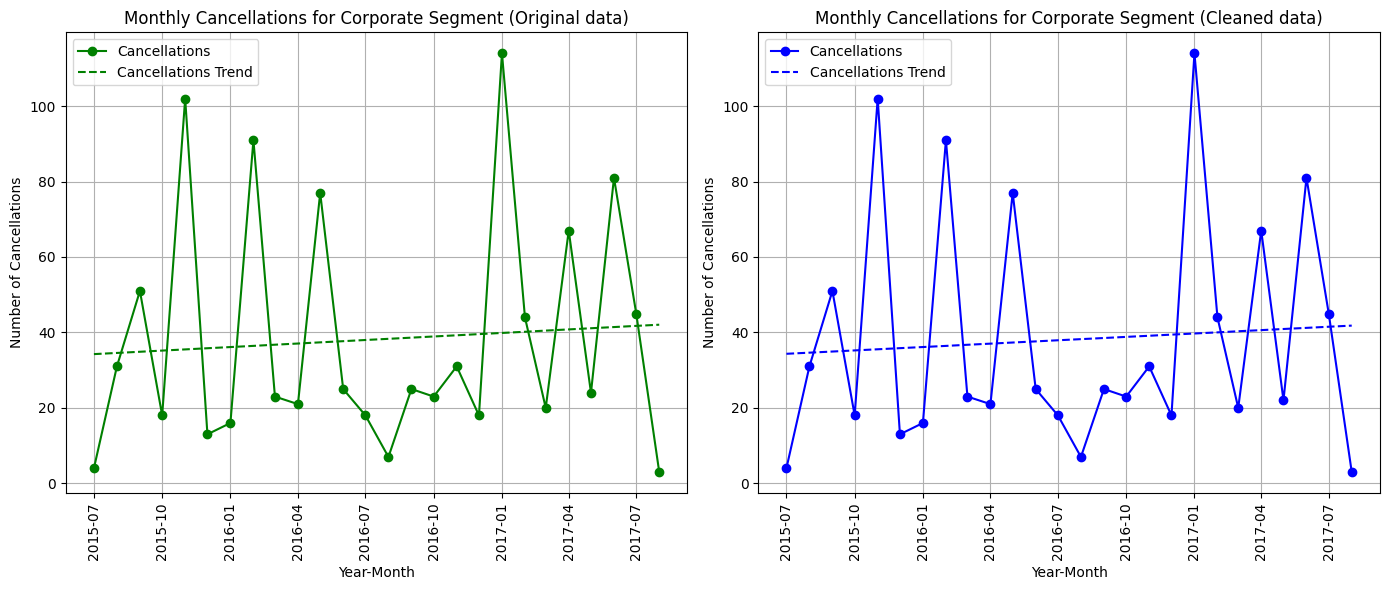

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Corporate')

**Monthly Cancellations for Corporate Segment Analysis:**
> Cancellations follow a similar pattern of volatility, with several spikes, particularly in March 2016 and January 2017, where cancellations reach up to 100 units. While cancellations vary month to month, the overall trend shows a slight increase, suggesting a gradual rise in corporate cancellations over time, though still fluctuating widely.

**c) About "Online TA" segment**

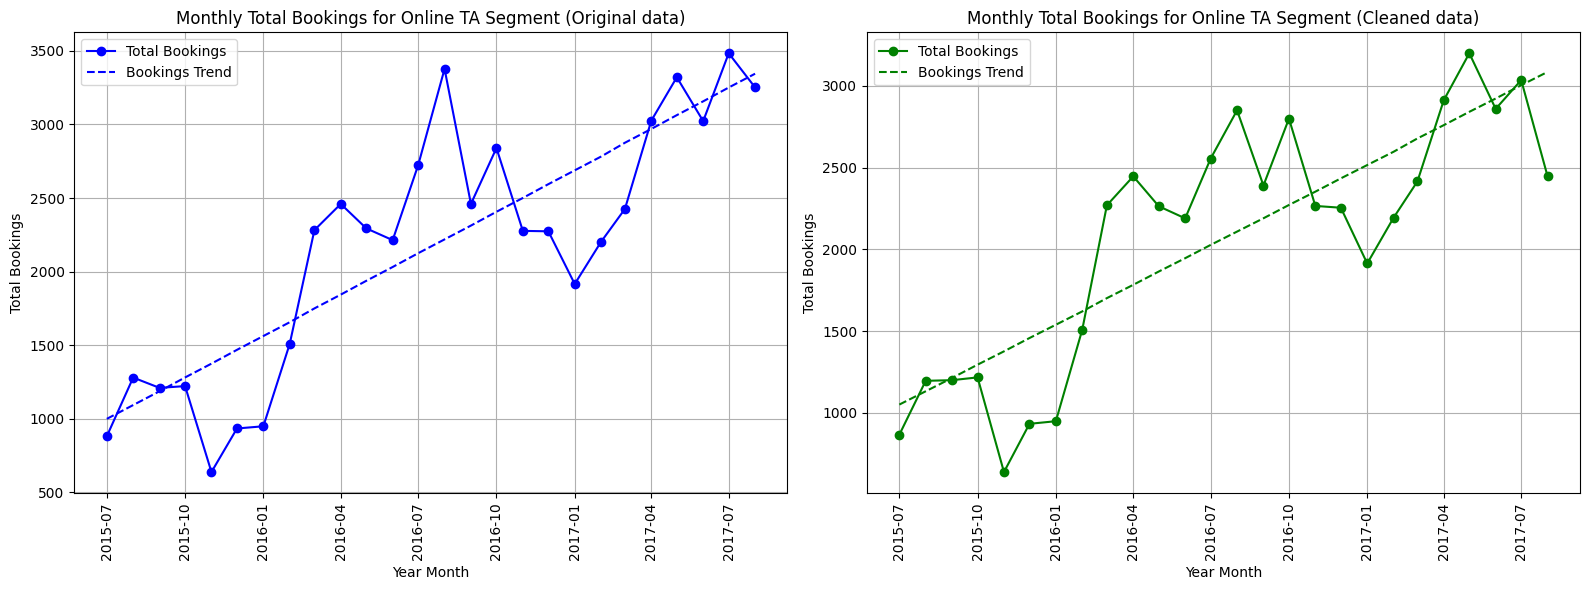

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Online TA')

**Monthly Total Bookings for Online TA Segment Analysis:**
> The peak booking volumes are slightly lower, capping around 1800 units in the final months. The trendline still indicates growth, showing that online bookings are increasingly becoming a preferred method for customers in this segment. This suggests that more customers are opting for online platforms, potentially driven by convenience, promotions, and broader access to travel options.

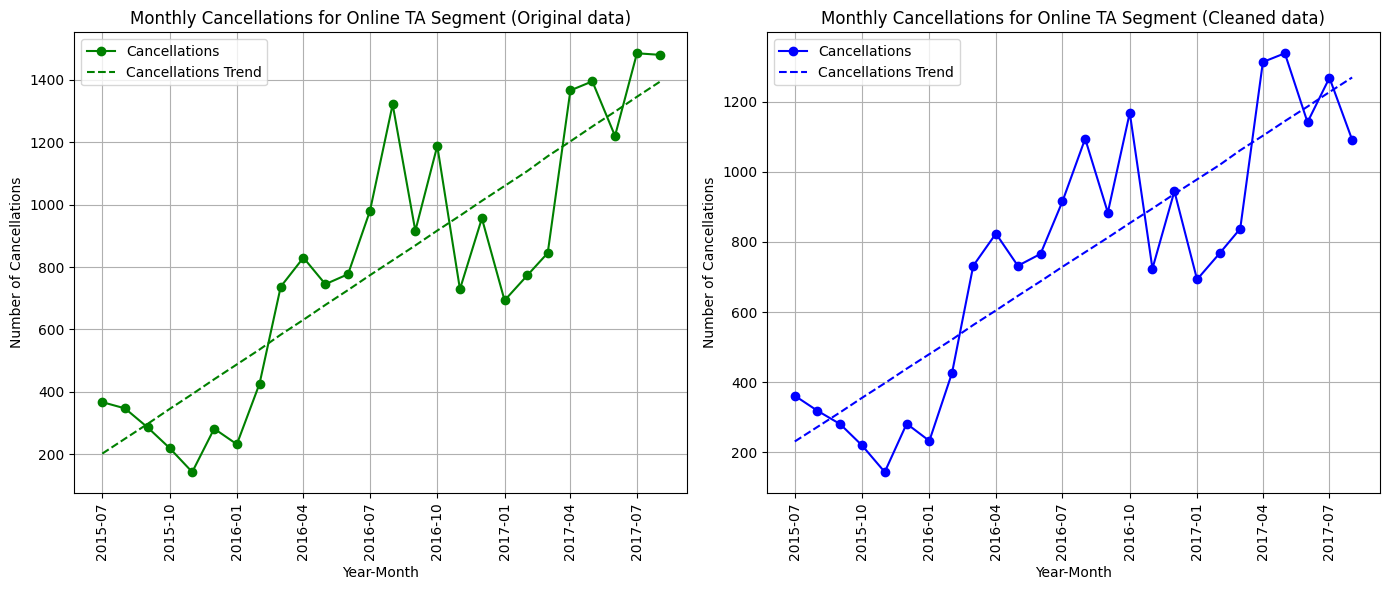

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Online TA')

**Monthly Cancellations for Online TA Segment Analysis:**
> Cancellations exhibit a strong upward trend, with notable peaks in October 2015, May 2016, and April 2017, where cancellations reach 1200-1400 units. The trendline is sharply increasing, showing that as booking volumes rise, so do cancellations, indicating a strong correlation between the two.

**d) About "Offline TA/TO" segment**




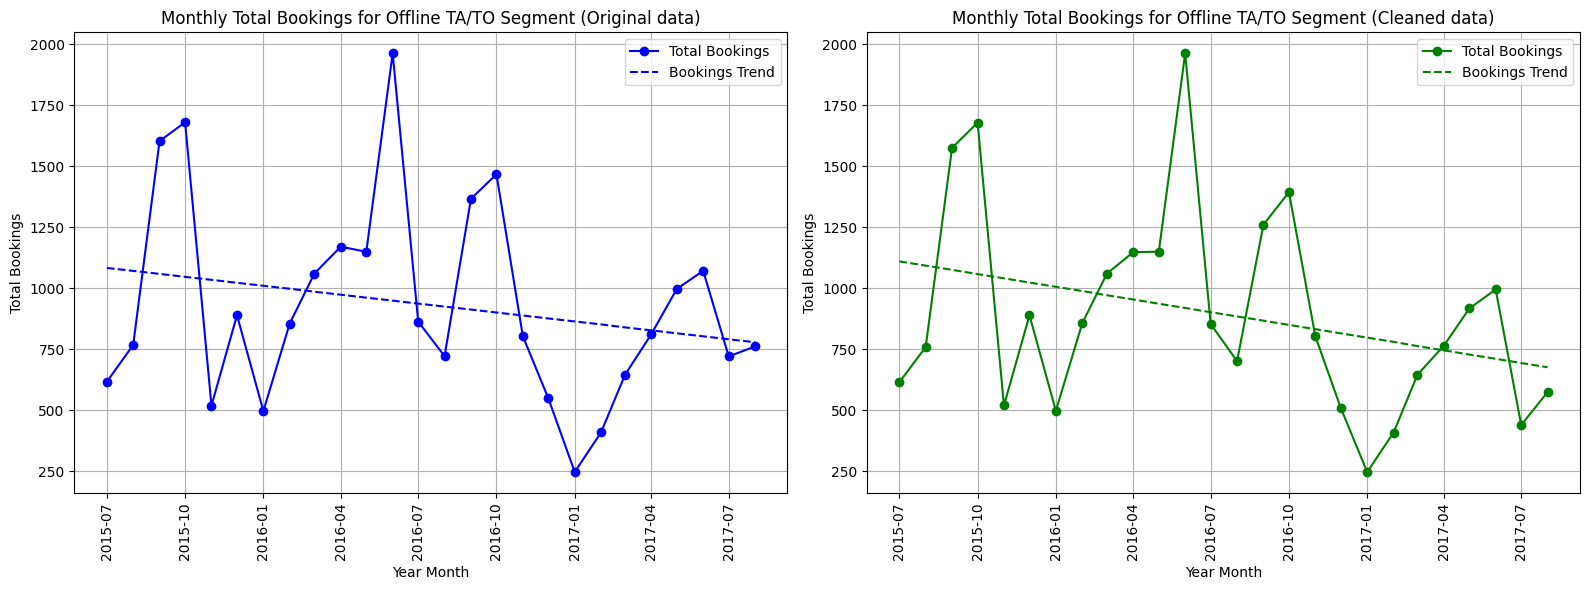

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Offline TA/TO')

**Monthly Total Bookings for Offline TA/TO Segment Analysis:**
> Booking volumes are highly fluctuating , with large peaks in October 2015 and April 2016, reaching over 1200 units. The trendline again shows a slight decrease, suggesting that despite temporary surges, offline bookings are declining overall, stabilizing around 400-600 units per month by the end of the observed period.

> The large fluctuations in booking volumes and cancellations indicate that the Offline TA/TO segment is highly unstable. The peaks in October 2015 and April 2016 may be tied to specific seasonal travel events or promotions, but the general trend shows a decline in the use of offline booking channels.

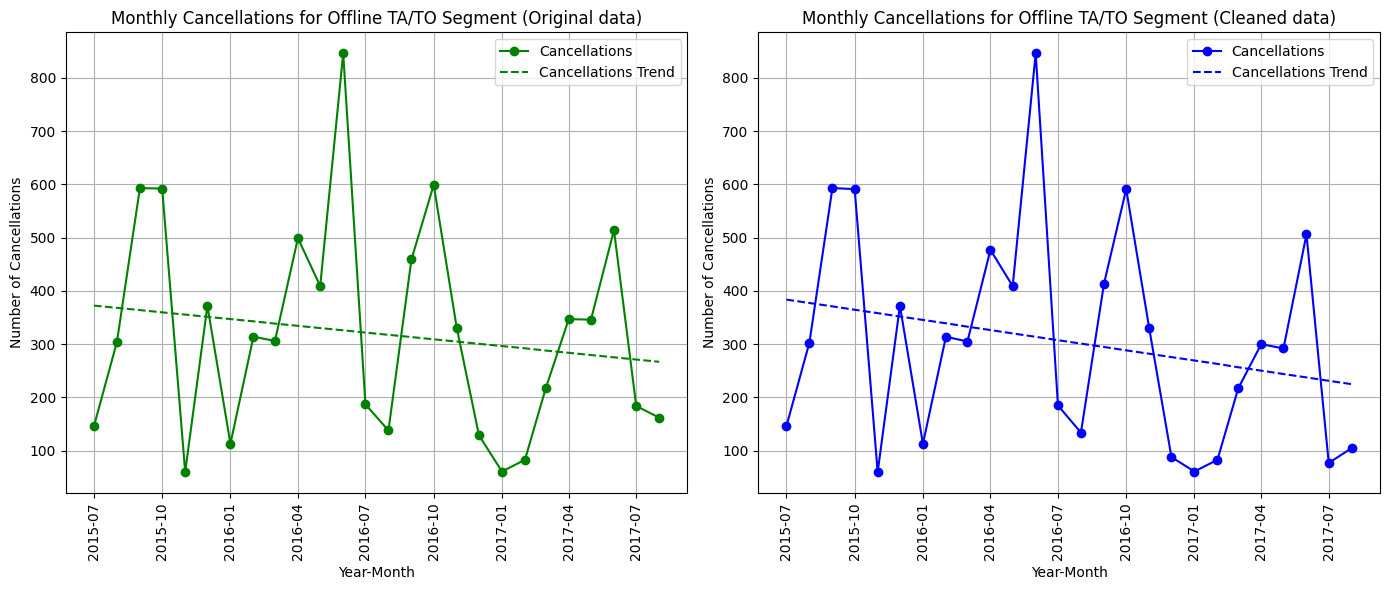

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Offline TA/TO')

**Monthly Cancellations for Offline TA/TO Segment Analysis:**
> Cancellations exhibit sharp peaks, particularly in April 2016, where cancellations spike to over 700 units. The cancellation trendline is relatively flat, indicating that while there are large spikes, the overall cancellation rate remains consistent at around 300-500 units throughout most of the time period.

> While booking volumes are declining, cancellations remain relatively consistent, suggesting that those who continue to use offline channels may be more likely to cancel. This could be linked to less stringent cancellation policies for traditional travel agents and tour operators, or the nature of offline bookings being more flexible.

**e) About "Complementary" segment**

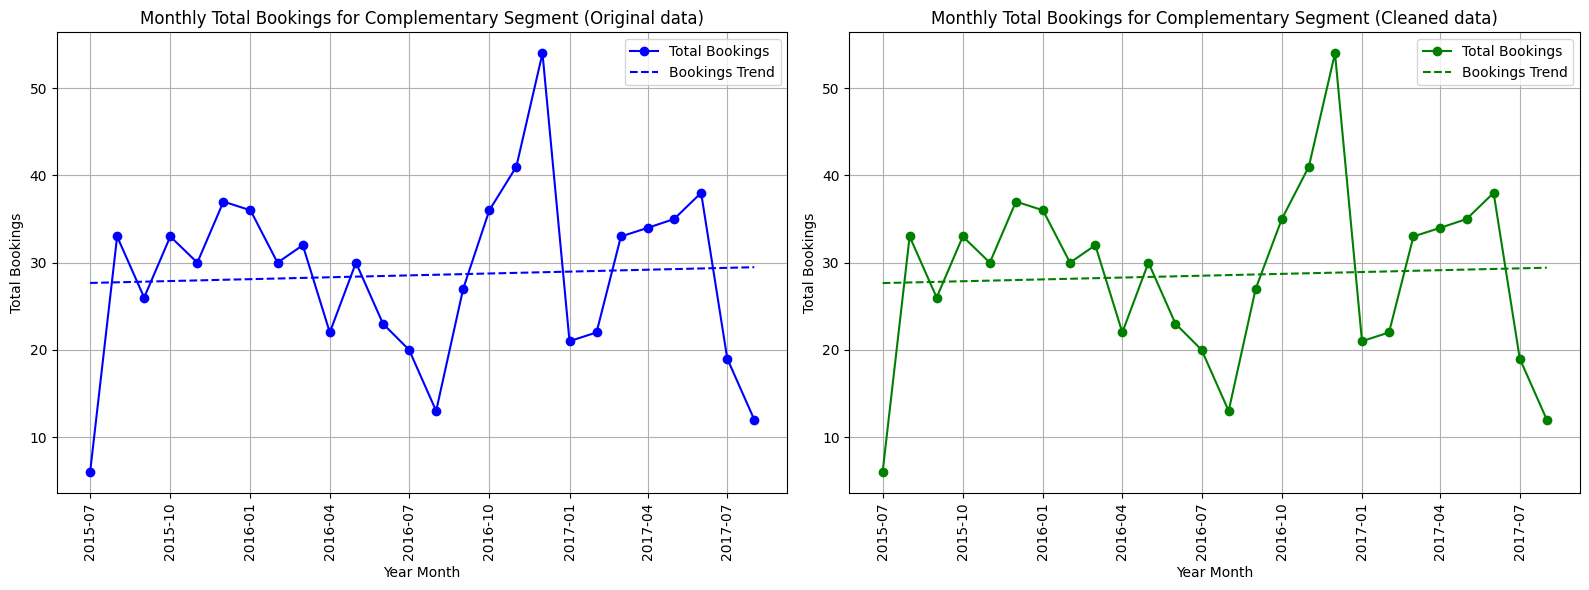

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Complementary')

**Monthly Total Bookings for Complementary Segment Analysis:**
> Booking volumes are quite low, fluctuating between 5 and 30 units. Notable peaks occur in October 2015 and October 2016, where bookings reach around 30 units. The trendline remains stable, confirming that the complementary segment maintains consistent, though low, booking volumes without any clear upward or downward trend over time.  This indicates that while there is some interest in this segment, it remains a minor contributor to overall bookings.



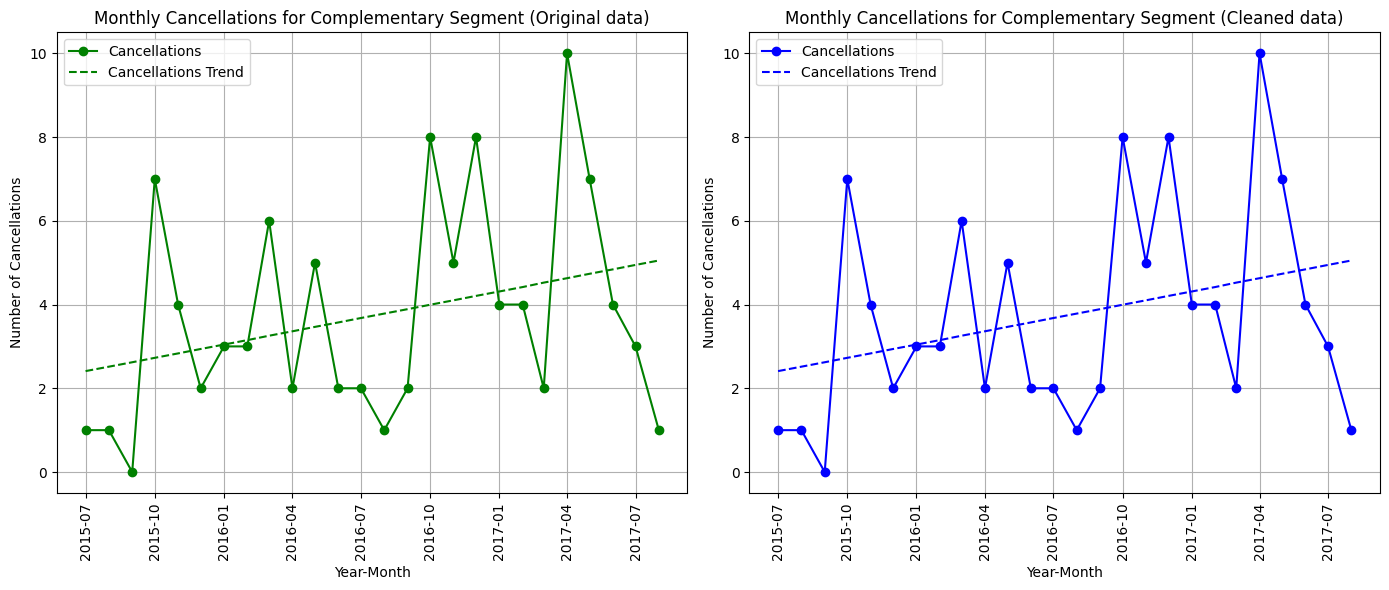

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Complementary')

**Monthly Cancellations for Complementary Segment Analysis:**
> Cancellations are minimal but present, with occasional spikes, especially in March 2017, where cancellations reach 8 units. The trendline remains upward, suggesting that while complementary bookings are small in volume, the cancellation rate is slowly increasing over time.

**f) About "Groups" segment**

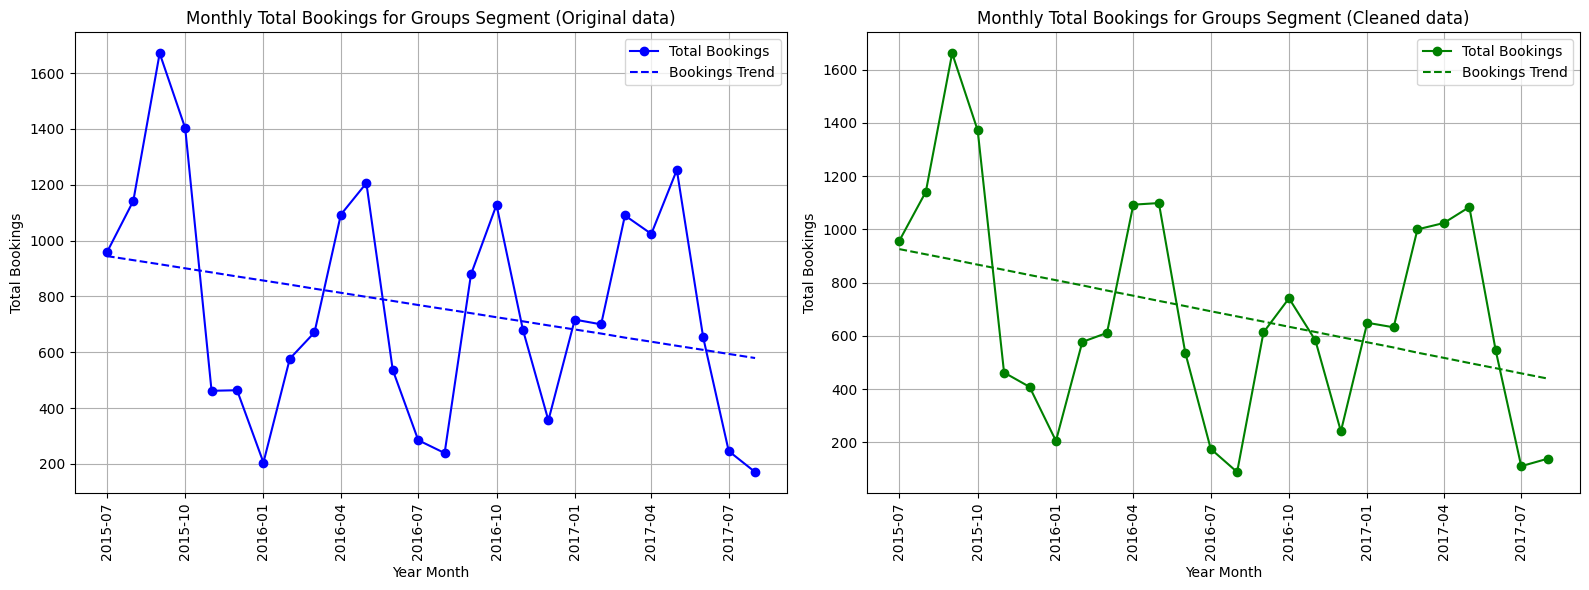

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Groups')

**Monthly Total Bookings for Groups Segment Analysis:**
> Group booking volumes show significant fluctuations, with group booking volumes fluctuating between 400 and 1600 units. Peaks are still observed in October 2015 and March 2016, but the fluctuations are less extreme. The overall trendline for bookings is downward, suggesting a general decrease in group bookings over time. Overall, the interest in group bookings appears to be declining.



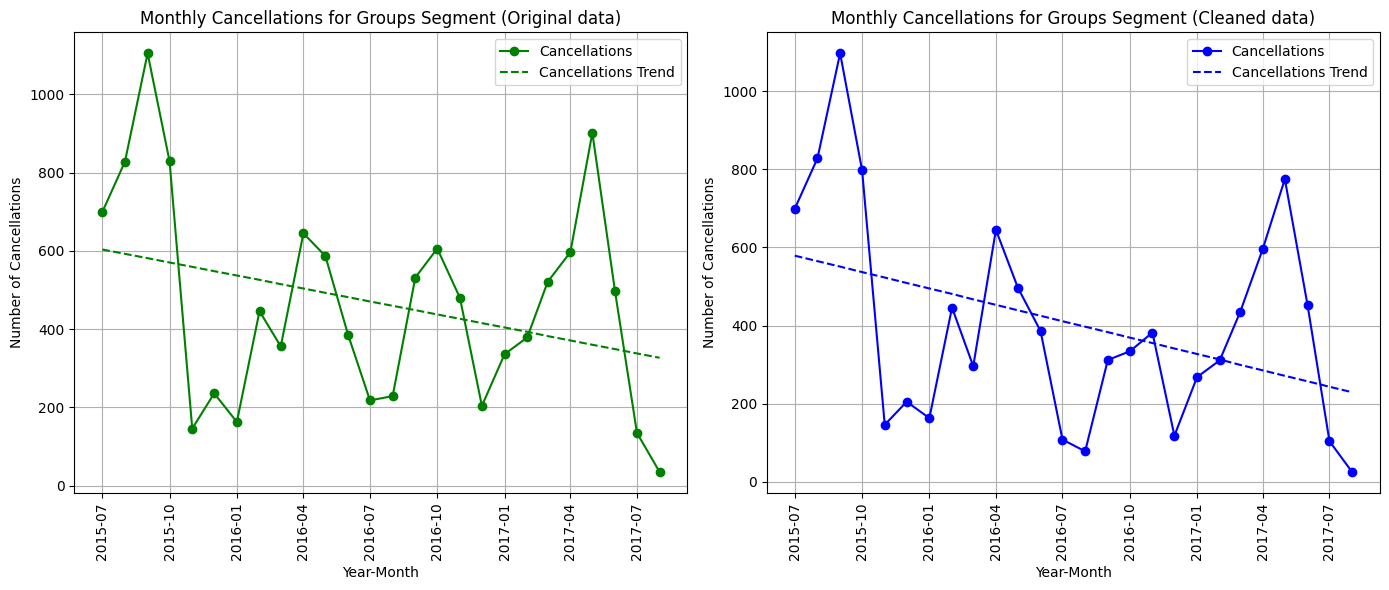

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Groups')

**Monthyly Cancellations for Groups Segment Analysis:**
> Cancellations range between 200 and 1000 units, with spikes in October 2015 and March 2017, where cancellations reach up to 1000 units. The overall trendline for cancellations is still downward, suggesting a decrease in cancellations over time, though cancellations remain high during certain periods.

**g) About "Aviation" segment**

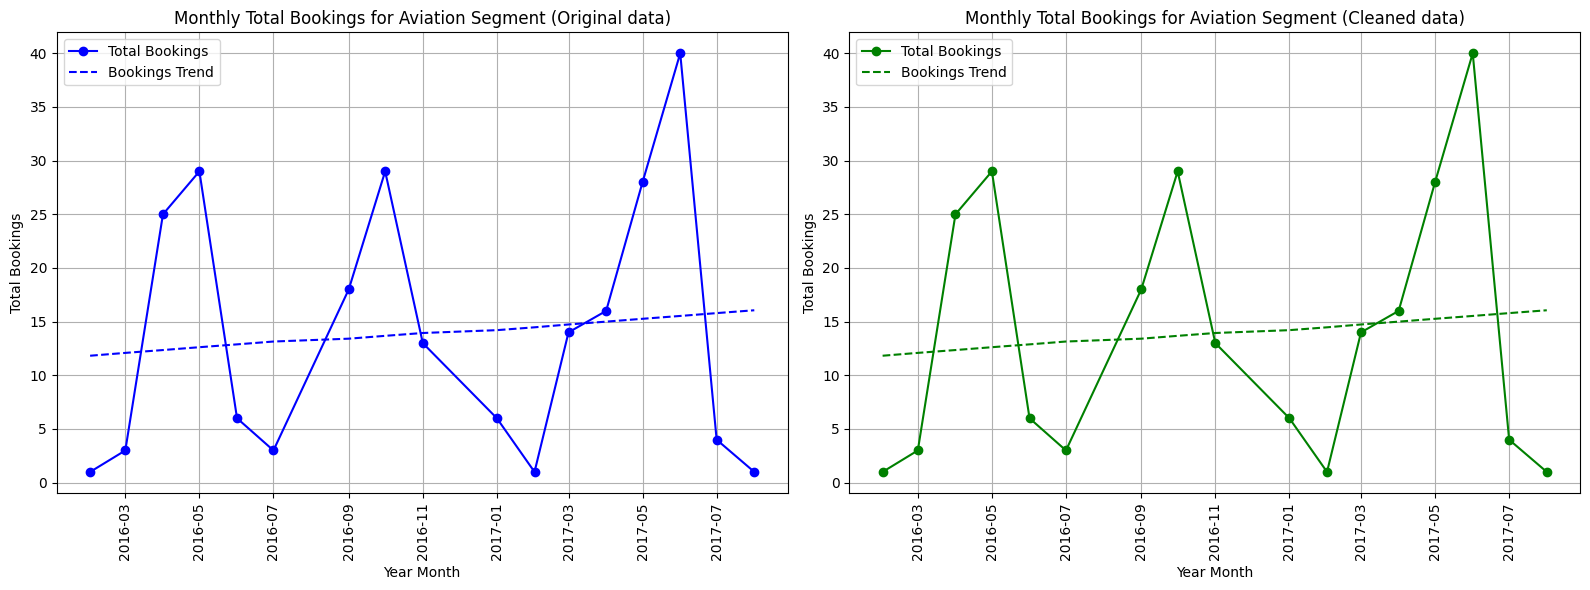

In [ ]:
plot_monthly_trends_comparison(df, df_cp, 'Aviation')

**Monthly Total Bookings for Aviation Segment Analysis:**
> Booking volumes for the Aviation segment show notable fluctuations, where bookings reach around 35 units. However, there are also significant drops, with some months having as few as 5 to 10 bookings. The trendline for bookings is relatively flat, indicating that there is no clear long-term increase or decrease in aviation bookings over time.

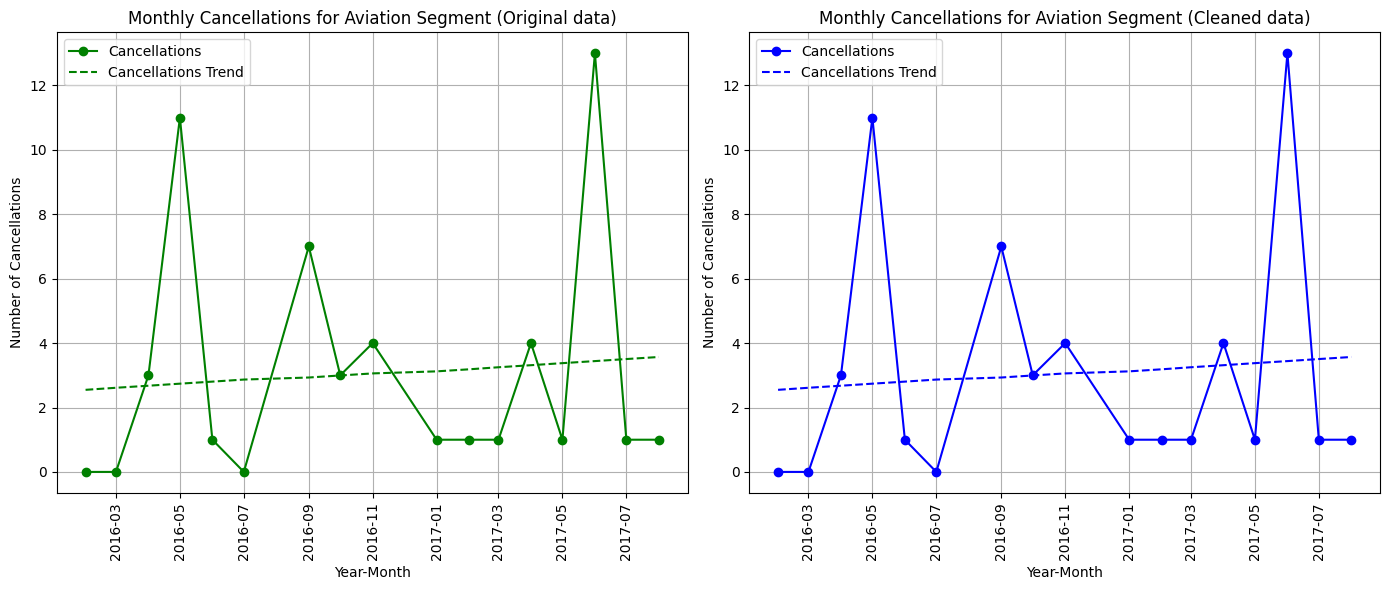

In [ ]:
plot_monthly_cancellations_comparison(df, df_cp, 'Aviation')

**Monthly Cancellations for Aviation Segment Analysis:**
> Cancellations remain low overall, fluctuating between 2 and 12 units. The trendline is also slightly upward, confirming that cancellations are increasing modestly over time

**h) For all Market Segments**

After analyzing specific segments, it becomes necessary to zoom out and see how cancellations behave across all market segments. This broader perspective helps us understand which months have the highest cancellation rates and how they relate to overall booking activity. The goal here is to identify seasonal patterns in cancellations, which can be used to inform decisions about cancellation policies.

In [ ]:
# Function to create monthly trends for total bookings across all market segments
def plot_monthly_trends_all_segments(df, df_cp):
    # Create a 'year_month' column to group by year and month for both datasets
    df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B')
    df_cp['year_month'] = pd.to_datetime(df_cp['arrival_date_year'].astype(str) + '-' + df_cp['arrival_date_month'], format='%Y-%B')

    # Group by 'year_month' to calculate total booking volumes and cancellations across all segments for original data
    monthly_data_original = df.groupby('year_month').agg(
        total_bookings=('is_canceled', 'size'),
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Group by 'year_month' to calculate total booking volumes and cancellations across all segments for cleaned data
    monthly_data_cleaned = df_cp.groupby('year_month').agg(
        total_bookings=('is_canceled', 'size'),
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Sort the data by year_month
    monthly_data_original = monthly_data_original.sort_values('year_month')
    monthly_data_cleaned = monthly_data_cleaned.sort_values('year_month')

    # Create a figure with two subplots (side by side)
    plt.figure(figsize=(14, 6))

    # Plot 1: Total Bookings over the months for Original Data
    plt.subplot(1, 2, 1)
    plt.plot(monthly_data_original['year_month'], monthly_data_original['total_bookings'], label='Total Bookings', color='blue', marker='o')
    plt.title('Monthly Total Bookings Across All Market Segments (Original data)')
    plt.xlabel('Year - Month')
    plt.ylabel('Total Bookings')
    plt.xticks(rotation=90)

    # Add a trendline for bookings (Original Data)
    z1 = np.polyfit(range(len(monthly_data_original['year_month'])), monthly_data_original['total_bookings'], 1)
    p1 = np.poly1d(z1)
    plt.plot(monthly_data_original['year_month'], p1(range(len(monthly_data_original['year_month']))), "b--", label="Bookings Trend")
    plt.legend()
    plt.grid(True)

    # Plot 2: Total Bookings over the months for Cleaned Data
    plt.subplot(1, 2, 2)
    plt.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['total_bookings'], label='Total Bookings', color='green', marker='o')
    plt.title('Monthly Total Bookings Across All Market Segments(Cleaned data)')
    plt.xlabel('Year - Month')
    plt.ylabel('Total Bookings')
    plt.xticks(rotation=90)

    # Add a trendline for bookings (Cleaned Data)
    z2 = np.polyfit(range(len(monthly_data_cleaned['year_month'])), monthly_data_cleaned['total_bookings'], 1)
    p2 = np.poly1d(z2)
    plt.plot(monthly_data_cleaned['year_month'], p2(range(len(monthly_data_cleaned['year_month']))), "g--", label="Bookings Trend")
    plt.legend()
    plt.grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

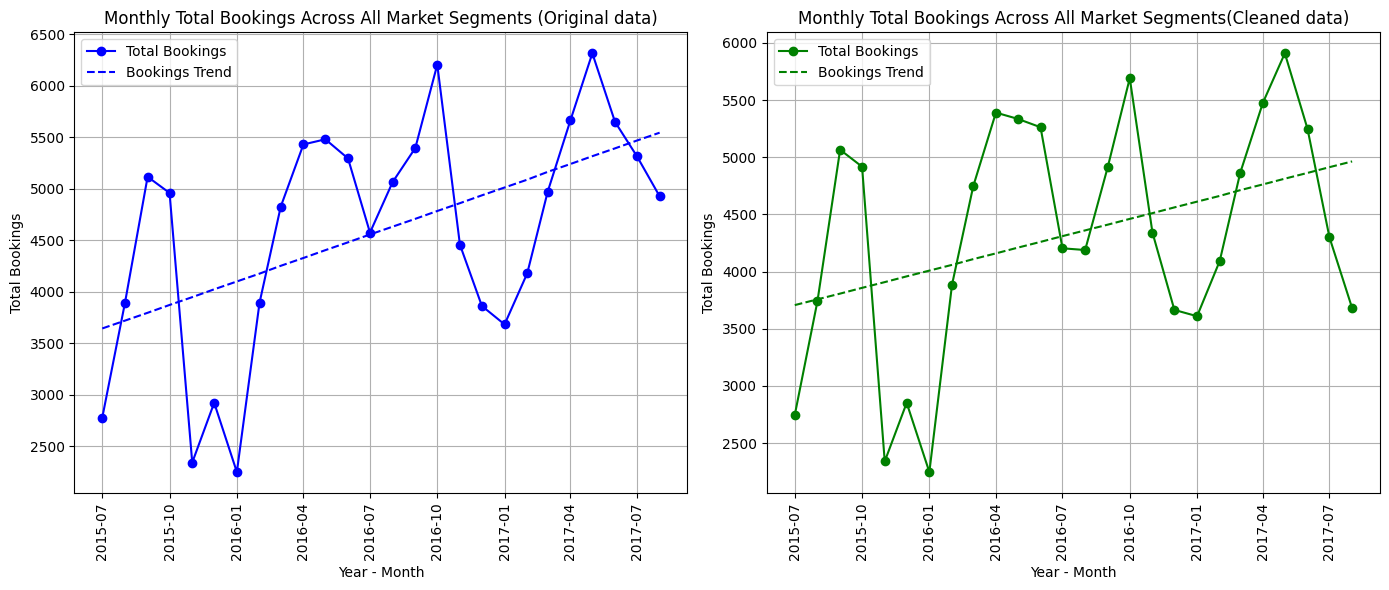

In [ ]:
plot_monthly_trends_all_segments(df, df_cp)

**Monthly Total Bookings Across All Market Segments Analysis:**
> Booking volumes across all segments fluctuate significantly, with notable peaks in July 2016 and March 2017, where bookings reach over 6000 units. However, there are also sharp declines, with bookings dropping below 3000 units in October 2015 and July 2015. Despite the fluctuations, the overall trendline shows an upward trajectory, indicating that total bookings are increasing over time.

> This suggests that there is an increasing demand for hotel bookings, likely driven by seasonal factors, promotions, or overall market growth. Therefore, hotels should focus on maximizing bookings during these high-demand periods.  

In [ ]:
# Function to create monthly trends for cancellations across all market segments
def plot_monthly_cancellations_all_segments(df, df_cp):
    # Create a 'year_month' column to group by year and month for both datasets
    df['year_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'], format='%Y-%B')
    df_cp['year_month'] = pd.to_datetime(df_cp['arrival_date_year'].astype(str) + '-' + df_cp['arrival_date_month'], format='%Y-%B')

    # Group by 'year_month' to calculate cancellations across all segments for original data
    monthly_data_original = df.groupby('year_month').agg(
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Group by 'year_month' to calculate cancellations across all segments for cleaned data
    monthly_data_cleaned = df_cp.groupby('year_month').agg(
        cancellations=('is_canceled', 'sum')
    ).reset_index()

    # Sort the data by year_month
    monthly_data_original = monthly_data_original.sort_values('year_month')
    monthly_data_cleaned = monthly_data_cleaned.sort_values('year_month')

    # Create a figure with two subplots (side by side)
    plt.figure(figsize=(14, 6))

    # Plot 1: Cancellations over the months for Original Data
    plt.subplot(1, 2, 1)
    plt.plot(monthly_data_original['year_month'], monthly_data_original['cancellations'], label='Cancellations', color='red', marker='o')
    plt.title('Monthly Cancellations Across All Market Segments (Original data)')
    plt.xlabel('Year - Month')
    plt.ylabel('Number of Cancellations')
    plt.xticks(rotation=90)

    # Add a trendline for cancellations (Original Data)
    z1 = np.polyfit(range(len(monthly_data_original['year_month'])), monthly_data_original['cancellations'], 1)
    p1 = np.poly1d(z1)
    plt.plot(monthly_data_original['year_month'], p1(range(len(monthly_data_original['year_month']))), "r--", label="Cancellations Trend")
    plt.legend()
    plt.grid(True)

    # Plot 2: Cancellations over the months for Cleaned Data
    plt.subplot(1, 2, 2)
    plt.plot(monthly_data_cleaned['year_month'], monthly_data_cleaned['cancellations'], label='Cancellations', color='orange', marker='o')
    plt.title('Monthly Cancellations Across All Market Segments (Cleaned data)')
    plt.xlabel('Year - Month')
    plt.ylabel('Number of Cancellations')
    plt.xticks(rotation=90)

    # Add a trendline for cancellations (Cleaned Data)
    z2 = np.polyfit(range(len(monthly_data_cleaned['year_month'])), monthly_data_cleaned['cancellations'], 1)
    p2 = np.poly1d(z2)
    plt.plot(monthly_data_cleaned['year_month'], p2(range(len(monthly_data_cleaned['year_month']))), "orange", linestyle="--", label="Cancellations Trend")
    plt.legend()
    plt.grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


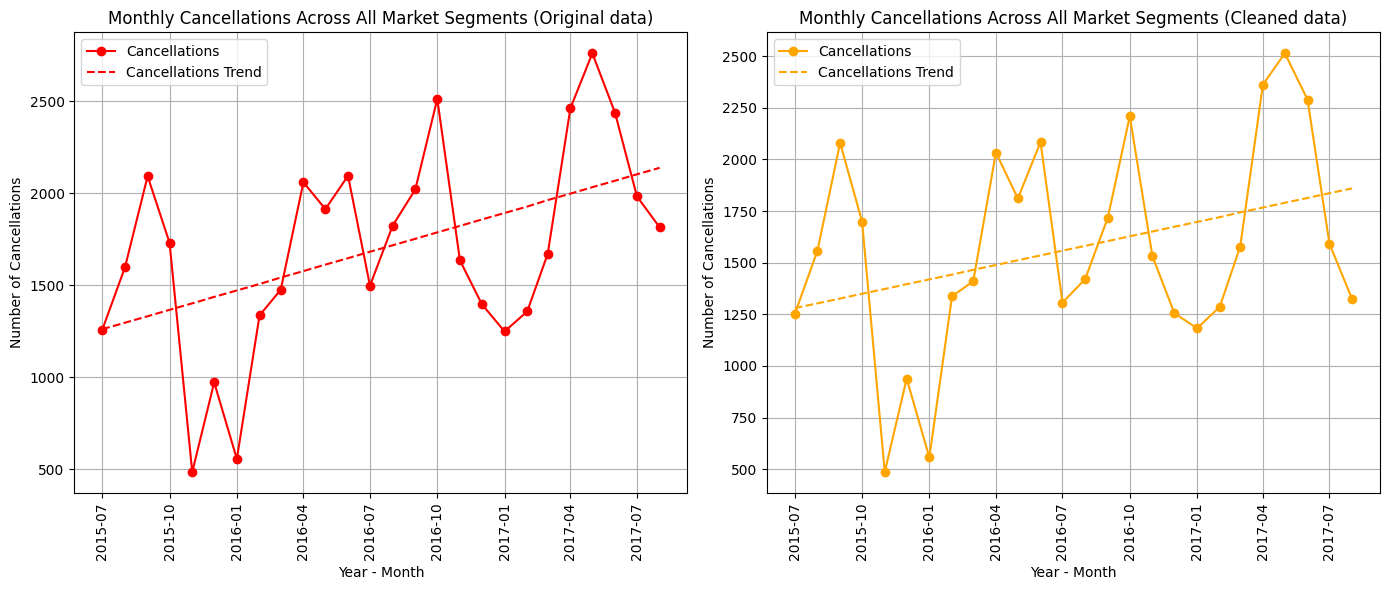

In [ ]:
plot_monthly_cancellations_all_segments(df, df_cp)

**Monthly Cancellations Across All Market Segments Analysis:**
> Cancellations show significant volatility, with peaks in October 2015, July 2016, and April 2017, where cancellations reach around 2500 units. However, the fluctuations with fewer extreme drops, and cancellations remaining between 1000 and 2500 units throughout the period.

> Despite these fluctuations, the trendline indicates a gradual increase in cancellations over time, suggesting that cancellations are becoming more frequent across all market segments. Given the increasing trend in cancellations, hotels should consider introducing stricter cancellation policies, particularly during peak periods, to reduce last-minute cancellations.

# **PART 4: ADVANCED HOTEL BUSINESS ANALYSIS**
### 1. Business Insight

1.1 Seasonal Booking Trend

According to the charts provided, a distinct seasonal booking trend is evident for both City and Resort Hotels.

City Hotels display marked seasonality, with peak booking volumes occurring in summer (July-August), spring (March-April), and fall (September-October), indicating potential for premium pricing during these times. In contrast, the winter months (December-February) experience notable declines in bookings.

Lisbon's city hotels see a surge in bookings during peak summer months (July-August), as well as in spring (March-April) and fall (September-October), driven by a perfect blend of favorable weather and vibrant events.Summer attracts with warm weather and festivals like Festas de Lisboa. Spring and fall offer mild temperatures for city exploration, lower prices, and smaller crowds. In contrast, winter (December-February) sees fewer tourists due to increased rainfall and cooler temperatures.

In term of Resort Hotels, reveal more stable booking trends throughout the year, with modest increases in summer and spring, permitting a more consistent pricing strategy.

To explain for this case, we need to consider the location of this hotel when it located in Alvage - a beautiful beach city  Alvage sees a stable booking trend in tourism due to its appealing beach environment, pleasant climate, and safety reputation. The city offers diverse attractions, from family-friendly beaches to water parks and golf courses, catering to various interests. Its affordability compared to other European destinations and widespread use of English make it accessible to international travelers.
Additionally, Alvage resorts see fewer bookings than Lisbon city hotels. This is because Lisbon attracted more tourists than Alvage from 2015 to 2017. In 2016, Lisbon's Tourism Uptake Rate (TUR) was significantly higher than other Portuguese municipalities, absorbing 21.9% of visitors. In contrast, Algarve, the fifth-placed region, had only a 2.95% TUR.

Also,price when staying in  hotels are often cheaper and more budget-friendly than resorts. Typically located near city centers, hotels offer a wide range of prices, making it easier for tourists to find suitable options. They also provide convenient access  to entertaiment destination in the center of the city.

Conversely, resorts are constructed on expansive grounds with limited choices and are frequently located away from urban hubs, making them ideal for relaxation on-site, where guests remain within the resort grounds and partake in the myriad of services available. This phenomenon explain why, during the latter months of the year, there is a rise in resort reservations while hotel bookings decline, showcasing the varied travel preferences that exist across different seasons.


City hotels typically experience higher cancellation rates compared to resort hotels, with city hotels reaching around 60% while resorts usually remain below 40%. Both categories exhibit seasonal variations. Cancellations for city hotels peak in late 2015, mid-2016, and early 2017, likely due to increased demand during holidays, conferences, or special events  that are likely to trigger last-minute changes or cancellations. Cancellations tend to decline around early 2016 and mid-2017, potentially during less busy travel periods, . For resort hotels, cancellation rates peak in early to mid-2016 and mid-2017, coinciding with popular vacation seasons such as spring break and summer, customers tend to change their plan at last minitute . The lowest rates are seen in late fall and early winter, indicating a more subdued travel period when they have stable plan with attractive incentives from hotel.


### 2. Market Segment and Lead time
2.1.1 Group Booking

Groups are highly conscious of costs when making hotel reservations. This is logical since they're managing expenses for multiple people, making the total cost significantly higher than individual bookings. The larger the group, the more important cost becomes in their decision-making process.

For example, groups tend to book their accommodations far in advance, as indicated by their high (mean lead time).

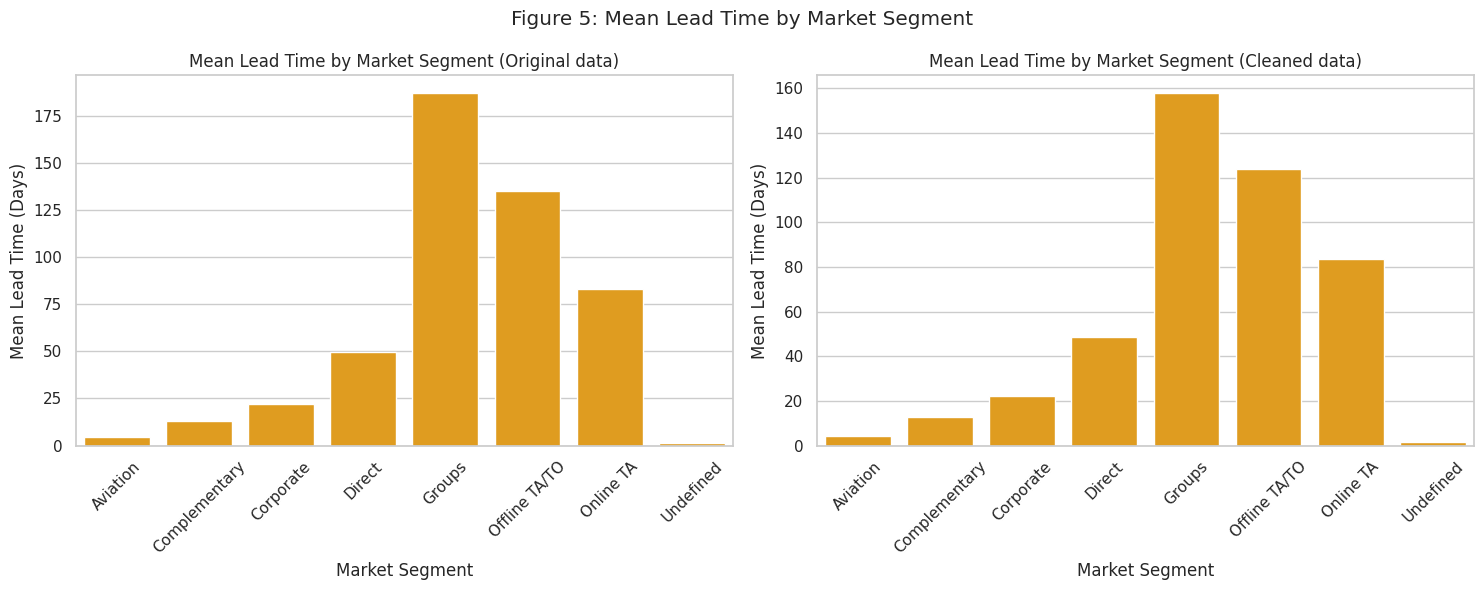


Despite booking early, groups typically secure moderate or low ADRs. This suggests they are only willing to commit to bookings when prices are favorable.


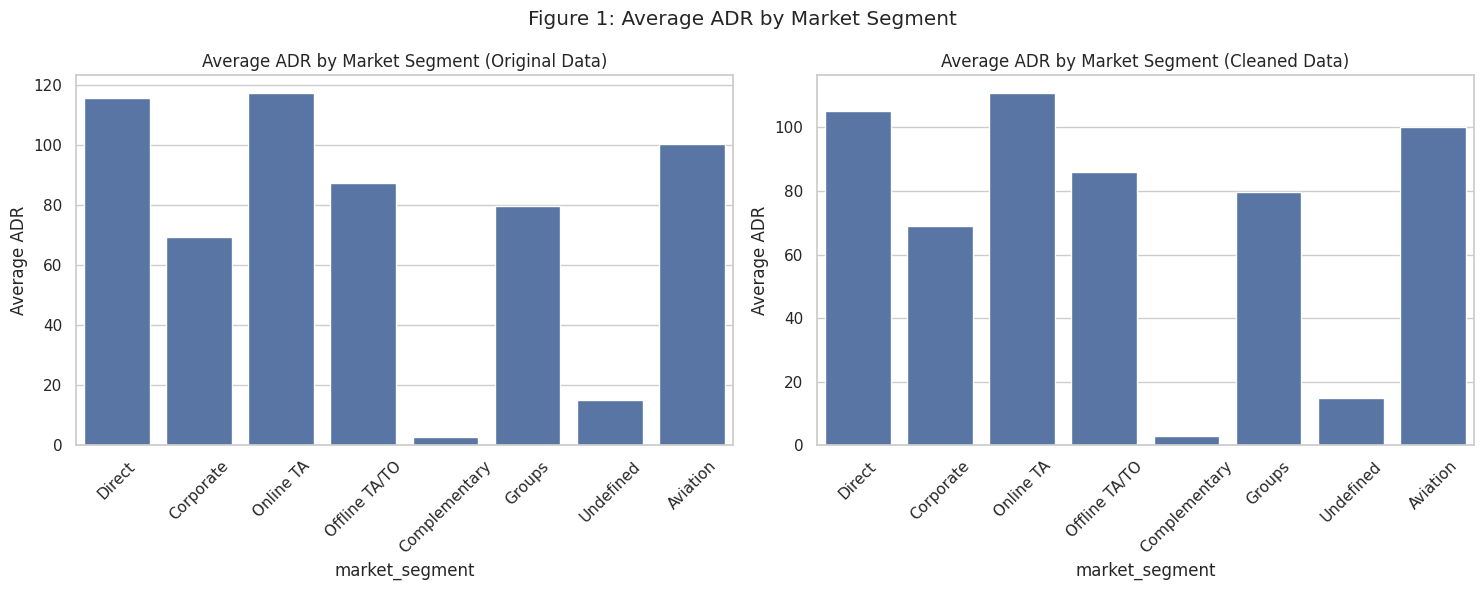

From that view, we can conclude that the combination of high lead time and low ADR indicates a tendency for groups to shop around for the best deal, increasing the likelihood of cancellation if they find a better offer elsewhere.

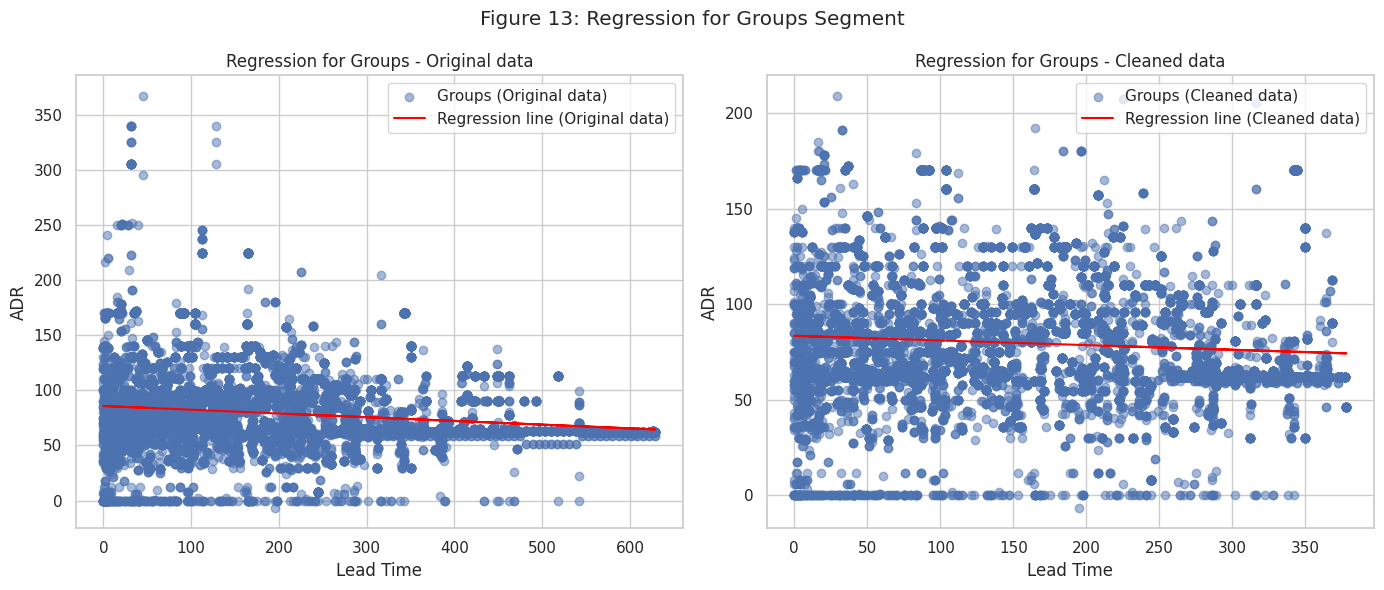

The chart above shows that group booking still has a discount rate, but these discounts alone do not effectively retain these price-sensitive customers. The hotel's lack of retention strategies leads to a situation where groups feel free to cancel their reservations.

2.2.2 Online TA

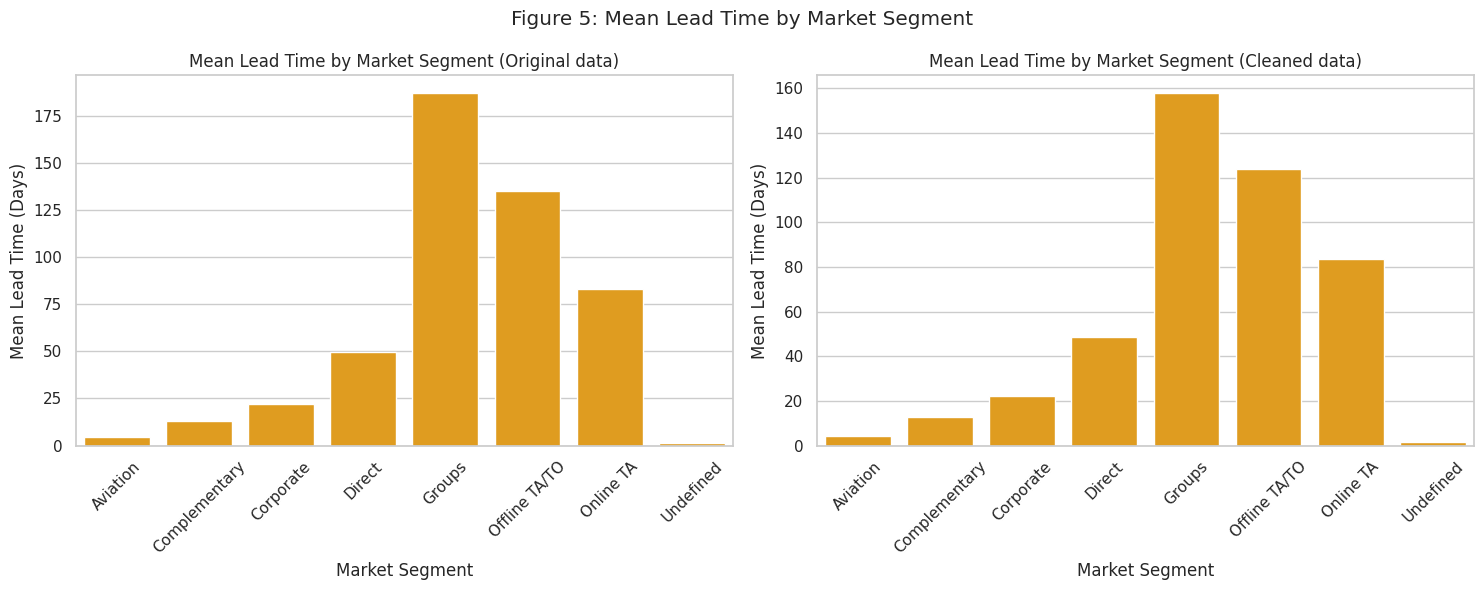

The Online Travel Agency (OTA) segment is highly driven by price comparison. Customers in this segment tend to actively browse and compare prices across multiple platforms, such as different OTAs or hotel websites, before making their booking decisions. The ease of comparing prices on these platforms encourages customers to seek out the best possible deal.

Similar to the Groups segment, OTA customers frequently book their accommodations well in advance. This is likely due to the perception that booking early makes sure for them an accommodation when they travel, especially those booking in peak seasons. The mean lead time for OTA bookings tends to be relatively high, reflecting their habit of securing reservations early.

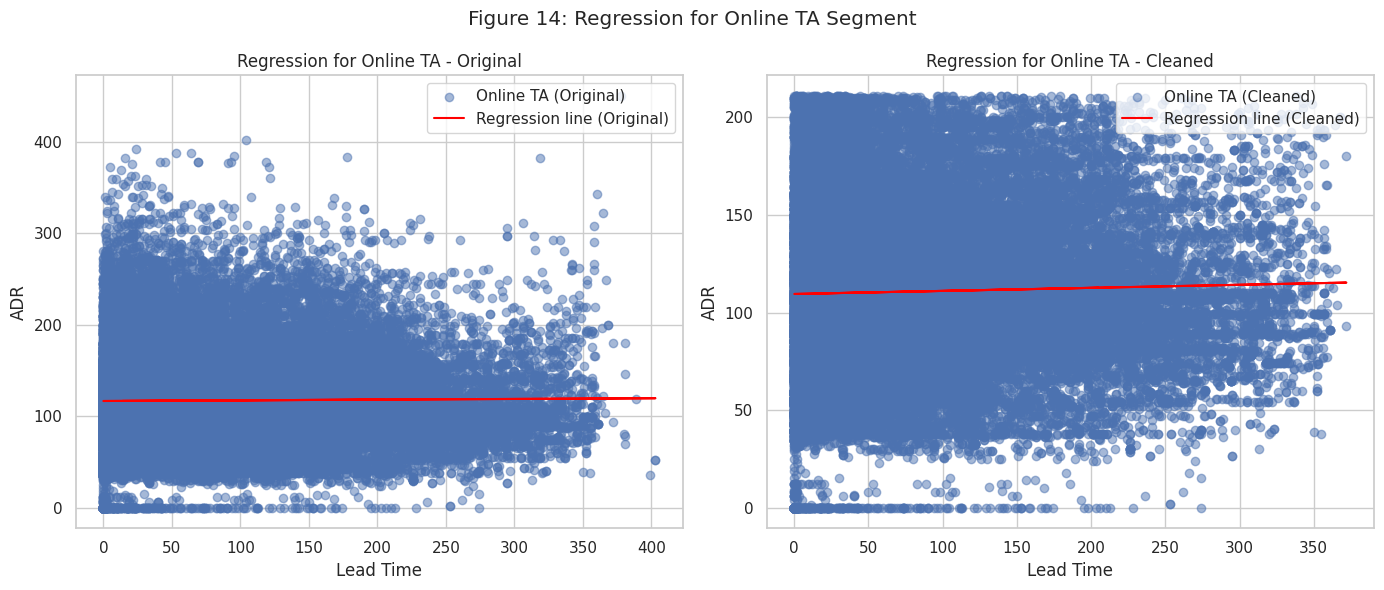

The data analysis reveals a concerning pattern in the hotel's pricing and retention strategy, particularly regarding advance bookings and Online Travel Agency (OTA) channels. The regression shows a slight positive slope between Average Daily Rate (ADR) and lead time, indicating that customers booking far in advance actually face higher rates, especially during peak seasons. This counterintuitive pricing approach, where early bookers don't receive meaningful discounts or incentives despite their advance commitment, creates a problematic dynamic.

OTA platforms compound this issue by offering flexible cancellation policies with minimal penalties, while simultaneously providing extensive price comparison capabilities. This combination leads to a continuous "shopping around" behavior - customers who initially book in advance keep monitoring prices across different platforms and properties, ready to cancel their original reservation if they find a better deal. The lack of early booking incentives, combined with OTA's easy cancellation policies, creates a perfect storm that increases cancellation rates.


2.2.3. Offline TA

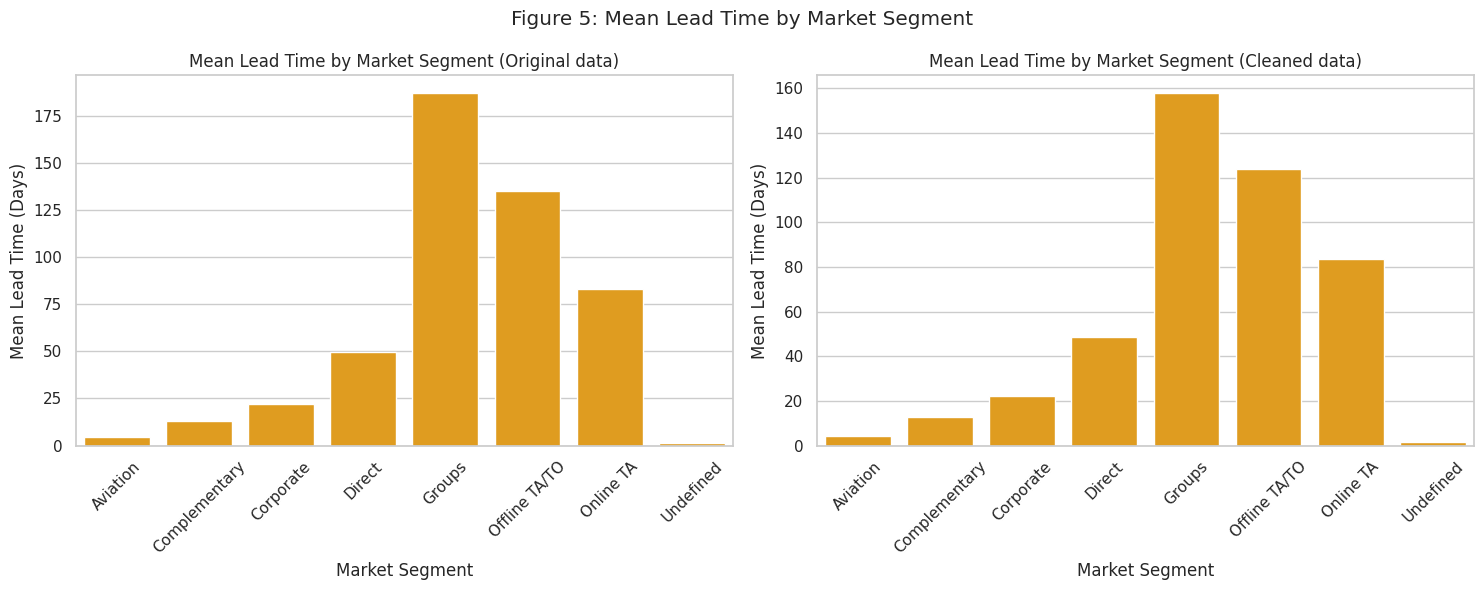

The Offline Travel Agency (TA/TO) segment demonstrates a distinct booking behavior fundamentally different from online channels, primarily built on trust and professional relationships. In this model, customers place significant confidence in their travel agents' expertise and recommendations, rather than engaging in independent price comparison across multiple platforms. This trust-based relationship creates a more stable booking environment where decisions are influenced more by the agent's professional advice and less by price alone.

This trust-based dynamic typically results in customers making advance bookings through their travel agents, particularly for complex itineraries or group travel arrangements. The early booking pattern is driven by several factors: travel agents' understanding of seasonal availability and their ability to secure better rates through established relationships with hotels.


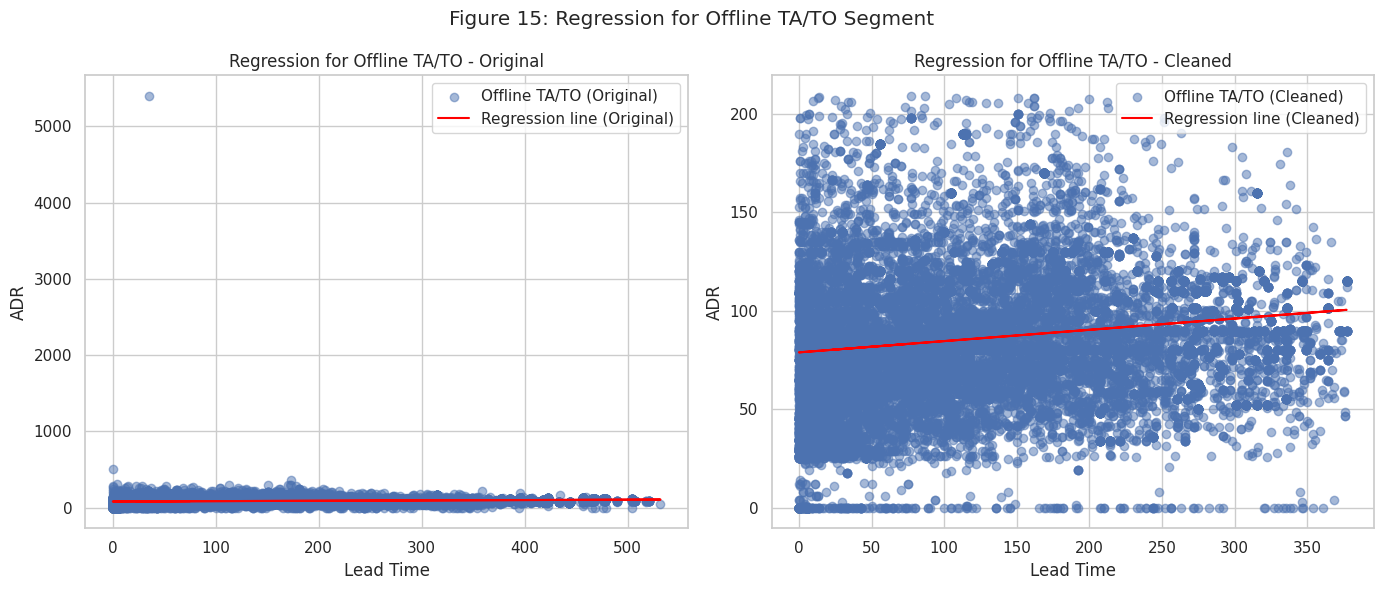

The R-squared value suggests that as lead time expands (i.e., customers reserve their trips with more advance notice), the Average Daily Rate (ADR) tends to rise as well. This implies that offline travel agencies do not provide such incentive programs despite early bookings by customers. This situation could facilitate customers' decisions to explore alternative options if they discover a more appealing deal elsewhere.

### 2. Advanced Recommendations
2.1. Marketing Strategy

Hotels and resorts implement intensive marketing strategies during high-traffic periods like summer and spring. These peak seasons present prime opportunities to enhance the hotel's reputation, expand customer reach, and establish a solid foundation for pricing strategies. The focus is on creating compelling campaigns that showcase both the property's unique features and the destination's appeal.

"A Day Being Local"  is a marketing campaign that goes beyond traditional hotel services by offering a comprehensive local experience. Instead of just providing accommodation, hotels create detailed city guides and customized itineraries that help guests explore local attractions, dining spots, and cultural activities. This service particularly appeals to families with children, group travelers, and busy professionals who lack time for trip planning and minimize the opportunity that customers change their plan on themselves. For solo travelers, the program offers an optional local guide service, creating a unique blend of comfort and authentic local experiences.

The hotel will promote this campaign through social media platforms such as Facebook and Instagram, which have a large number of users.

We also use personalized customer communication strategy The hotel emphasizes building personal connections with guests through customized communication. This includes personalized welcome emails that address guests by name and provide tailored information about their upcoming stay. This approach helps create a more intimate, welcoming atmosphere even before guests arrive at the property.


2.2. Pricing Strategies

Following the marketing strategies, it’s essential to implement effective pricing strategies to further reduce the cancellation rate, especially for Online and Offline Travel Agents (TAs). One of the key issues with these segments is pricing comparison and customers often book early but still face high costs and do not have a sales promotion programme for them.

The current strategy for online TAs lacks discounts, leading to higher cancellation rates. To address this, we propose the following pricing strategies:

*   2-day, 1-night booking: Includes free breakfast buffet, other hotel services, and complimentary airport shuttle service.

*   Flight + Hotel Combo: Partner with airlines to offer a package deal through these two market segments, giving customers a combined flight and hotel price that’s 5% cheaper than booking separately.

*   3-day, 2-night booking: Includes free breakfast buffet, one dinner buffet, complimentary airport shuttle, and hotel services.
*   3+ night booking: Get a 3% discount starting from the 4th night, free breakfast buffet and two dinner buffets, full access to all hotel services, and complimentary airport shuttle.

*   Early bird promotion: Book at least one month in advance (excluding holidays) and receive an additional 5% discount on the total cost.









2.3. Commitment Strategies

For Group Bookings, although discounts are offered, they aren’t compelling enough to retain group customers.

To address this, hotels will focus on developing additional services including tour guide services, assisting in booking tickets of some popular entertainment destinations, family car rental, photography services, adventure and sportsor  that can make their offerings more attractive. Without these enhancements, group bookings are more likely to be canceled if better options are found elsewhere.

We decided to collaborate with third-party providers to create a hotel + attraction package for guests staying two nights or more, offering up to a 10% savings compared to booking separately. This could include entrance to local attractions or theme parks, creating more value for the customer.


# **PART 5: CONCLUSION**

The analysis of hotel booking demand in Portugal, encompassing both City Hotels and Resort Hotels, has revealed critical insights into customer behavior, booking patterns, and cancellation trends. By leveraging a comprehensive dataset spanning from July 2015 to August 2017, we were able to uncover unique patterns that significantly impact revenue management strategies within the hospitality sector.
Key findings indicate that Direct Bookings, while exhibiting high Average Daily Rates (ADR), also face substantial cancellation risks, particularly during peak travel seasons like July and August. This volatility underscores the importance of dynamic pricing strategies that can adapt to fluctuating demand and mitigate potential revenue losses. On the other hand, the Corporate segment has proven to be a more stable source of revenue, characterized by consistent bookings and lower cancellation rates, highlighting its value for hotel operators.

Our exploration of lead time revealed a nuanced relationship between booking behavior and cancellation rates. Notably, the Groups segment shows that longer lead times are associated with increased cancellations, suggesting that hotels should consider implementing stricter cancellation policies for group bookings to safeguard against revenue loss. Conversely, segments like Online Travel Agencies (OTAs) exhibit both high ADR and cancellation rates, indicating the need for tailored marketing strategies that target the unique preferences and behaviors of this customer base.
The time series analysis further illustrated the seasonal dynamics of hotel bookings, with notable peaks during summer months aligned with vacation periods. This finding emphasizes the necessity for hotels to optimize their promotional strategies and dynamic pricing during these peak times to capitalize on demand.

In conclusion, this analysis not only highlights the complexities of hotel booking demand but also underscores the importance of data-driven decision-making in the hospitality industry. By understanding the distinct characteristics of each customer segment and their booking behavior, hotels can develop effective strategies that enhance revenue management, reduce cancellation rates, and ultimately improve customer satisfaction. Moving forward, continuous analysis of booking trends will be essential for adapting to changing market conditions and ensuring sustained profitability in an increasingly competitive landscape.